In [153]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from seaborn import histplot

In [154]:
employee_df = pd.read_csv('Employee_Data.csv')

In [155]:
employee_df.describe()

Salary          Age   Dependents            HA          COLA  \
count    4600.000000  4600.000000  4600.000000   4600.000000   4600.000000   
mean    94292.524720    40.386739     1.960000   7999.620354  22253.953523   
std     33983.208928    11.360860     1.298521   2330.275836   8020.368044   
min     15042.700000    21.000000     0.000000   3127.273000   3550.223601   
25%     70548.410000    30.000000     1.000000   6260.064750  16650.111363   
50%     96732.995000    40.000000     2.000000   7736.742000  22829.928260   
75%    122100.132500    50.250000     3.000000   9548.199500  28816.819592   
max    149991.340000    60.000000     4.000000  14787.699000  35399.416010   

                CPF   Gross Salary  In Company Years  Year of Experience  
count   4600.000000    4600.000000       4600.000000         4600.000000  
mean   13985.577389  110560.521207          9.936522           19.386739  
std     5040.429237   37523.647811          8.818178           11.360860  
min     2231.150832   22624.827875          0.000000            0.000000  
25%    10463.822564   85172.758463          3.000000            9.000000  
50%    14347.550791  111097.478064          7.000000           19.000000  
75%    18110.034251  141967.946456         15.000000           29.250000  
max    22246.890721  173050.731289         39.000000           39.000000

In [156]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                4600 non-null   object 
 1   Salary              4600 non-null   float64
 2   DOJ                 4600 non-null   object 
 3   Age                 4600 non-null   int64  
 4   Gender              4600 non-null   object 
 5   Dependents          4600 non-null   int64  
 6   HA                  4600 non-null   float64
 7   COLA                4600 non-null   float64
 8   CPF                 4600 non-null   float64
 9   Gross Salary        4600 non-null   float64
 10  Insurance           3464 non-null   object 
 11  Marital Status      4600 non-null   object 
 12  In Company Years    4600 non-null   int64  
 13  Year of Experience  4600 non-null   int64  
 14  Department          4600 non-null   object 
 15  Position            4600 non-null   object 
dtypes: flo

In [157]:
employee_df.head()

Name     Salary         DOJ  Age  Gender  Dependents        HA  \
0  ZuLzMAsP   88438.99  10/25/2019   36  Female           2  7142.101   
1  xQYGOrHv  137819.29   11/8/2020   57  Female           4  4660.071   
2  jehfxCGw   81316.12   1/20/2014   37    Male           3  5485.388   
3  yCezYiFJ  111420.62   2/13/2012   55  Female           1  7822.938   
4  WDQboEZv   16185.35    5/4/2020   24   Other           2  8137.465   

           COLA           CPF   Gross Salary Insurance Marital Status  \
0  20872.462360  13117.374283  103336.179077   Medical        Married   
1  32526.693747  20441.518050  154564.536697   Medical        Married   
2  19191.395718  12060.901886   93932.001832       NaN       Divorced   
3  26296.350706  16526.036485  129013.872221      Life       Divorced   
4   3819.900122   2400.630015   25742.085107   Medical        Married   

   In Company Years  Year of Experience Department                    Position  
0                 4                  15  Marketing  Regional Marketing Manager  
1                 3                  36  Marketing  National Marketing Manager  
2                10                  16  Marketing  Senior Marketing Executive  
3                12                  34      Sales      National Sales Manager  
4                 4                   3    Finance             Accounts Intern

In [158]:
employee_df.corr(numeric_only=True)

Salary       Age  Dependents        HA      COLA  \
Salary              1.000000  0.898907    0.365002  0.210832  1.000000   
Age                 0.898907  1.000000    0.327494  0.200167  0.898907   
Dependents          0.365002  0.327494    1.000000  0.083240  0.365002   
HA                  0.210832  0.200167    0.083240  1.000000  0.210832   
COLA                1.000000  0.898907    0.365002  0.210832  1.000000   
CPF                 1.000000  0.898907    0.365002  0.210832  1.000000   
Gross Salary        0.998156  0.897911    0.364719  0.269784  0.998156   
In Company Years    0.588960  0.661329    0.209496  0.147346  0.588960   
Year of Experience  0.898907  1.000000    0.327494  0.200167  0.898907   

                         CPF  Gross Salary  In Company Years  \
Salary              1.000000      0.998156          0.588960   
Age                 0.898907      0.897911          0.661329   
Dependents          0.365002      0.364719          0.209496   
HA                  0.210832      0.269784          0.147346   
COLA                1.000000      0.998156          0.588960   
CPF                 1.000000      0.998156          0.588960   
Gross Salary        0.998156      1.000000          0.589313   
In Company Years    0.588960      0.589313          1.000000   
Year of Experience  0.898907      0.897911          0.661329   

                    Year of Experience  
Salary                        0.898907  
Age                           1.000000  
Dependents                    0.327494  
HA                            0.200167  
COLA                          0.898907  
CPF                           0.898907  
Gross Salary                  0.897911  
In Company Years              0.661329  
Year of Experience            1.000000

<Figure size 5000x2000 with 0 Axes>

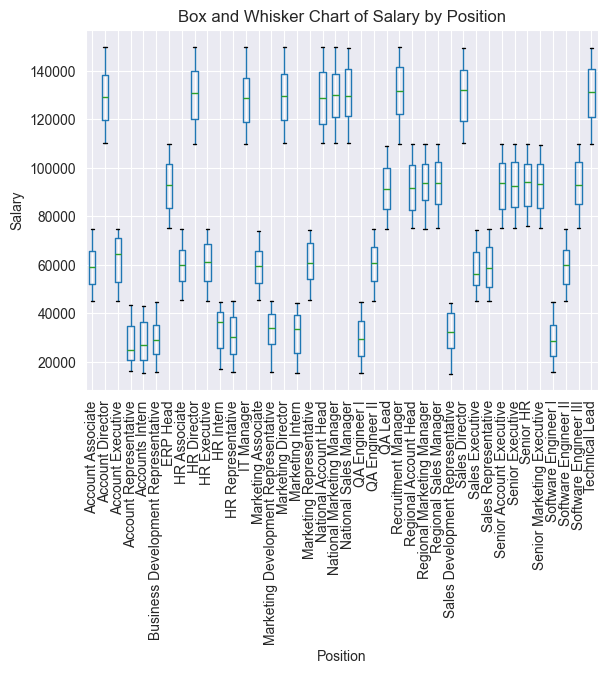

<Figure size 5000x2000 with 0 Axes>

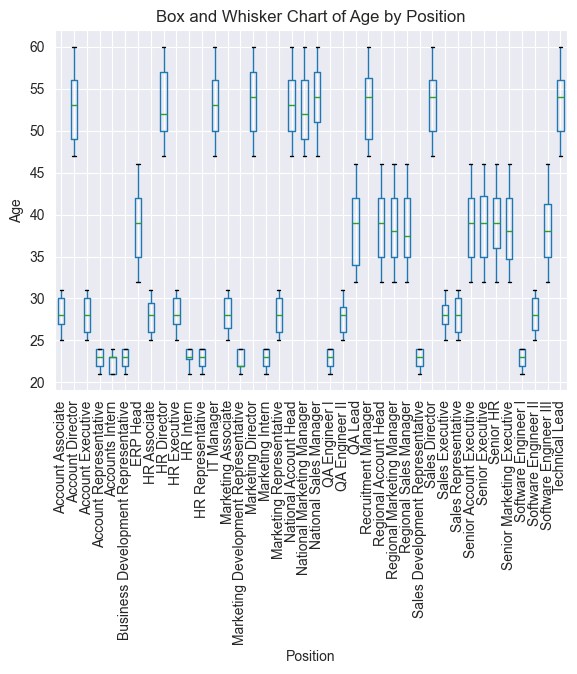

In [159]:
# Box and whisker chart for Salary based on Position
plt.figure(figsize=(50, 20))  
employee_df.boxplot(column='Salary', by='Position')
plt.title('Box and Whisker Chart of Salary by Position')
plt.suptitle('')  
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

# Box and whisker chart for Age based on Position
plt.figure(figsize=(50, 20))  
employee_df.boxplot(column='Age', by='Position')
plt.title('Box and Whisker Chart of Age by Position')
plt.suptitle('') 
plt.xlabel('Position')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In [160]:
# define career levels according to the levels that can be seen above
position_level_mapping = {
    1: ['Accounts Intern', 'Software Engineer I', 'Marketing Intern', 'Marketing Development Representative', 
        'HR Representative', 'QA Engineer I', 'Business Development Representative', 'HR Intern', 
        'Sales Development Representative', 'Account Representative'],
    2: ['Account Associate', 'HR Executive', 'Software Engineer II', 'HR Associate', 'Marketing Representative', 
        'QA Engineer II', 'Account Executive', 'Sales Executive', 'Marketing Associate', 'Sales Representative'],
    3: ['Regional Marketing Manager', 'Senior Marketing Executive', 'QA Lead', 'ERP Head', 'Regional Sales Manager', 
        'Senior Executive', 'Regional Account Head', 'Software Engineer III', 'Senior HR', 'Senior Account Executive'],
    4: ['National Marketing Manager', 'National Sales Manager', 'National Account Head', 'Account Director', 
        'HR Director', 'Sales Director', 'Technical Lead', 'Recruitment Manager', 'Marketing Director', 'IT Manager']
}
position_to_level = {position: level for level, positions in position_level_mapping.items() for position in positions}
employee_df['Position Level'] = employee_df['Position'].map(position_to_level)

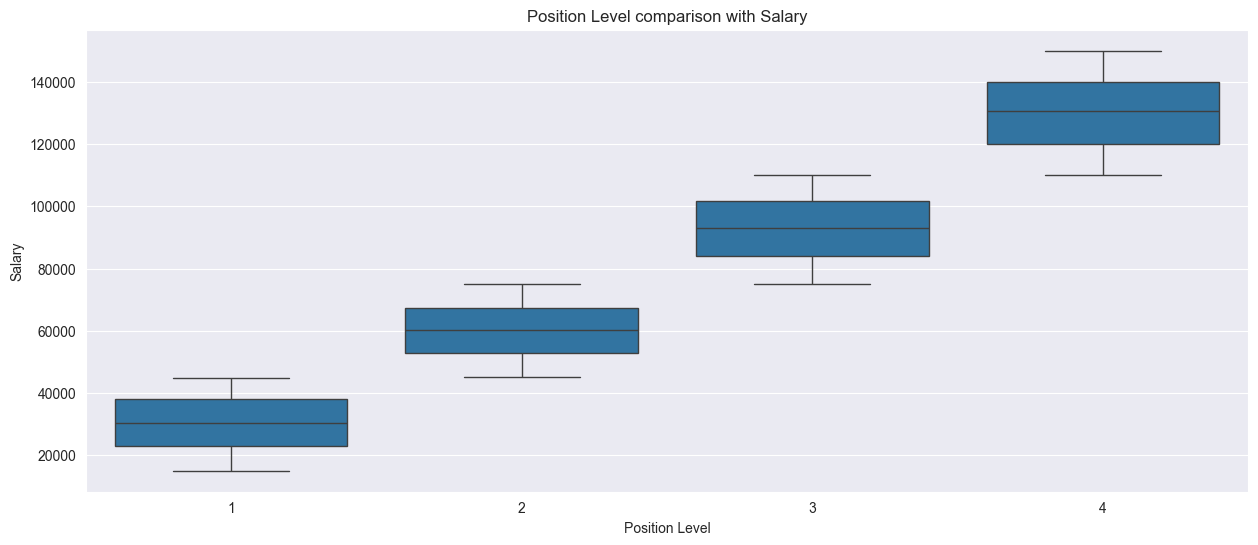

In [161]:
plt.figure(figsize=(15, 6))
sns.boxplot(employee_df, x=employee_df['Position Level'], y=employee_df['Salary'])
plt.title('Position Level comparison with Salary')
plt.show()

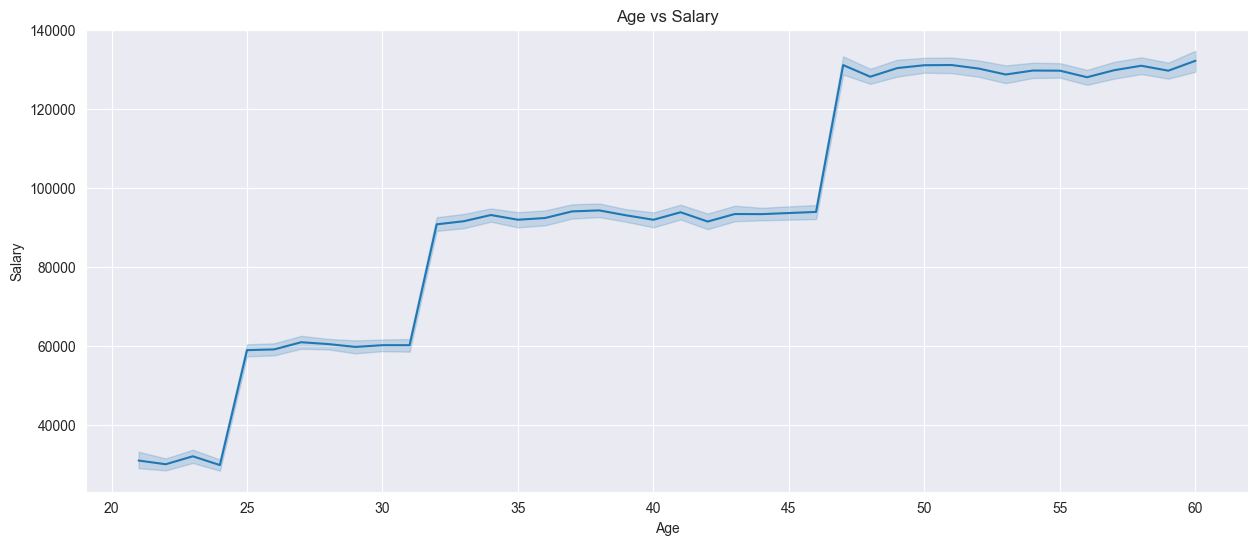

In [162]:
plt.figure(figsize=(15, 6))
sns.lineplot(employee_df, x=employee_df['Age'], y=employee_df['Salary'])
plt.title('Age vs Salary')
plt.show()

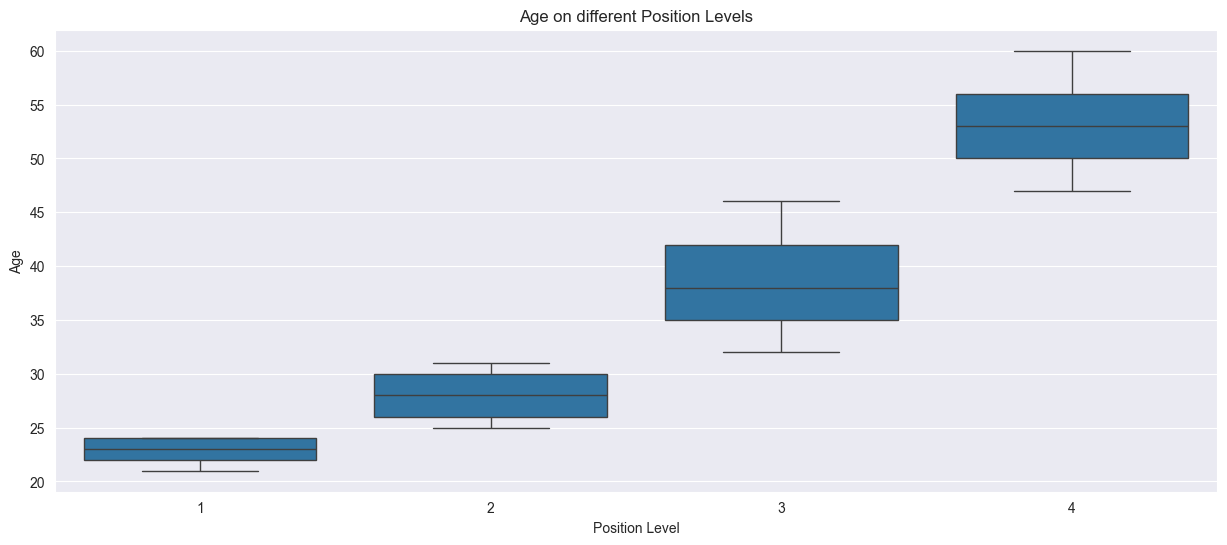

In [163]:
plt.figure(figsize=(15, 6))
sns.boxplot(employee_df, x=employee_df['Position Level'], y=employee_df['Age'])
plt.title('Age on different Position Levels')
plt.show()

In [164]:
# create age groups according to the distribution seen above
employee_df['age_group'] = pd.cut(employee_df['Age'], bins=[0, 24, 31, 46, 60], labels=[1, 2, 3, 4])

In [165]:
# Create additional variables that might be of interest 
employee_df['long_term_service'] = np.where(employee_df['Year of Experience'] - employee_df['In Company Years'] <= 0, 1, 0)

employee_df['Medical Insurance'] = employee_df['Insurance'].apply(lambda x: 1 if 'Medical' in str(x) or 'Both' in str(x) else 0)
employee_df['Life Insurance'] = employee_df['Insurance'].apply(lambda x: 1 if 'Life' in str(x) or 'Both' in str(x) else 0)

employee_df['Insurance'] = employee_df['Insurance'].apply(lambda x: 'No' if 'Medical' not in str(x) and 'Both' not in str(x) and 'Life' not in str(x) else x)

In [166]:
employee_df.head()

Name     Salary         DOJ  Age  Gender  Dependents        HA  \
0  ZuLzMAsP   88438.99  10/25/2019   36  Female           2  7142.101   
1  xQYGOrHv  137819.29   11/8/2020   57  Female           4  4660.071   
2  jehfxCGw   81316.12   1/20/2014   37    Male           3  5485.388   
3  yCezYiFJ  111420.62   2/13/2012   55  Female           1  7822.938   
4  WDQboEZv   16185.35    5/4/2020   24   Other           2  8137.465   

           COLA           CPF   Gross Salary  ... Marital Status  \
0  20872.462360  13117.374283  103336.179077  ...        Married   
1  32526.693747  20441.518050  154564.536697  ...        Married   
2  19191.395718  12060.901886   93932.001832  ...       Divorced   
3  26296.350706  16526.036485  129013.872221  ...       Divorced   
4   3819.900122   2400.630015   25742.085107  ...        Married   

  In Company Years  Year of Experience  Department  \
0                4                  15   Marketing   
1                3                  36   Marketing   
2               10                  16   Marketing   
3               12                  34       Sales   
4                4                   3     Finance   

                     Position Position Level  age_group long_term_service  \
0  Regional Marketing Manager              3          3                 0   
1  National Marketing Manager              4          4                 0   
2  Senior Marketing Executive              3          3                 0   
3      National Sales Manager              4          4                 0   
4             Accounts Intern              1          1                 1   

   Medical Insurance  Life Insurance  
0                  1               0  
1                  1               0  
2                  0               0  
3                  0               1  
4                  1               0  

[5 rows x 21 columns]

In [167]:
employee_df.corr(numeric_only=True)

Salary       Age  Dependents        HA      COLA  \
Salary              1.000000  0.898907    0.365002  0.210832  1.000000   
Age                 0.898907  1.000000    0.327494  0.200167  0.898907   
Dependents          0.365002  0.327494    1.000000  0.083240  0.365002   
HA                  0.210832  0.200167    0.083240  1.000000  0.210832   
COLA                1.000000  0.898907    0.365002  0.210832  1.000000   
CPF                 1.000000  0.898907    0.365002  0.210832  1.000000   
Gross Salary        0.998156  0.897911    0.364719  0.269784  0.998156   
In Company Years    0.588960  0.661329    0.209496  0.147346  0.588960   
Year of Experience  0.898907  1.000000    0.327494  0.200167  0.898907   
Position Level      0.951564  0.931472    0.392675  0.209494  0.951564   
long_term_service  -0.325924 -0.315453   -0.205275 -0.055775 -0.325924   
Medical Insurance  -0.008151 -0.005957   -0.016128 -0.006807 -0.008151   
Life Insurance     -0.028037 -0.026003   -0.013021 -0.010475 -0.028037   

                         CPF  Gross Salary  In Company Years  \
Salary              1.000000      0.998156          0.588960   
Age                 0.898907      0.897911          0.661329   
Dependents          0.365002      0.364719          0.209496   
HA                  0.210832      0.269784          0.147346   
COLA                1.000000      0.998156          0.588960   
CPF                 1.000000      0.998156          0.588960   
Gross Salary        0.998156      1.000000          0.589313   
In Company Years    0.588960      0.589313          1.000000   
Year of Experience  0.898907      0.897911          0.661329   
Position Level      0.951564      0.950360          0.607897   
long_term_service  -0.325924     -0.324519         -0.046259   
Medical Insurance  -0.008151     -0.008452         -0.011523   
Life Insurance     -0.028037     -0.028269         -0.007309   

                    Year of Experience  Position Level  long_term_service  \
Salary                        0.898907        0.951564          -0.325924   
Age                           1.000000        0.931472          -0.315453   
Dependents                    0.327494        0.392675          -0.205275   
HA                            0.200167        0.209494          -0.055775   
COLA                          0.898907        0.951564          -0.325924   
CPF                           0.898907        0.951564          -0.325924   
Gross Salary                  0.897911        0.950360          -0.324519   
In Company Years              0.661329        0.607897          -0.046259   
Year of Experience            1.000000        0.931472          -0.315453   
Position Level                0.931472        1.000000          -0.360191   
long_term_service            -0.315453       -0.360191           1.000000   
Medical Insurance            -0.005957       -0.006040          -0.004452   
Life Insurance               -0.026003       -0.026973           0.018161   

                    Medical Insurance  Life Insurance  
Salary                      -0.008151       -0.028037  
Age                         -0.005957       -0.026003  
Dependents                  -0.016128       -0.013021  
HA                          -0.006807       -0.010475  
COLA                        -0.008151       -0.028037  
CPF                         -0.008151       -0.028037  
Gross Salary                -0.008452       -0.028269  
In Company Years            -0.011523       -0.007309  
Year of Experience          -0.005957       -0.026003  
Position Level              -0.006040       -0.026973  
long_term_service           -0.004452        0.018161  
Medical Insurance            1.000000        0.009020  
Life Insurance               0.009020        1.000000

### Position Equality Analysis

In [168]:
list_dep = employee_df['Department'].unique()
print(list_dep)

['Marketing' 'Sales' 'Finance' 'IT' 'Human Resources']


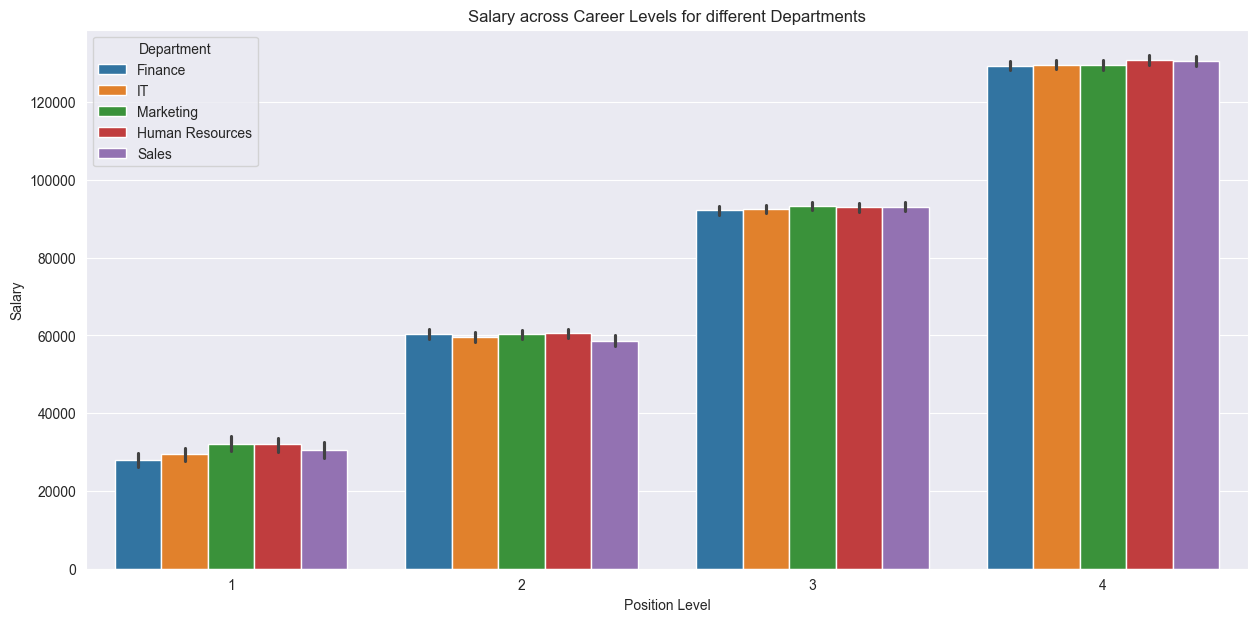

In [169]:
plt.figure(figsize=(15, 7))
sns.barplot(employee_df, x=employee_df['Position Level'], y=employee_df['Salary'], hue=employee_df['Department'])
plt.title('Salary across Career Levels for different Departments')
plt.show()

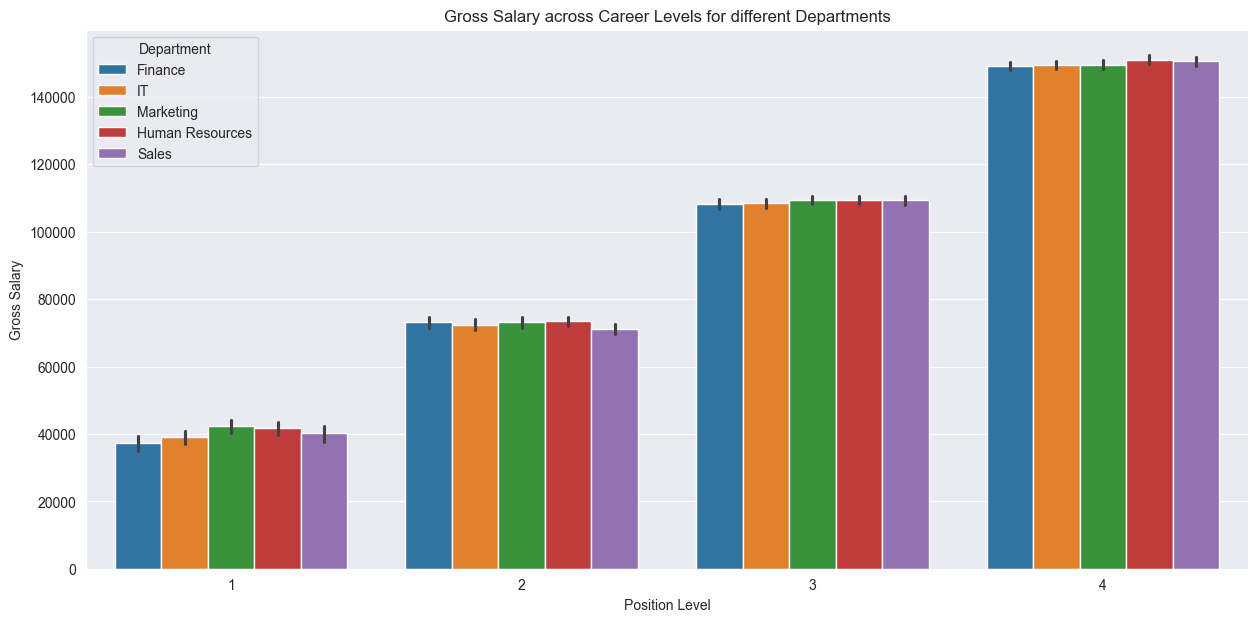

In [170]:
plt.figure(figsize=(15, 7))
sns.barplot(employee_df, x=employee_df['Position Level'], y=employee_df['Gross Salary'], hue=employee_df['Department'])
plt.title('Gross Salary across Career Levels for different Departments')
plt.show()

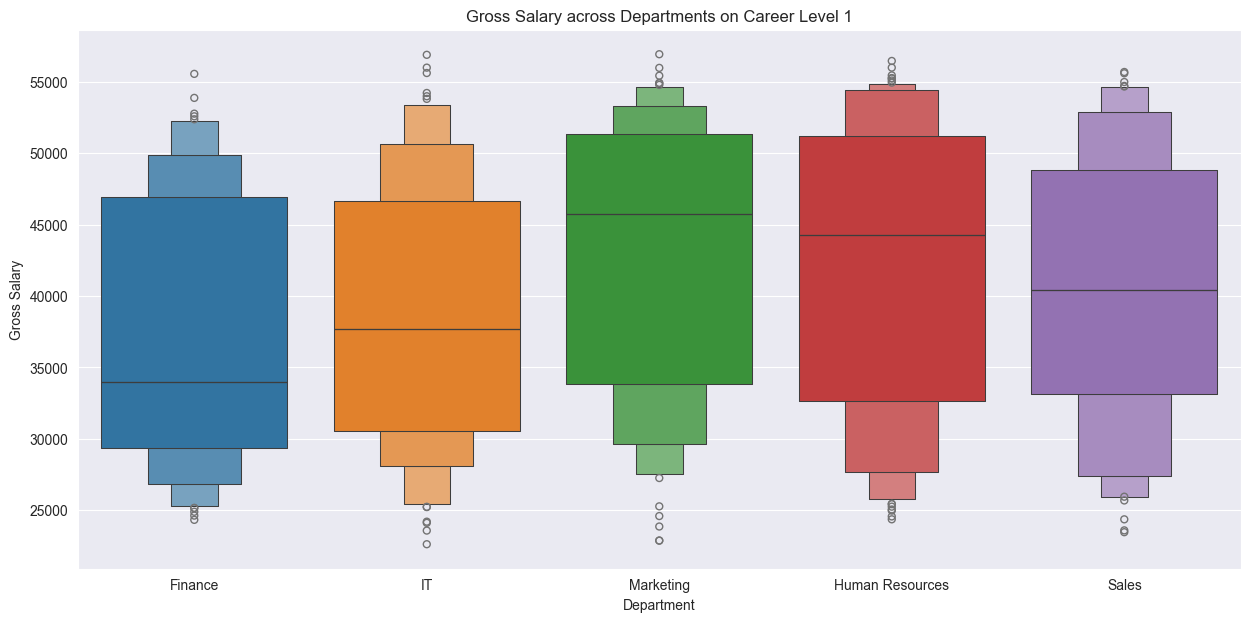

In [171]:
level_1_df = employee_df[employee_df['Position Level'] == 1]

plt.figure(figsize=(15, 7))
sns.boxenplot(level_1_df, x=level_1_df['Department'], y=level_1_df['Gross Salary'], hue=level_1_df['Department'])
plt.title('Gross Salary across Departments on Career Level 1')
plt.show()

In [172]:
print(
level_1_df[level_1_df['Department'] == 'Finance']['Gross Salary'].mean(),
level_1_df[level_1_df['Department'] == 'IT']['Gross Salary'].mean(),
level_1_df[level_1_df['Department'] == 'Marketing']['Gross Salary'].mean(),
level_1_df[level_1_df['Department'] == 'Human Resources']['Gross Salary'].mean(),
level_1_df[level_1_df['Department'] == 'Sales']['Gross Salary'].mean()
)

37196.64415402004 38971.30148090161 42267.26271731949 41760.319116030005 40233.689084124824


In [173]:
print(
level_1_df[level_1_df['Department'] == 'Finance']['Gross Salary'].std(),
level_1_df[level_1_df['Department'] == 'IT']['Gross Salary'].std(),
level_1_df[level_1_df['Department'] == 'Marketing']['Gross Salary'].std(),
level_1_df[level_1_df['Department'] == 'Human Resources']['Gross Salary'].std(),
level_1_df[level_1_df['Department'] == 'Sales']['Gross Salary'].std()
)

9442.581738129858 9582.987356630465 9848.641744847988 10366.165681957438 9843.49779598488


In [174]:
# finance seems to have a lower entry salary than the other departments
# 1: define the two groups (finance and non-finance with their salary)
finance_dep = level_1_df[level_1_df['Department'] == 'Finance']['Gross Salary']
non_finance_dep = level_1_df[level_1_df['Department'] != 'Finance']['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(finance_dep, non_finance_dep, alternative='two-sided', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -3.048938703421846, P-Value: 0.0028512272663509335


In [175]:
confidence_intervals = level_1_df.groupby('Department')['Gross Salary'].apply(
    lambda x: stats.t.interval(0.90, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))
).reset_index()

confidence_intervals.columns = ['Department', 'Gross Salary Confidence Interval Career Level 1']
confidence_intervals

Department Gross Salary Confidence Interval Career Level 1
0          Finance          (35392.75796386149, 39000.53034417858)
1  Human Resources         (40056.40679903136, 43464.231433028646)
2               IT          (37282.69118791908, 40659.91177388414)
3        Marketing         (40531.841683841754, 44002.68375079723)
4            Sales           (38211.8849354414, 42255.49323280825)

In [176]:
# marketing seems to have a higher entry salary than the other departments
# 1: define the two groups (marketing and non-marketing with their salary)
marketing_dep = level_1_df[level_1_df['Department'] == 'Marketing']['Gross Salary']
non_marketing_dep = level_1_df[level_1_df['Department'] != 'Marketing']['Gross Salary']
# 2: Perform one-tailed t-test to check if marketing is greater
t_stat, p_value = stats.ttest_ind(marketing_dep, non_marketing_dep, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 2.2043934752734224, P-Value: 0.01456569993947164


In [177]:
# marketing and HR seem to have a higher entry salary than the other departments
# 1: define the two groups (marketing and HR and sales and it and finance with their salary)
mark_hr_dep = level_1_df[(level_1_df['Department'] == 'Marketing') | (level_1_df['Department'] == 'Human Resources')]['Gross Salary']
non_mark_hr_dep = level_1_df[(level_1_df['Department'] != 'Marketing') & (level_1_df['Department'] != 'Human Resources')]['Gross Salary']
# 2: Perform one-tailed t-test to check if marketing and hr are greater
t_stat, p_value = stats.ttest_ind(mark_hr_dep, non_mark_hr_dep, alternative='two-sided', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 3.3551539308253564, P-Value: 0.0008694637532761497


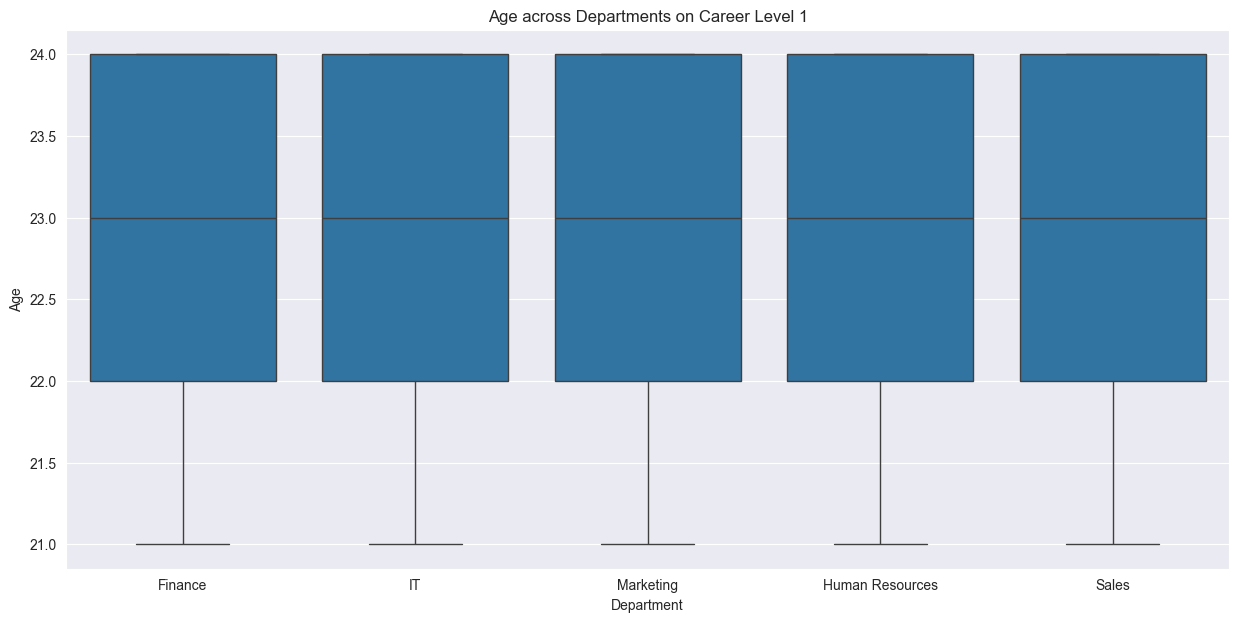

In [178]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_1_df, x=level_1_df['Department'], y=level_1_df['Age'])
plt.title('Age across Departments on Career Level 1')
plt.show()


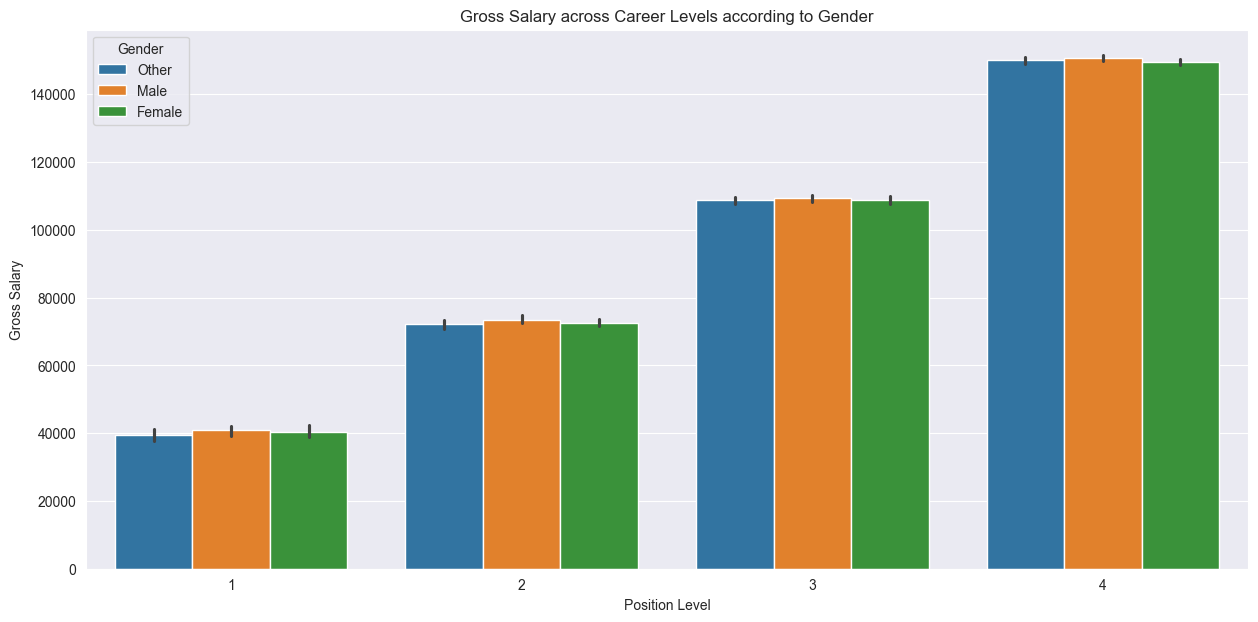

In [179]:
plt.figure(figsize=(15, 7))
sns.barplot(employee_df, x=employee_df['Position Level'], y=employee_df['Gross Salary'], hue=employee_df['Gender'])
plt.title('Gross Salary across Career Levels according to Gender')
plt.show()

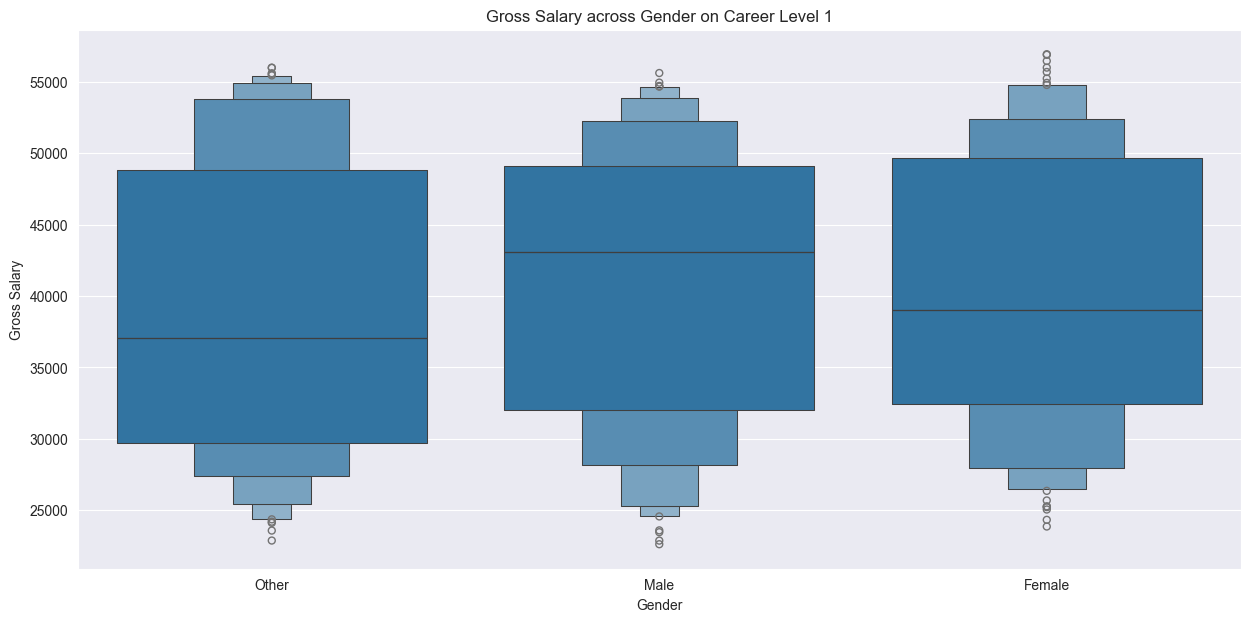

In [180]:
plt.figure(figsize=(15, 7))
sns.boxenplot(level_1_df, x=level_1_df['Gender'], y=level_1_df['Gross Salary'])
plt.title('Gross Salary across Gender on Career Level 1')
plt.show()


In [181]:
# Males seem to have a higher entry salary than females and others
# 1: define the two groups (male and non-male with their salary)
male_group = level_1_df[level_1_df['Gender'] == 'Male']['Gross Salary']
non_male_group = level_1_df[level_1_df['Gender'] != 'Male']['Gross Salary']
# 2: Perform one-tailed t-test to check if males have a higher salary
t_stat, p_value = stats.ttest_ind(male_group, non_male_group, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 0.8967147472346335, P-Value: 0.1852641685984503


In [182]:
# Are employees who prefer not to disclose the gender mistreated?
# 1: define the two groups (other and non-other with their salary)
other_group = level_1_df[level_1_df['Gender'] == 'Other']['Gross Salary']
non_other_group = level_1_df[level_1_df['Gender'] != 'Other']['Gross Salary']
# 2: Perform one-tailed t-test to check if others earn less
t_stat, p_value = stats.ttest_ind(other_group, non_other_group, alternative='less', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -1.1562256172083059, P-Value: 0.124288578578067


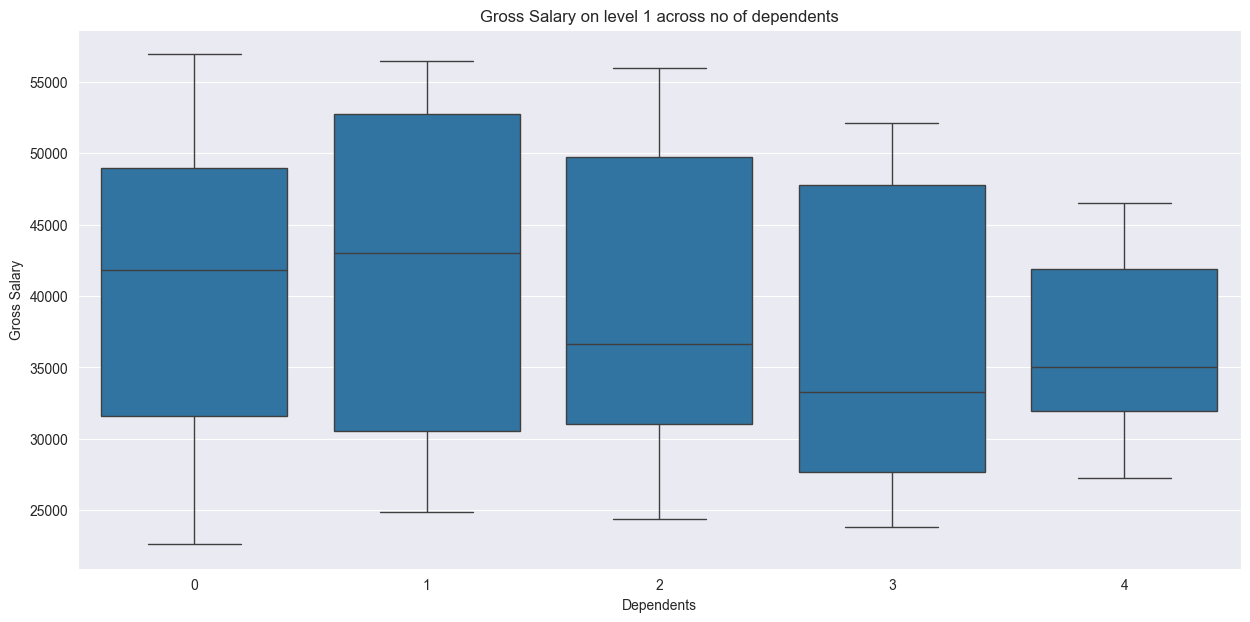

In [183]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_1_df, x=level_1_df['Dependents'], y=level_1_df['Gross Salary'])
plt.title('Gross Salary on level 1 across no of dependents')
plt.show()

<Axes: xlabel='Dependents', ylabel='Count'>

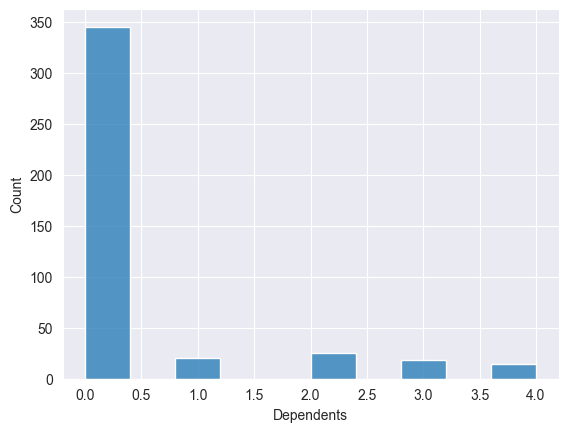

In [184]:
sns.histplot(level_1_df, x=level_1_df['Dependents'])

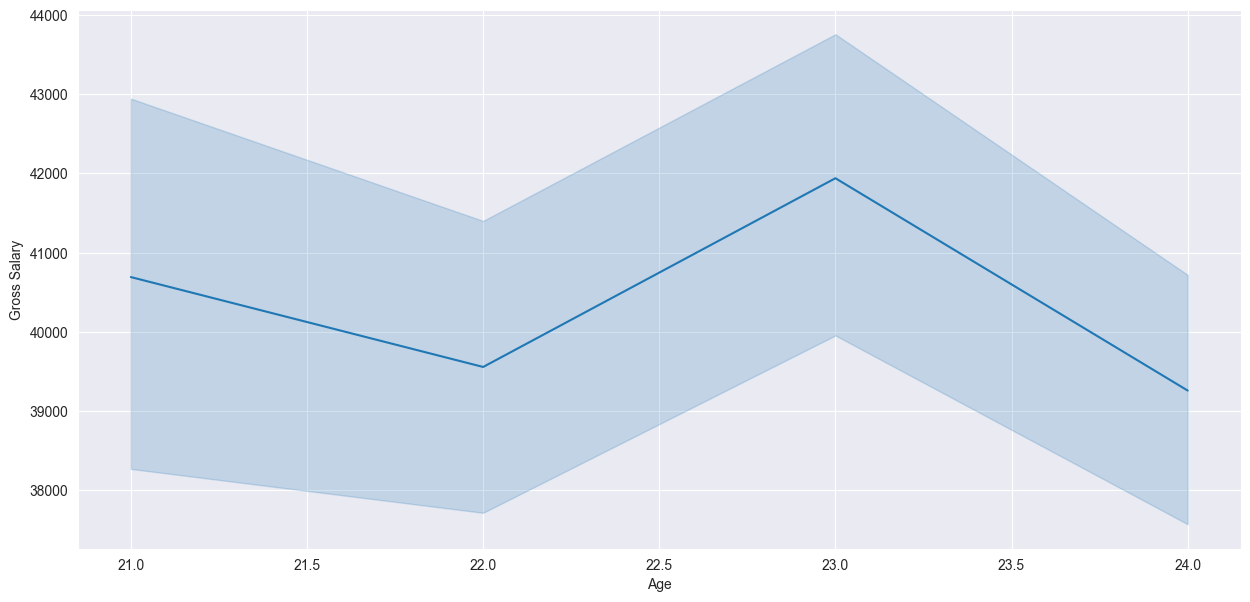

In [185]:
plt.figure(figsize=(15, 7))
sns.lineplot(level_1_df, x=level_1_df['Age'], y=level_1_df['Gross Salary'])
plt.show()

In [186]:
# Are 23-year olds earning more?
# 1: define the two groups (23 and non-23 with their salary)
y_23_group = level_1_df[level_1_df['Age'] == 23]['Gross Salary']
non_y_23_group = level_1_df[level_1_df['Age'] != 23]['Gross Salary']
# 2: Perform one-tailed t-test to check if 23-year-olds earn more
t_stat, p_value = stats.ttest_ind(y_23_group, non_y_23_group, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 1.9957950153927364, P-Value: 0.02377457390578272


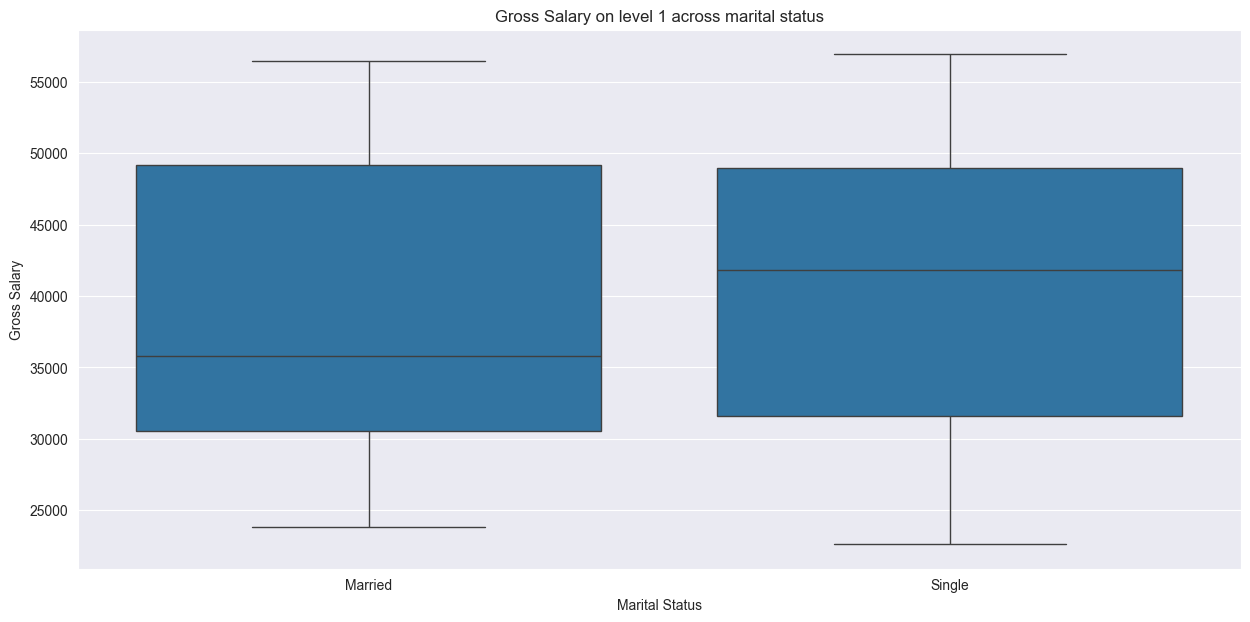

In [187]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_1_df, x=level_1_df['Marital Status'], y=level_1_df['Gross Salary'])
plt.title('Gross Salary on level 1 across marital status')
plt.show()

<Axes: xlabel='Marital Status', ylabel='Count'>

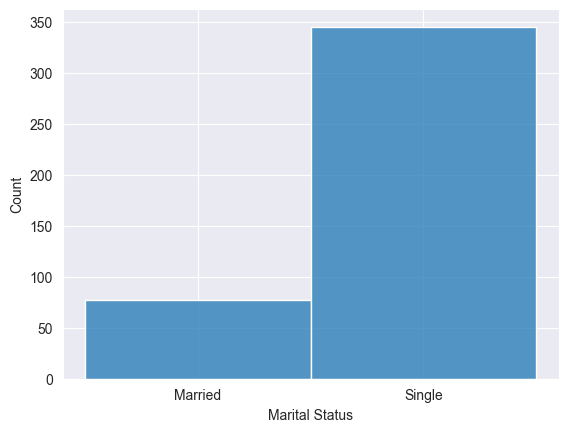

In [188]:
sns.histplot(level_1_df, x=level_1_df['Marital Status'])

In [189]:
# Are 23-year olds earning more?
# 1: define the two groups (23 and non-23 with their salary)
single_group = level_1_df[level_1_df['Marital Status'] == 'Single']['Gross Salary']
non_single_group = level_1_df[level_1_df['Marital Status'] == 'Married']['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(single_group, non_single_group, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 1.2567665353662876, P-Value: 0.10574245136752478


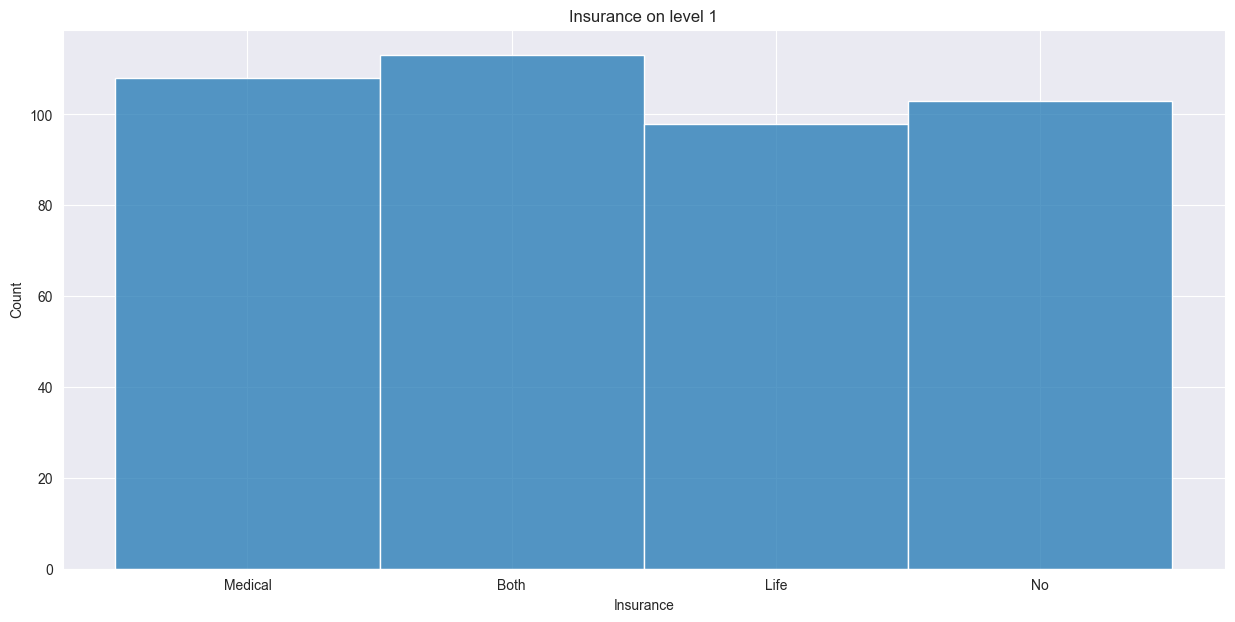

In [190]:
plt.figure(figsize=(15, 7))
sns.histplot(level_1_df, x=level_1_df['Insurance'])
plt.title('Insurance on level 1')
plt.show()

In [191]:
level_2_df = employee_df[employee_df['Position Level'] == 2]

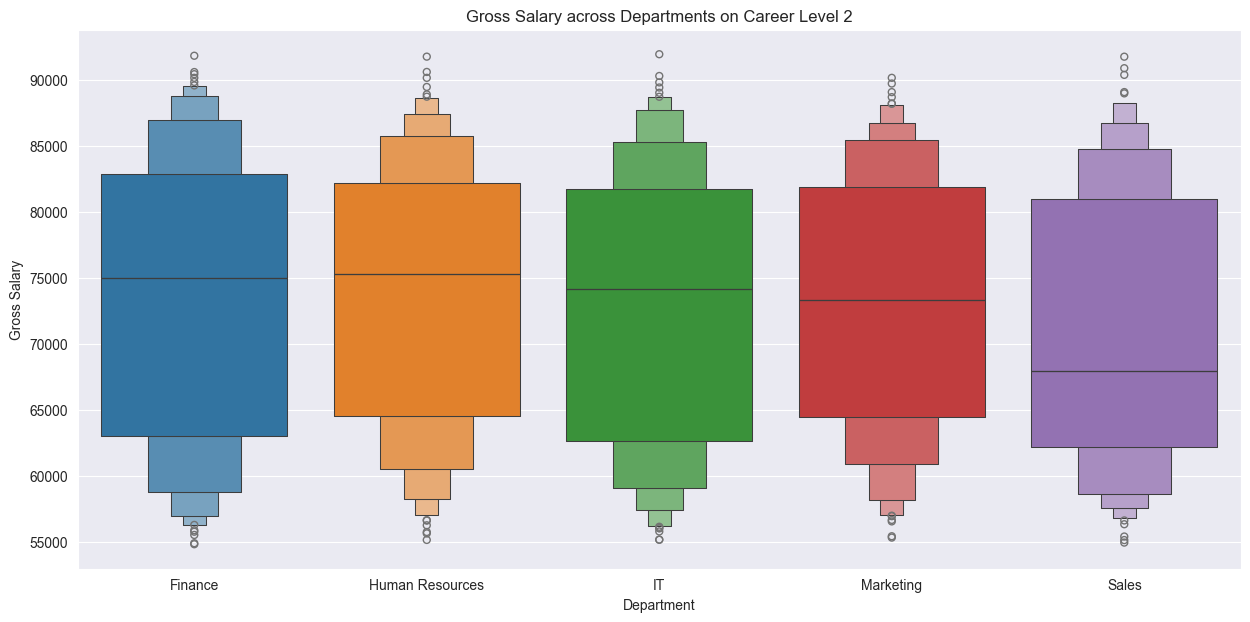

In [192]:
plt.figure(figsize=(15, 7))
sns.boxenplot(level_2_df, x=level_2_df['Department'], y=level_2_df['Gross Salary'], hue=level_2_df['Department'])
plt.title('Gross Salary across Departments on Career Level 2')
plt.show()


In [193]:
print(
level_2_df[level_2_df['Department'] == 'Finance']['Gross Salary'].mean(),
level_2_df[level_2_df['Department'] == 'IT']['Gross Salary'].mean(),
level_2_df[level_2_df['Department'] == 'Marketing']['Gross Salary'].mean(),
level_2_df[level_2_df['Department'] == 'Human Resources']['Gross Salary'].mean(),
level_2_df[level_2_df['Department'] == 'Sales']['Gross Salary'].mean()
)

73095.83447484407 72457.80481013552 73136.02417421422 73482.15376939702 71112.8979824649


In [194]:
# Sales seems to have a lower salary than the other departments on this career level
# 1: define the two groups (sales and non-sales with their salary)
sales_dep = level_2_df[level_2_df['Department'] == 'Sales']['Gross Salary']
non_sales_dep = level_2_df[level_2_df['Department'] != 'Sales']['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(sales_dep, non_sales_dep, alternative='two-sided', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -2.091039691245112, P-Value: 0.037635496411696036


In [195]:
confidence_intervals = level_2_df.groupby('Department')['Gross Salary'].apply(
    lambda x: stats.t.interval(0.90, len(x)-1, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))
).reset_index()

confidence_intervals.columns = ['Department', 'Gross Salary Confidence Interval Career Level 2']
confidence_intervals

Department Gross Salary Confidence Interval Career Level 2
0          Finance          (71710.90057587781, 74480.76837381034)
1  Human Resources          (72275.57346817366, 74688.73407062037)
2               IT          (71105.00763613202, 73810.60198413902)
3        Marketing          (71857.89552342764, 74414.15282500081)
4            Sales          (69715.34043423017, 72510.45553069963)

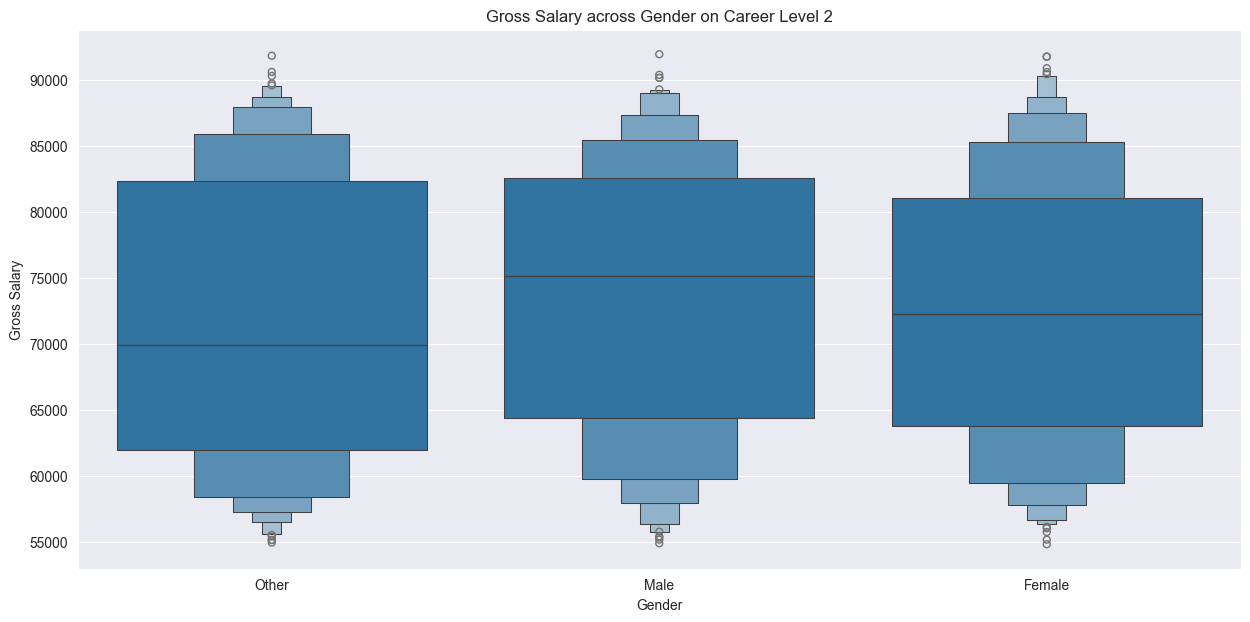

In [196]:
plt.figure(figsize=(15, 7))
sns.boxenplot(level_2_df, x=level_2_df['Gender'], y=level_2_df['Gross Salary'])
plt.title('Gross Salary across Gender on Career Level 2')
plt.show()


In [197]:
# Males seems to have a higher salary than others or females on this career level
# 1: define the two groups (males and non-males with their salary)
males_group = level_2_df[level_2_df['Gender'] == 'Male']['Gross Salary']
non_males_group = level_2_df[level_2_df['Gender'] != 'Male']['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(males_group, non_males_group, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 1.5765490350147218, P-Value: 0.05773524908050073


In [198]:
# others seems to have a lower salary than males or females on this career level
# 1: define the two groups (others and non-others with their salary)
others_group = level_2_df[level_2_df['Gender'] == 'Other']['Gross Salary']
non_others_group = level_2_df[level_2_df['Gender'] != 'Other']['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(others_group, non_others_group, alternative='less', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -1.1405846877328685, P-Value: 0.12727333058916596


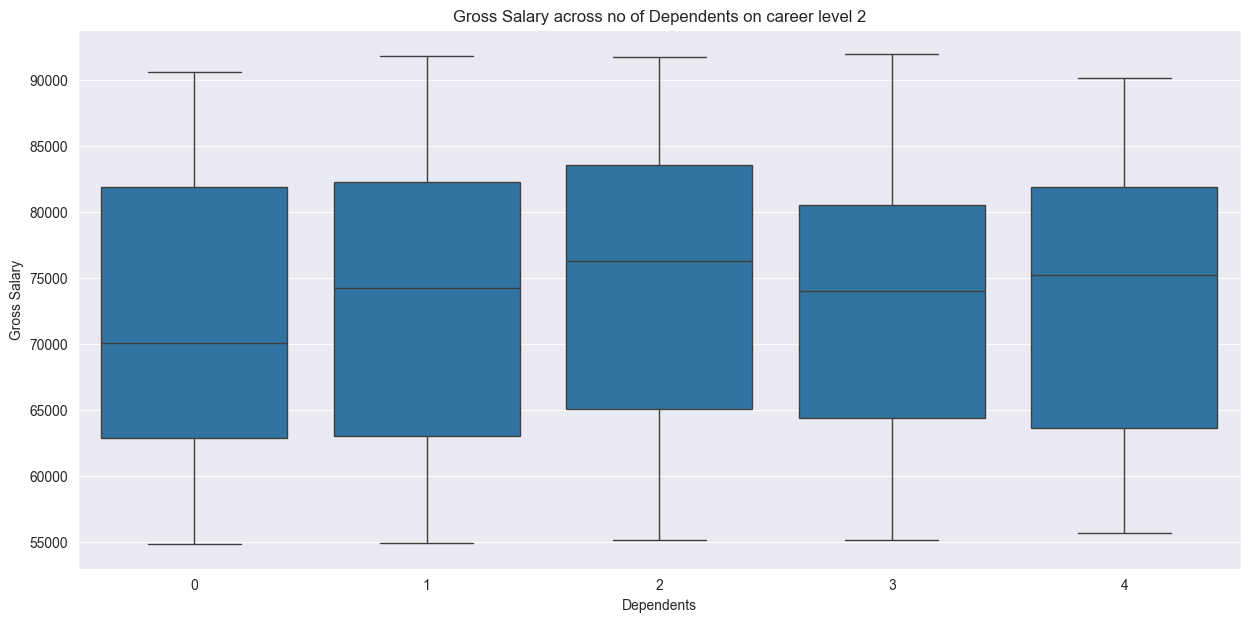

In [199]:
plt.figure(figsize=(15,7))
sns.boxplot(level_2_df, x=level_2_df['Dependents'], y=level_2_df['Gross Salary'])
plt.title('Gross Salary across no of Dependents on career level 2')
plt.show()

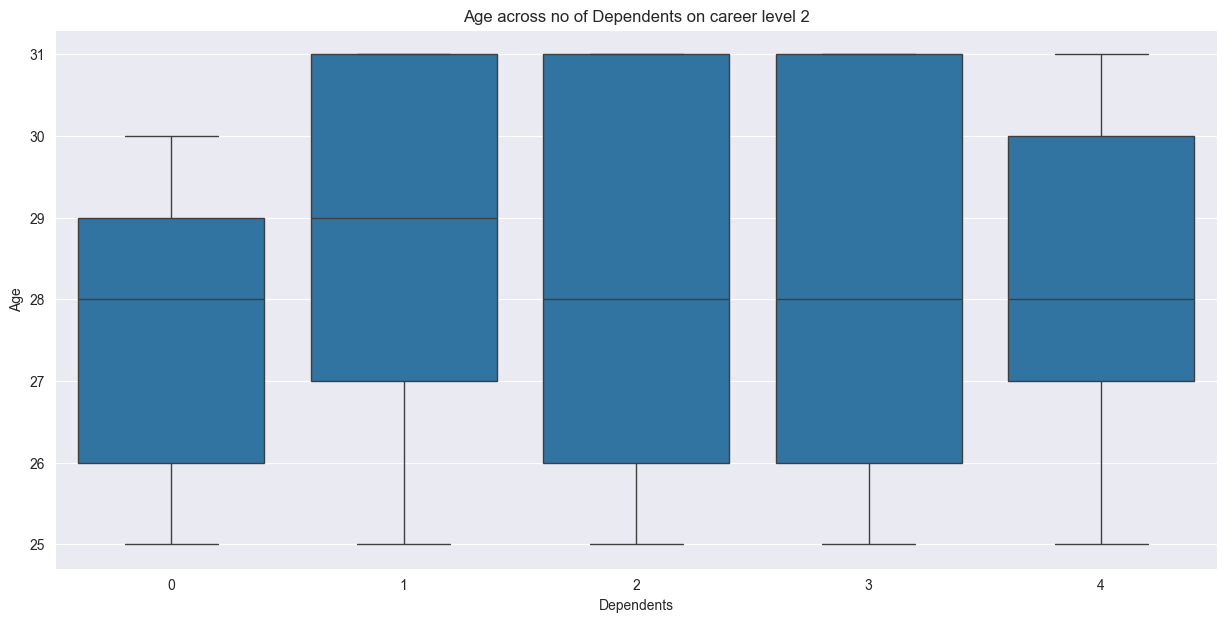

In [200]:
plt.figure(figsize=(15,7))
sns.boxplot(level_2_df, x=level_2_df['Dependents'], y=level_2_df['Age'])
plt.title('Age across no of Dependents on career level 2')
plt.show()

<Axes: xlabel='Dependents', ylabel='Count'>

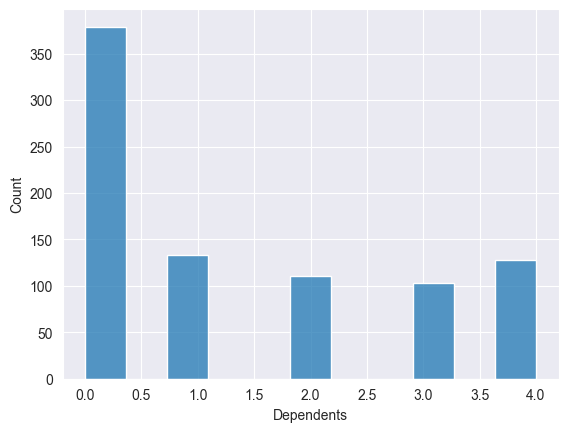

In [201]:
sns.histplot(level_2_df, x=level_2_df['Dependents'])

In [202]:
# employees with 1 dependent seem to earn more than the others 
# 1: define the two groups (One_dep and non_one_dep with their salary)
One_dep = level_2_df[level_2_df['Dependents'] == 1]['Gross Salary']
non_one_dep = level_2_df[level_2_df['Dependents'] != 1]['Gross Salary']
# 2: Perform one-tailed t-test to check if finance is lower
t_stat, p_value = stats.ttest_ind(One_dep, non_one_dep, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -0.09524330947485214, P-Value: 0.5378880327421998


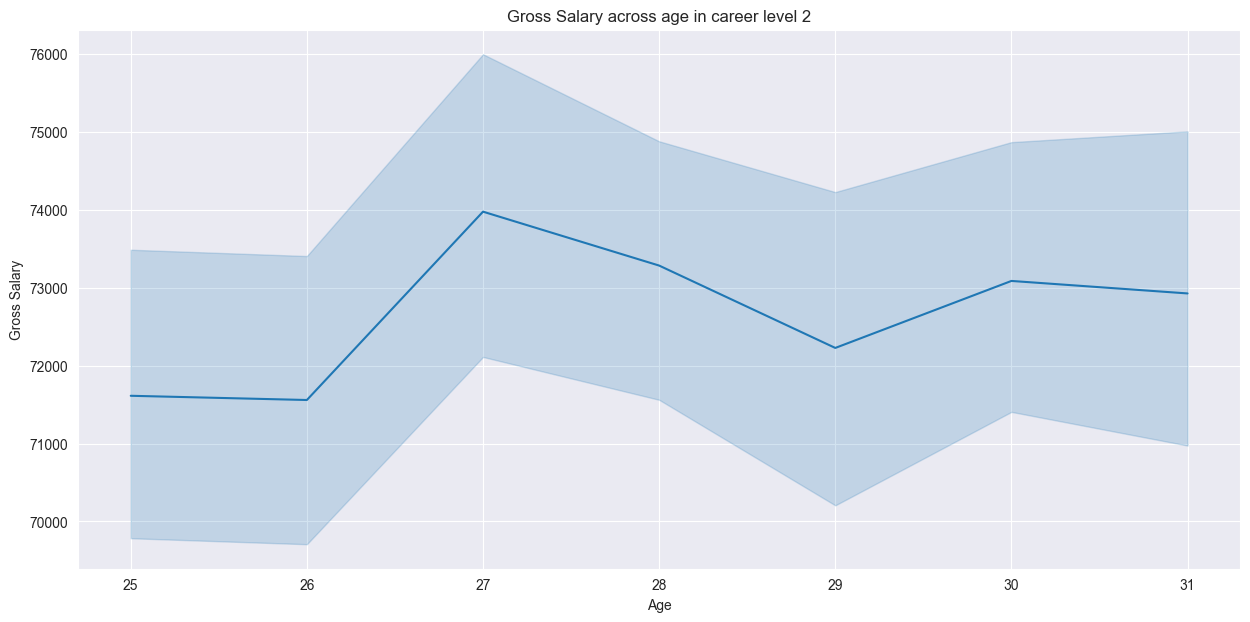

In [203]:
plt.figure(figsize=(15, 7))
sns.lineplot(level_2_df, x=level_2_df['Age'], y=level_2_df['Gross Salary'])
plt.title('Gross Salary across age in career level 2')
plt.show()

<Axes: xlabel='long_term_service', ylabel='Gross Salary'>

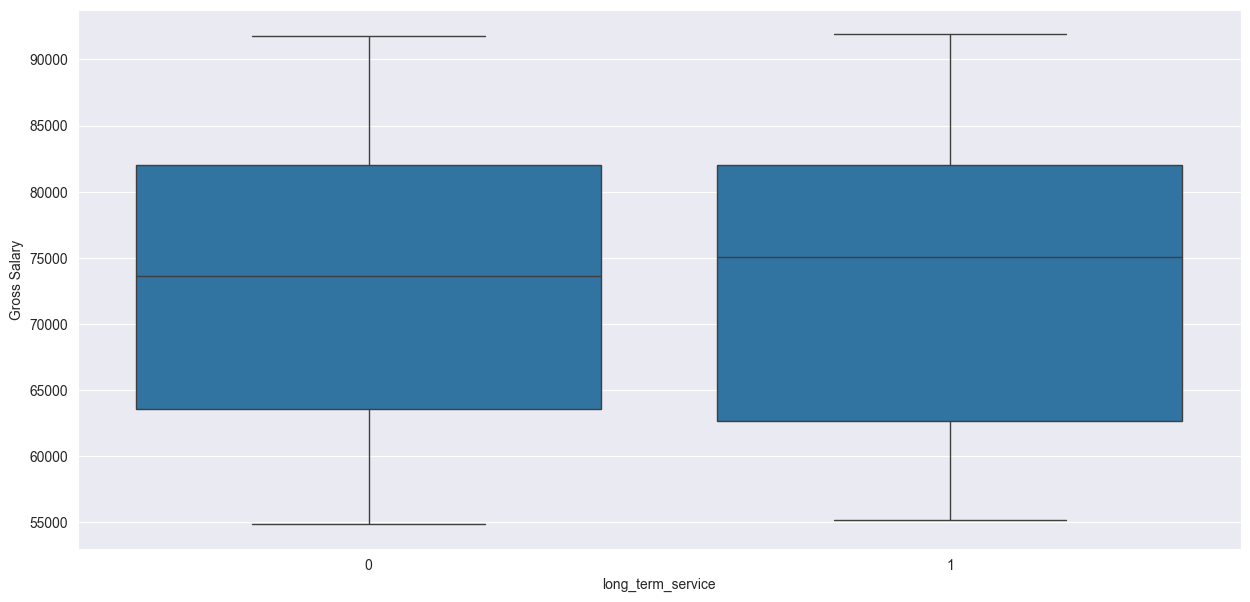

In [204]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_2_df, x=level_2_df['long_term_service'], y=level_2_df['Gross Salary'])

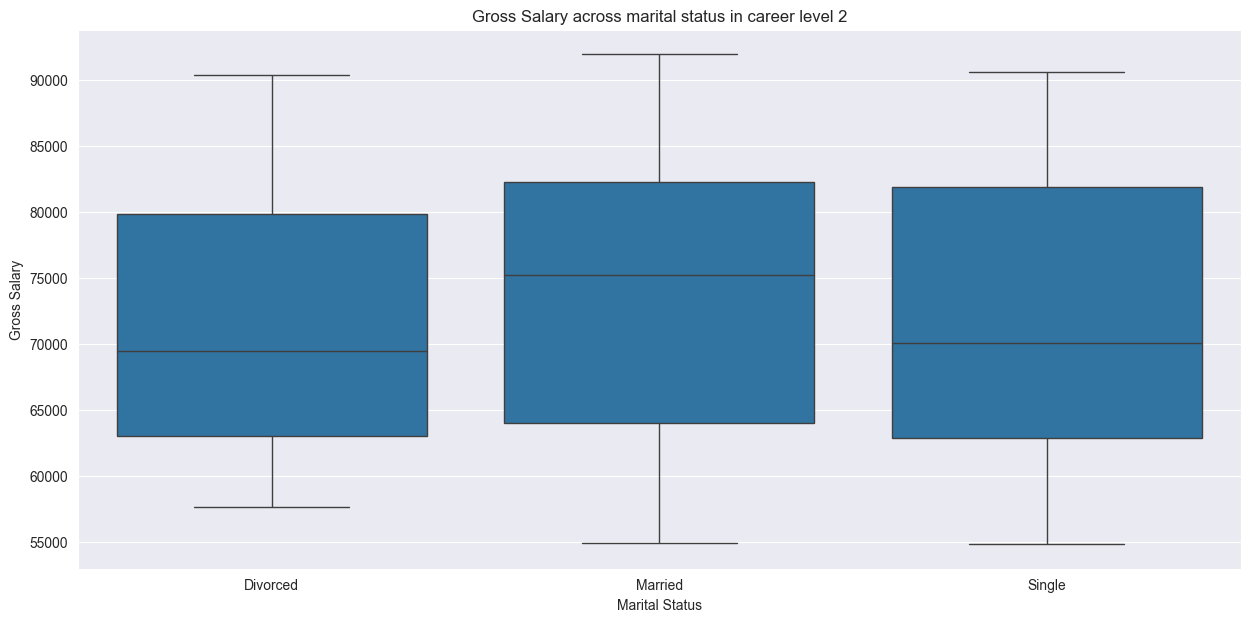

In [205]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_2_df, x=level_2_df['Marital Status'], y=level_2_df['Gross Salary'])
plt.title('Gross Salary across marital status in career level 2')
plt.show()

In [206]:
# married employees seem to earn more than singles and divorced ones 
# 1: define the two groups 
married_group = level_2_df[level_2_df['Marital Status'] == 'Married']['Gross Salary']
not_married_group = level_2_df[level_2_df['Marital Status'] != 'Married']['Gross Salary']
# 2: Perform one-tailed t-test
t_stat, p_value = stats.ttest_ind(married_group, not_married_group, alternative='greater', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: 1.341361128141854, P-Value: 0.09008399378189855


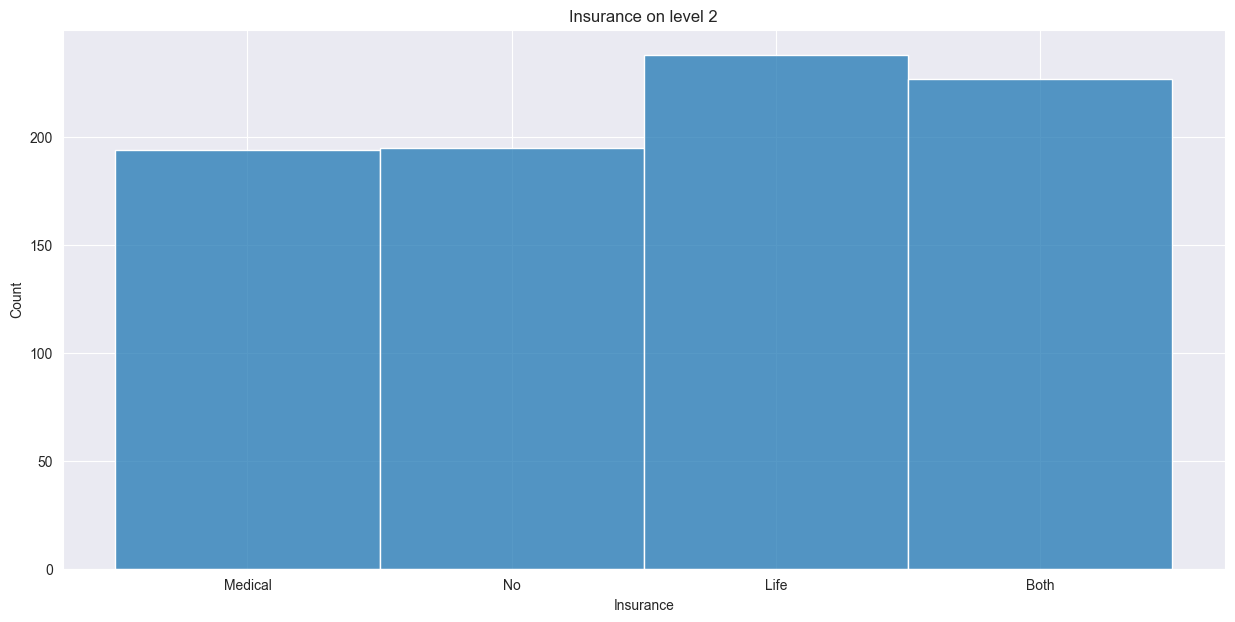

In [207]:
plt.figure(figsize=(15, 7))
sns.histplot(level_2_df, x=level_2_df['Insurance'])
plt.title('Insurance on level 2')
plt.show()

In [208]:
level_3_df = employee_df[employee_df['Position Level'] == 3]

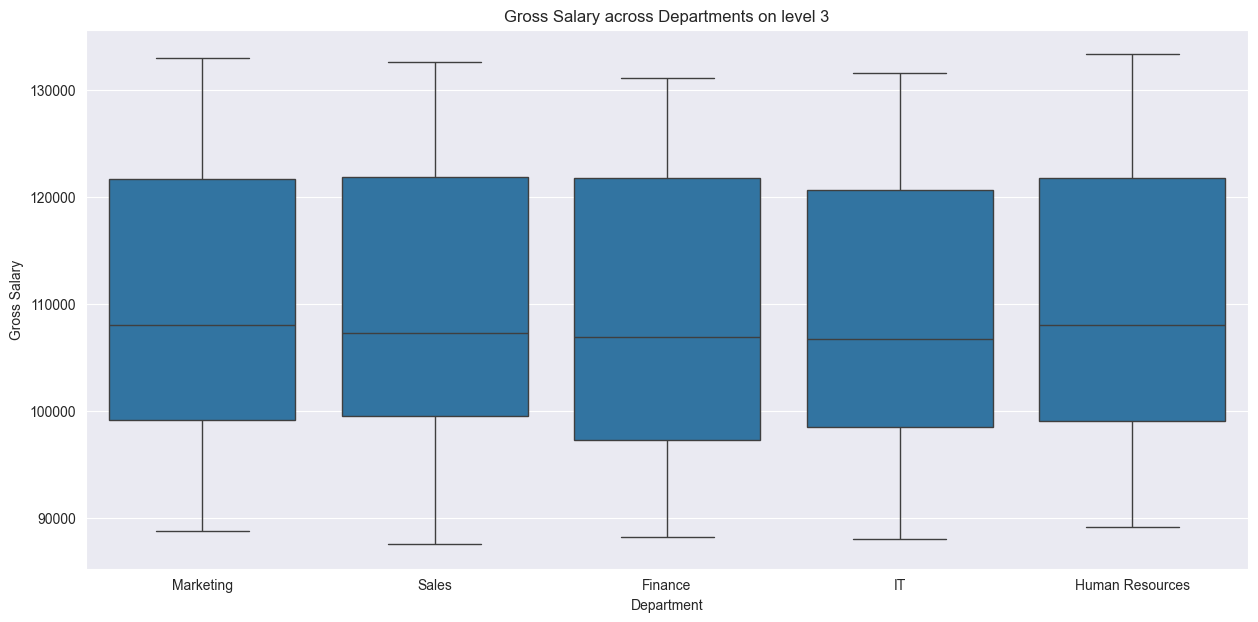

In [209]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_3_df, x=employee_df['Department'], y=level_3_df['Gross Salary'])
plt.title('Gross Salary across Departments on level 3')
plt.show()

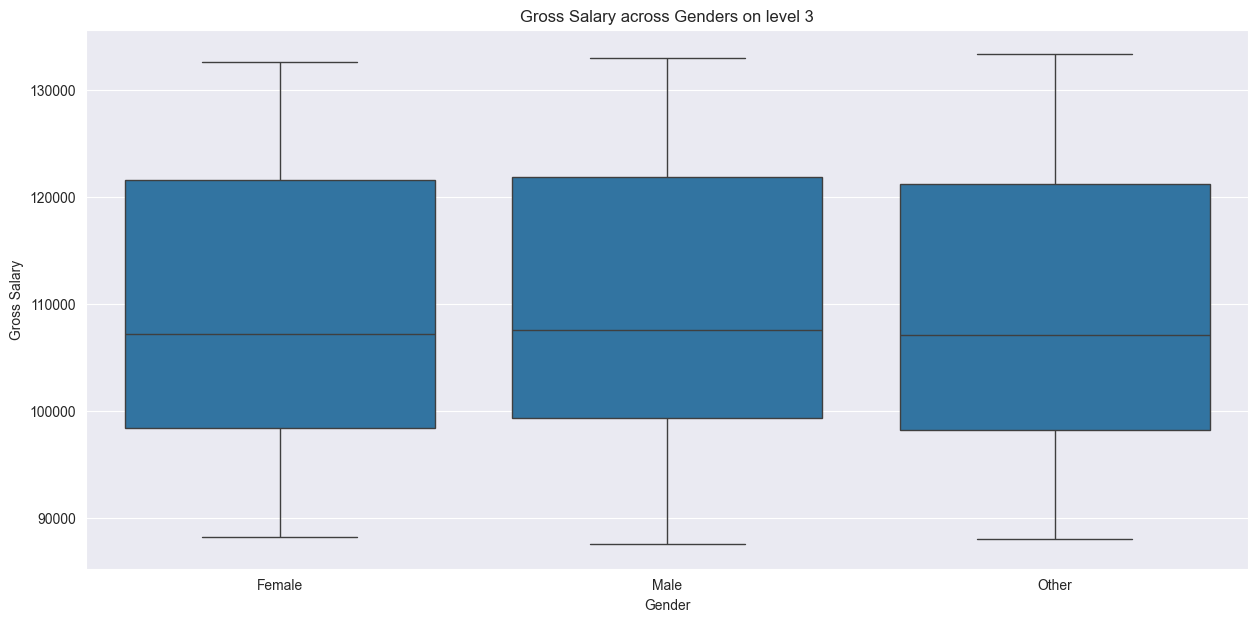

In [210]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_3_df, x=employee_df['Gender'], y=level_3_df['Gross Salary'])
plt.title('Gross Salary across Genders on level 3')
plt.show()

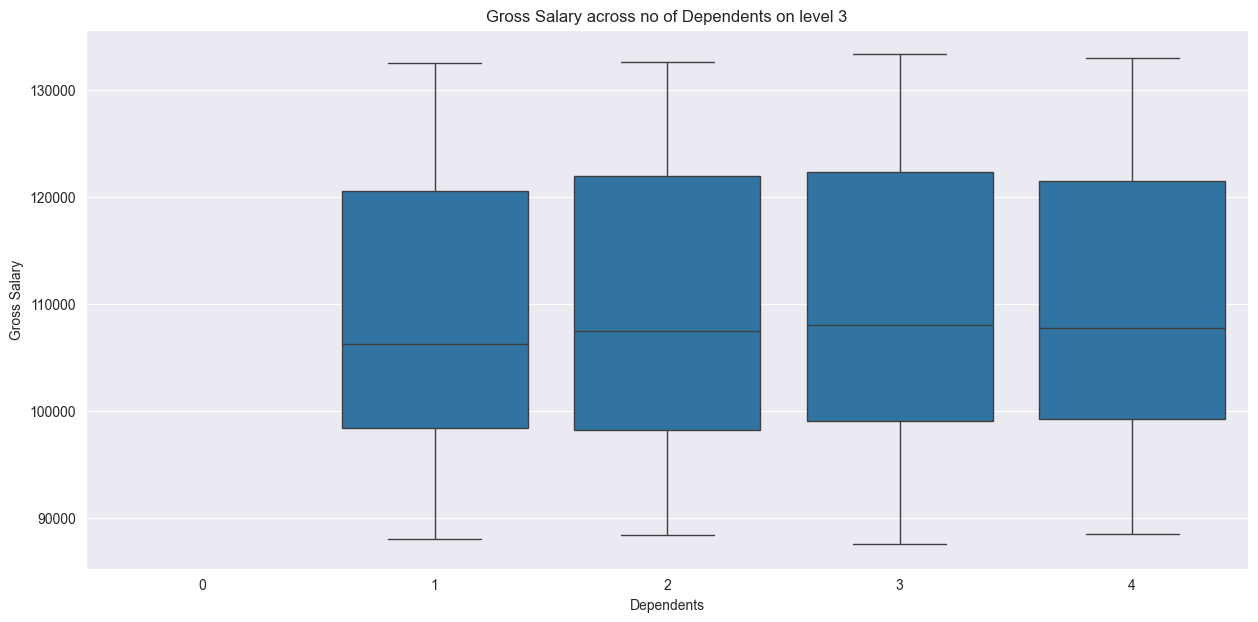

In [211]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_3_df, x=employee_df['Dependents'], y=level_3_df['Gross Salary'])
plt.title('Gross Salary across no of Dependents on level 3')
plt.show()

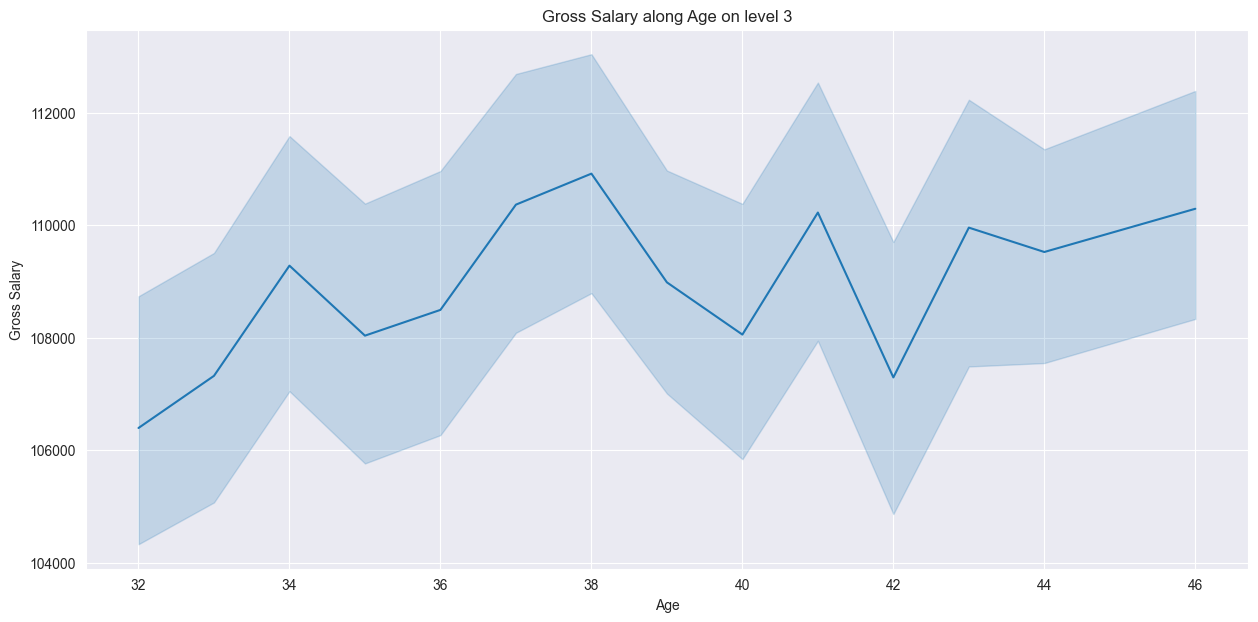

In [212]:
plt.figure(figsize=(15, 7))
sns.lineplot(level_3_df, x=employee_df['Age'], y=level_3_df['Gross Salary'])
plt.title('Gross Salary along Age on level 3')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

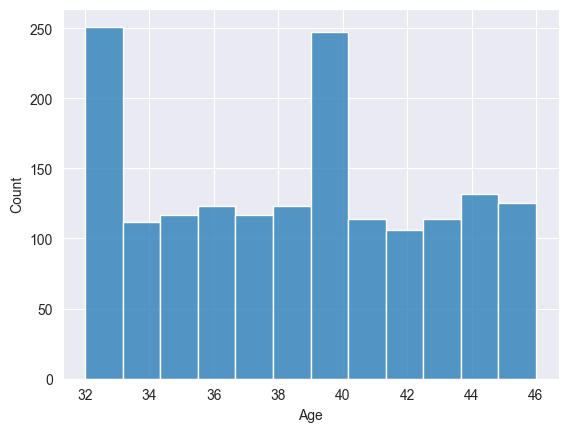

In [213]:
sns.histplot(level_3_df, x=level_3_df['Age'])

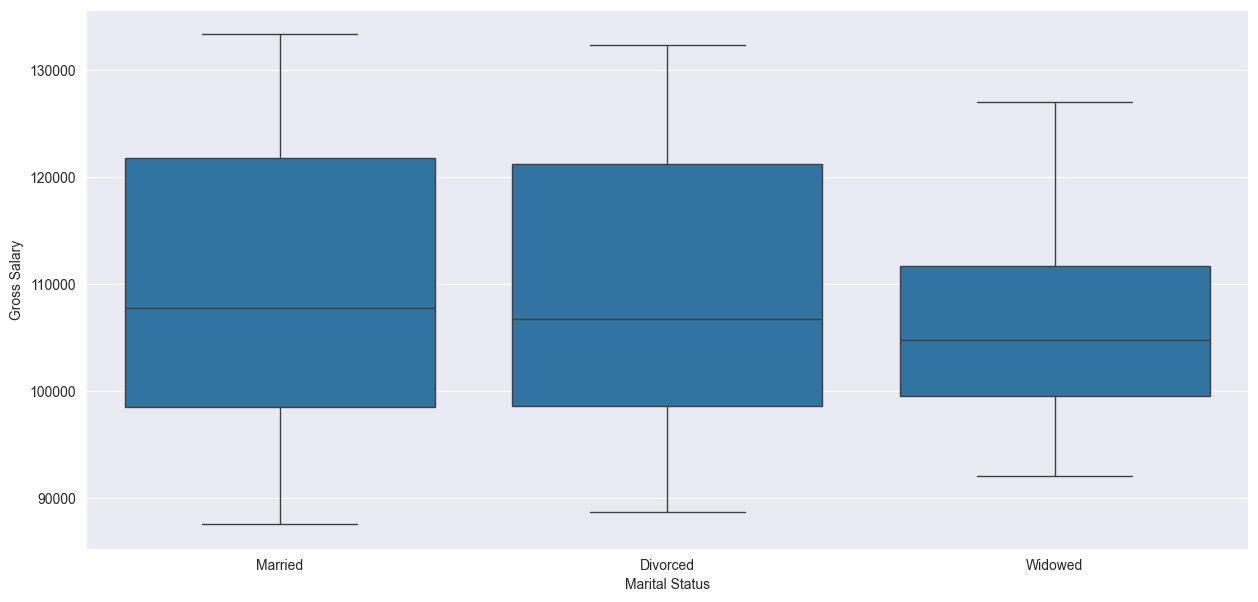

In [214]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_3_df, x=level_3_df['Marital Status'], y=level_3_df['Gross Salary'])
plt.show()

In [215]:
# widowed employees seem to earn less than the others ones 
# 1: define the two groups 
widowed_group = level_3_df[level_3_df['Marital Status'] == 'Widowed']['Gross Salary']
not_widowed_group = level_3_df[level_3_df['Marital Status'] != 'Widowed']['Gross Salary']
# 2: Perform one-tailed t-test
t_stat, p_value = stats.ttest_ind(widowed_group, not_widowed_group, alternative='less', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -0.8972326057217288, P-Value: 0.18891357295262456


In [216]:
level_4_df = employee_df[employee_df['Position Level'] == 4]

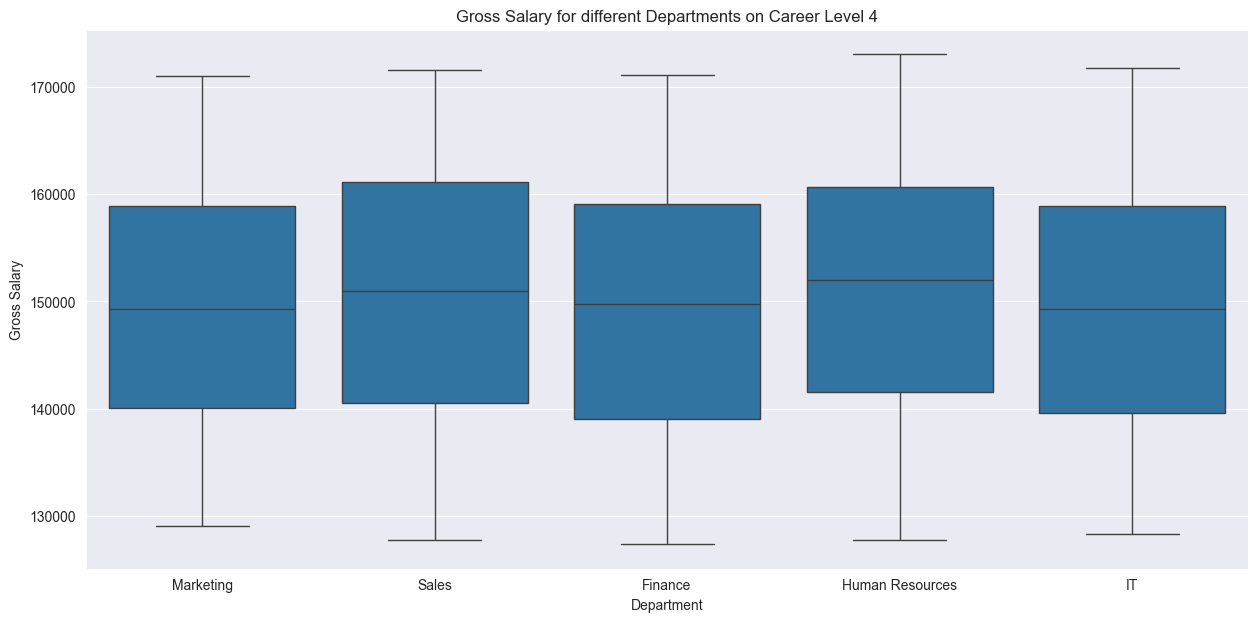

In [217]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_4_df, x=level_4_df['Department'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary for different Departments on Career Level 4')
plt.show()

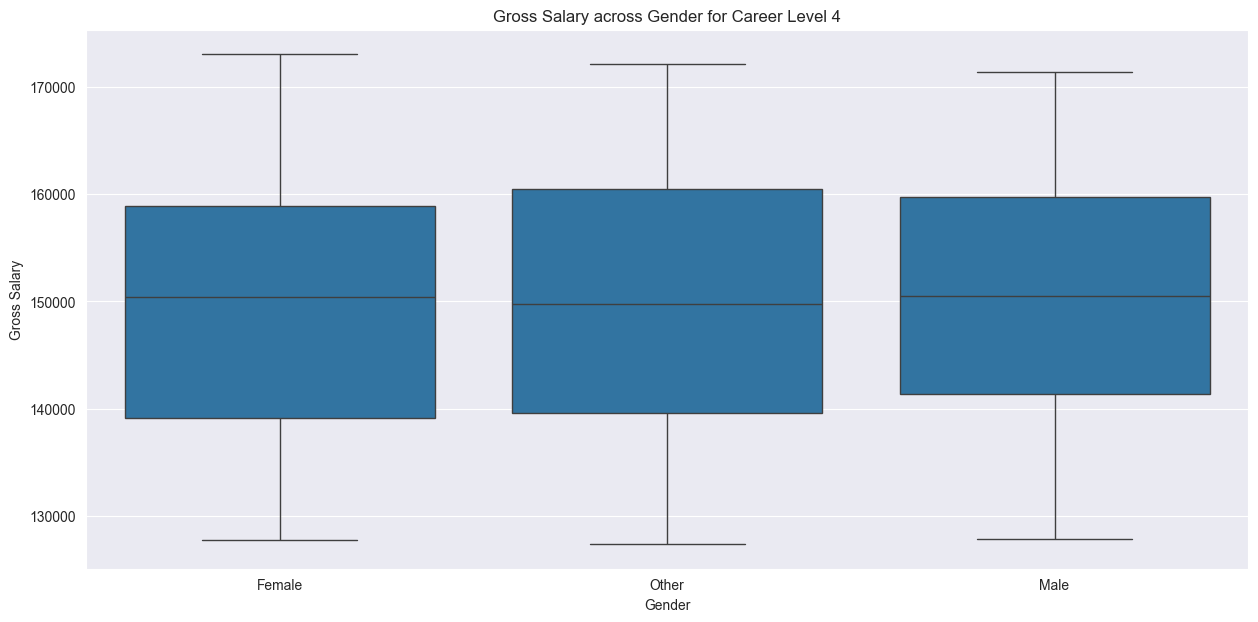

In [218]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_4_df, x=level_4_df['Gender'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary across Gender for Career Level 4')
plt.show()


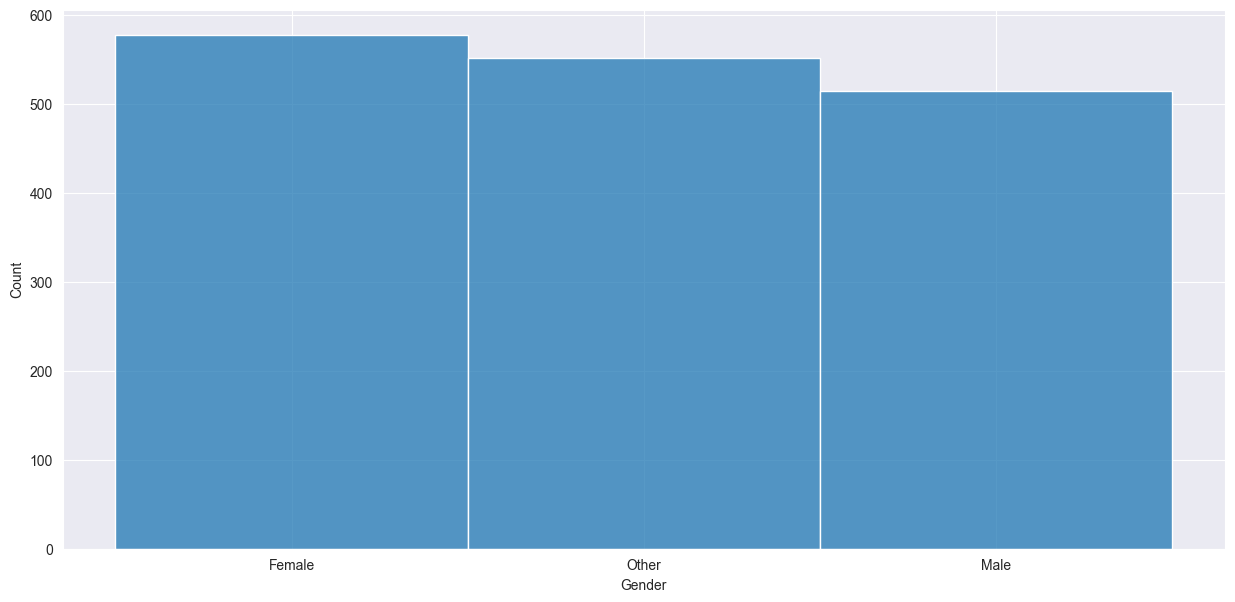

In [219]:
plt.figure(figsize=(15, 7))
sns.histplot(level_4_df, x=level_4_df['Gender'])
plt.show()


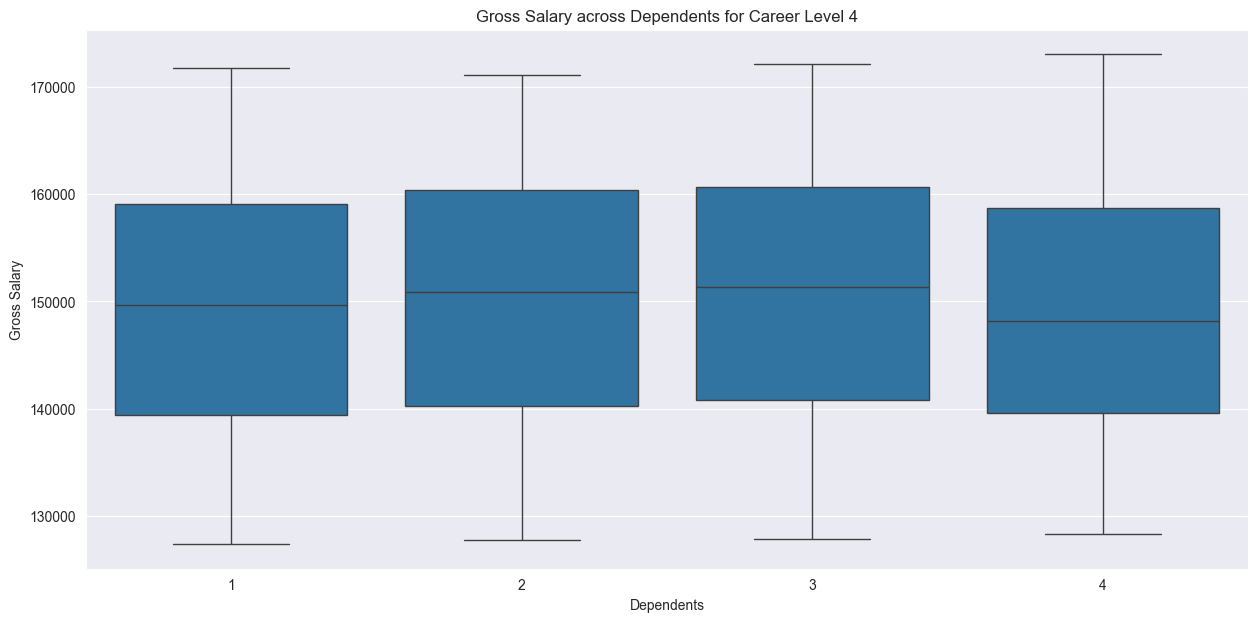

In [220]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_4_df, x=level_4_df['Dependents'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary across Dependents for Career Level 4')
plt.show()


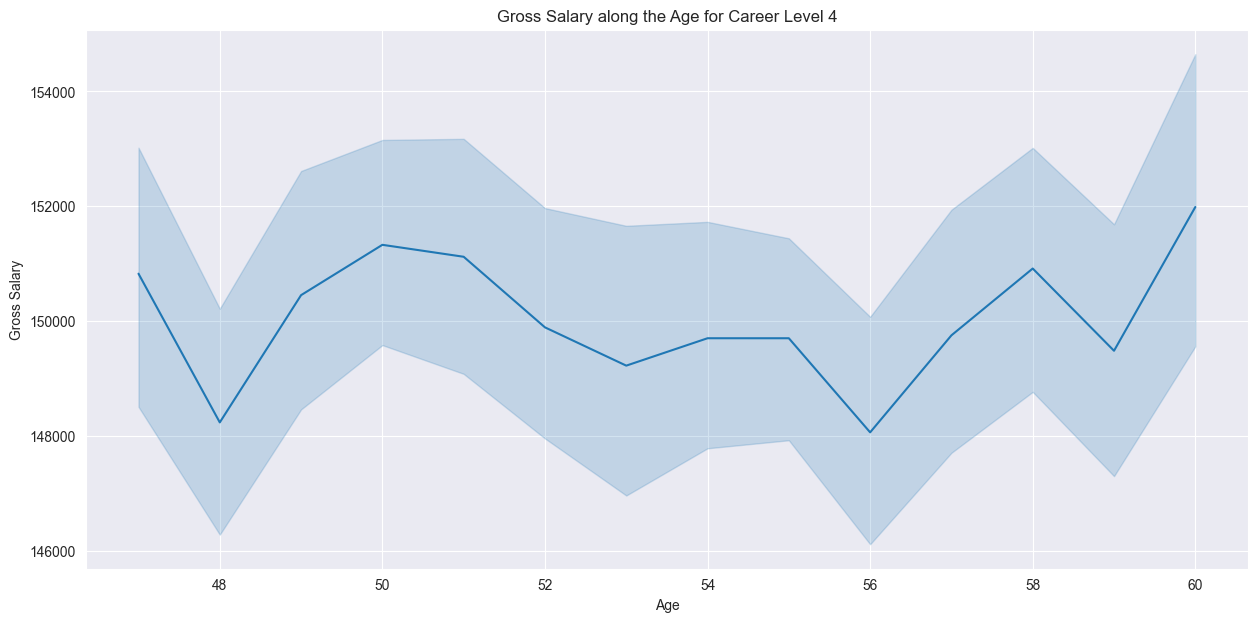

In [221]:
plt.figure(figsize=(15, 7))
sns.lineplot(level_4_df, x=level_4_df['Age'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary along the Age for Career Level 4')
plt.show()


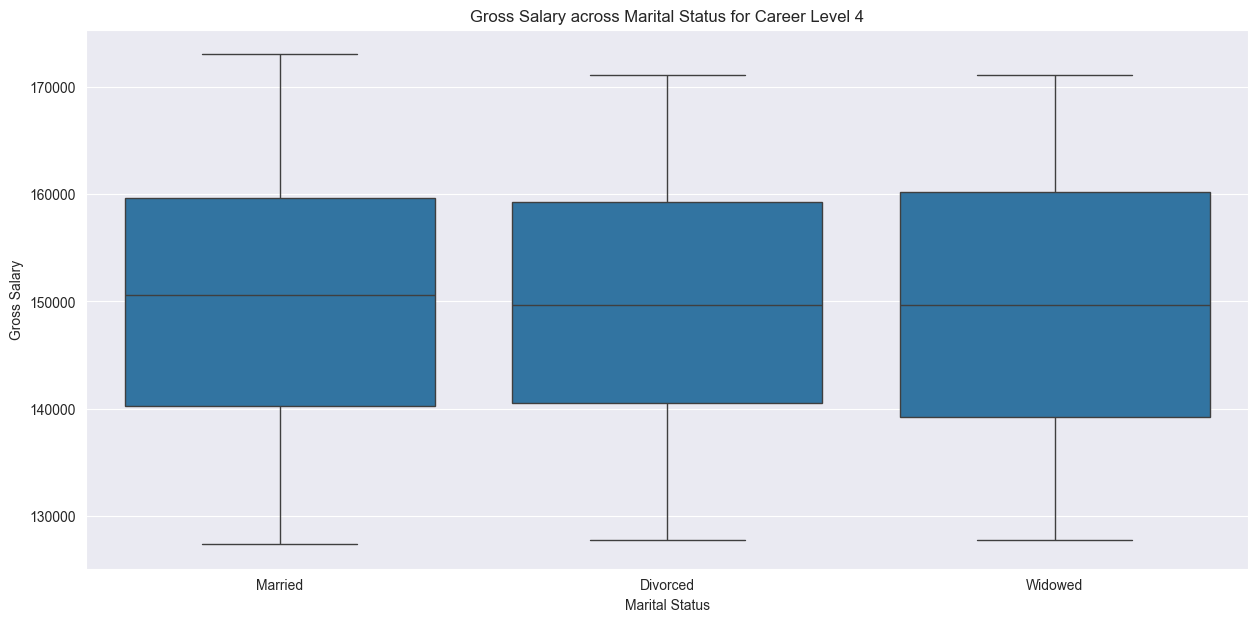

In [222]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_4_df, x=level_4_df['Marital Status'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary across Marital Status for Career Level 4')
plt.show()


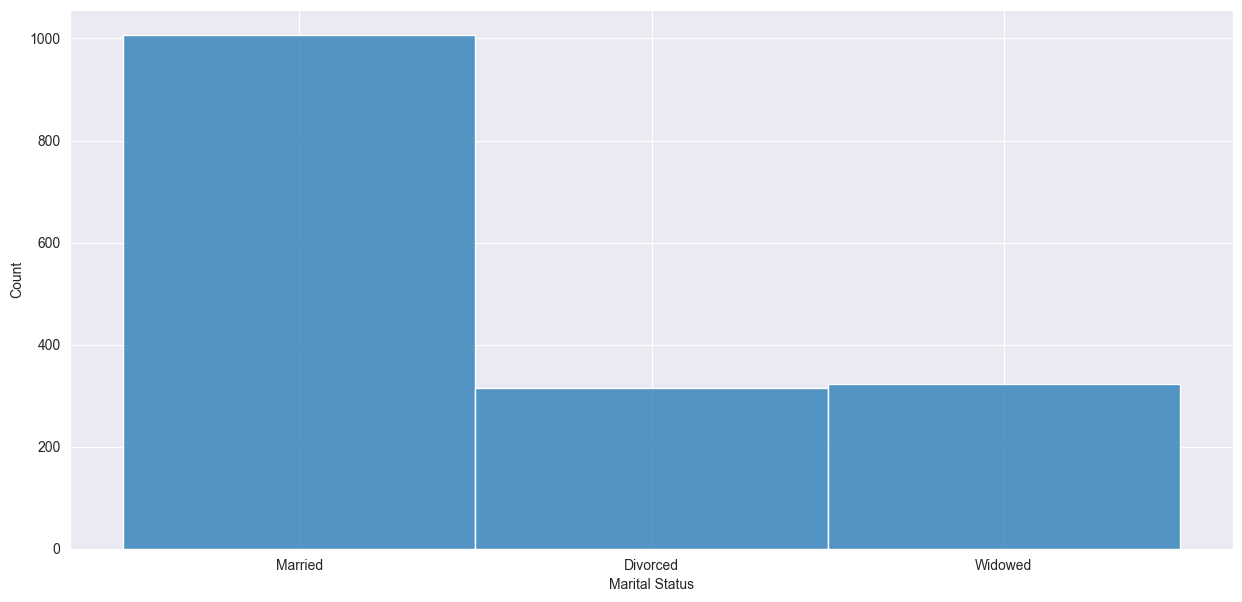

In [223]:
plt.figure(figsize=(15, 7))
sns.histplot(level_4_df, x=level_4_df['Marital Status'])
plt.show()


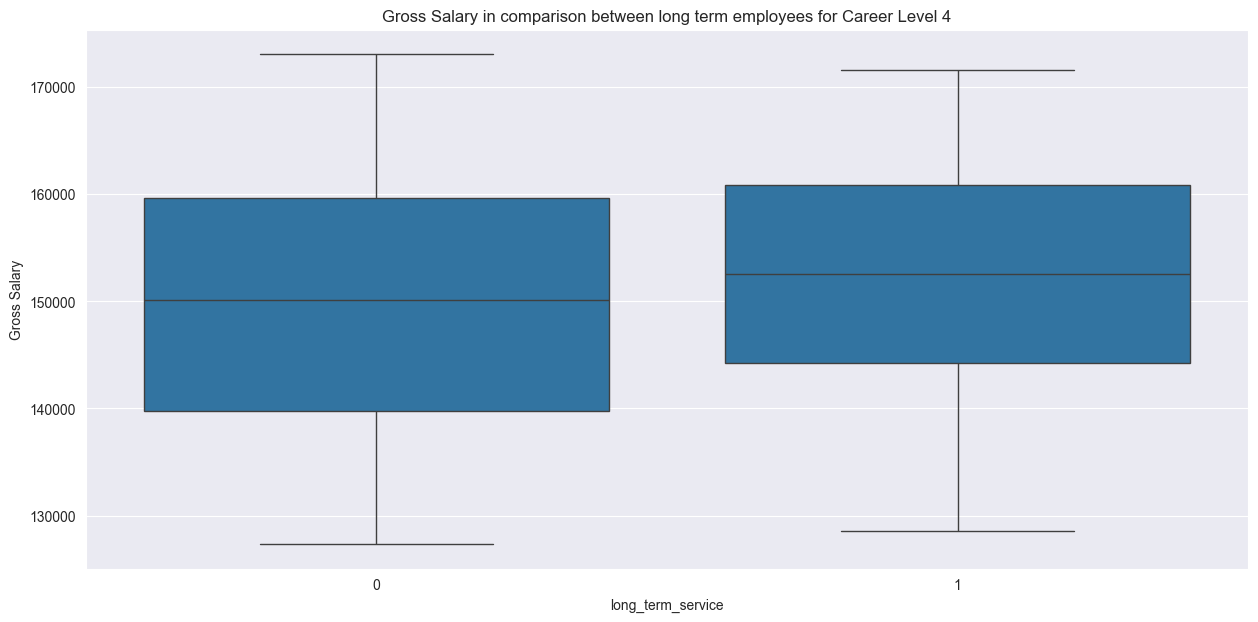

In [224]:
plt.figure(figsize=(15, 7))
sns.boxplot(level_4_df, x=level_4_df['long_term_service'], y=level_4_df['Gross Salary'])
plt.title('Gross Salary in comparison between long term employees for Career Level 4')
plt.show()


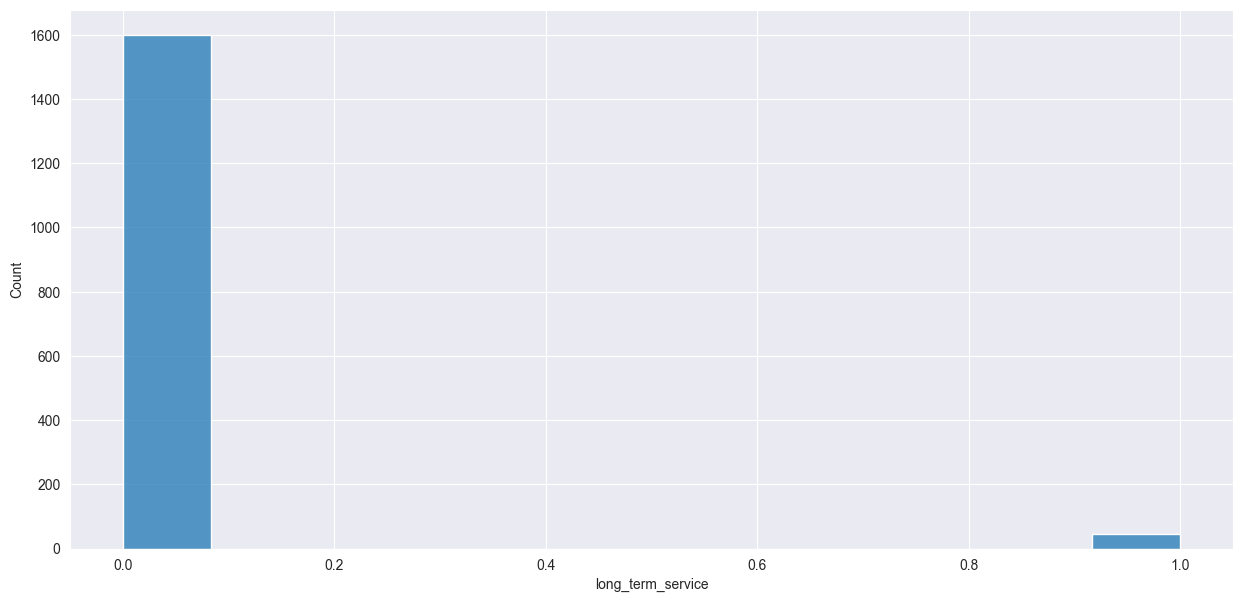

In [225]:
plt.figure(figsize=(15, 7))
sns.histplot(level_4_df, x=level_4_df['long_term_service'])
plt.show()

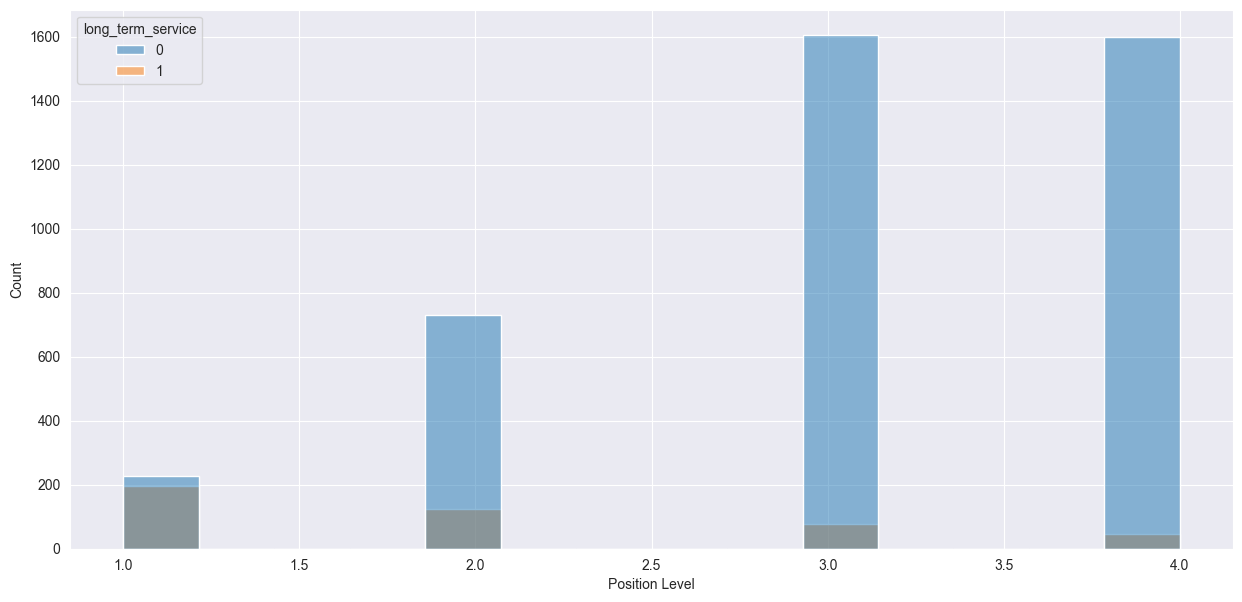

In [226]:
plt.figure(figsize=(15, 7))
sns.histplot(employee_df, x=employee_df['Position Level'], hue=employee_df['long_term_service'])
plt.show()


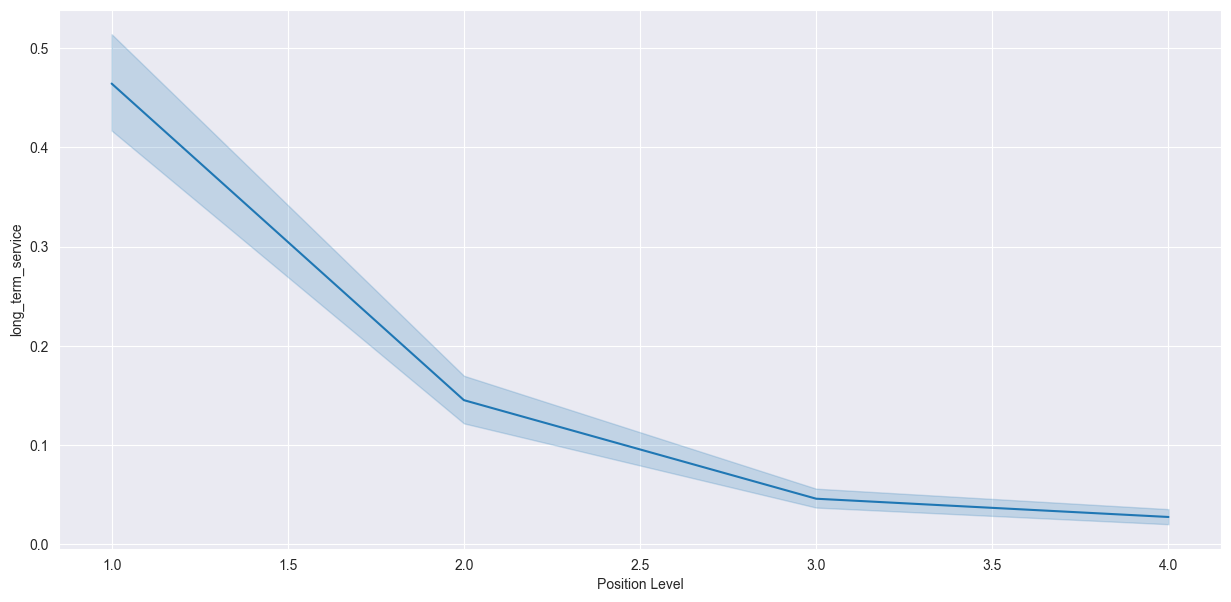

In [227]:
plt.figure(figsize=(15, 7))
sns.lineplot(employee_df, x=employee_df['Position Level'], y=employee_df['long_term_service'])
plt.show()

In [228]:
# widowed employees seem to earn less than the others ones 
# 1: define the two groups 
widowed_group = level_3_df[level_3_df['Marital Status'] == 'Widowed']['Gross Salary']
not_widowed_group = level_3_df[level_3_df['Marital Status'] != 'Widowed']['Gross Salary']
# 2: Perform one-tailed t-test
t_stat, p_value = stats.ttest_ind(widowed_group, not_widowed_group, alternative='less', equal_var=False)
# 3. Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")


T-statistic: -0.8972326057217288, P-Value: 0.18891357295262456


### Insurance analysis

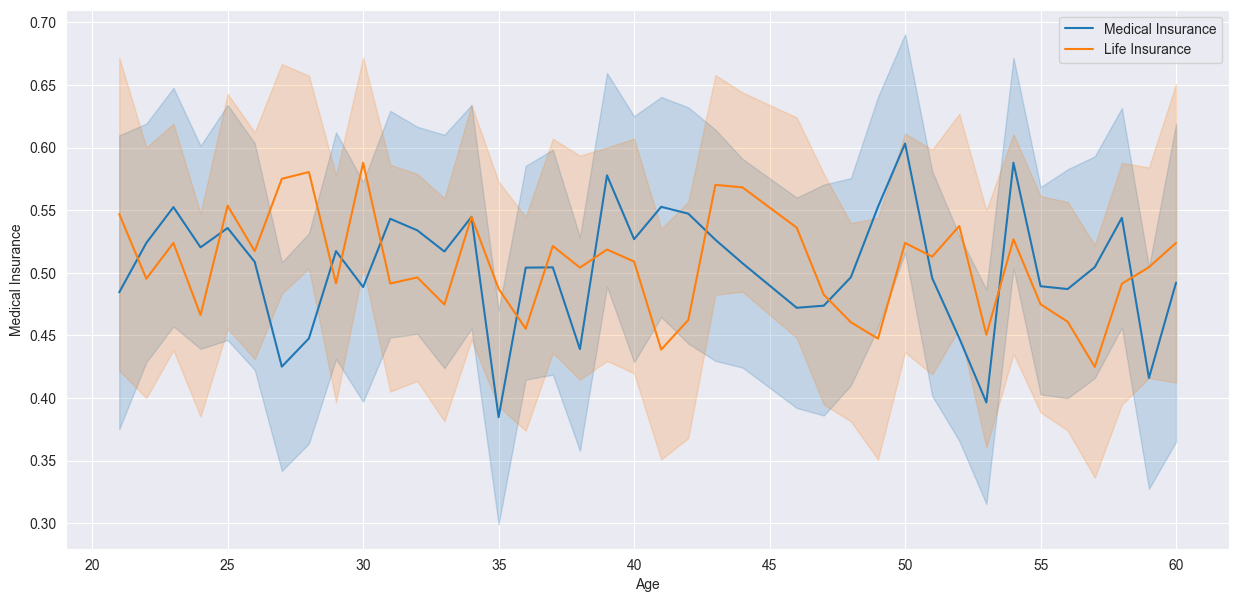

In [229]:
plt.figure(figsize=(15,7))

# line plot for medical insurance
sns.lineplot(employee_df, x=employee_df['Age'], y=employee_df['Medical Insurance'], label='Medical Insurance')

# line plot for life insurance
sns.lineplot(employee_df, x=employee_df['Age'], y=employee_df['Life Insurance'], label='Life Insurance')

plt.show()

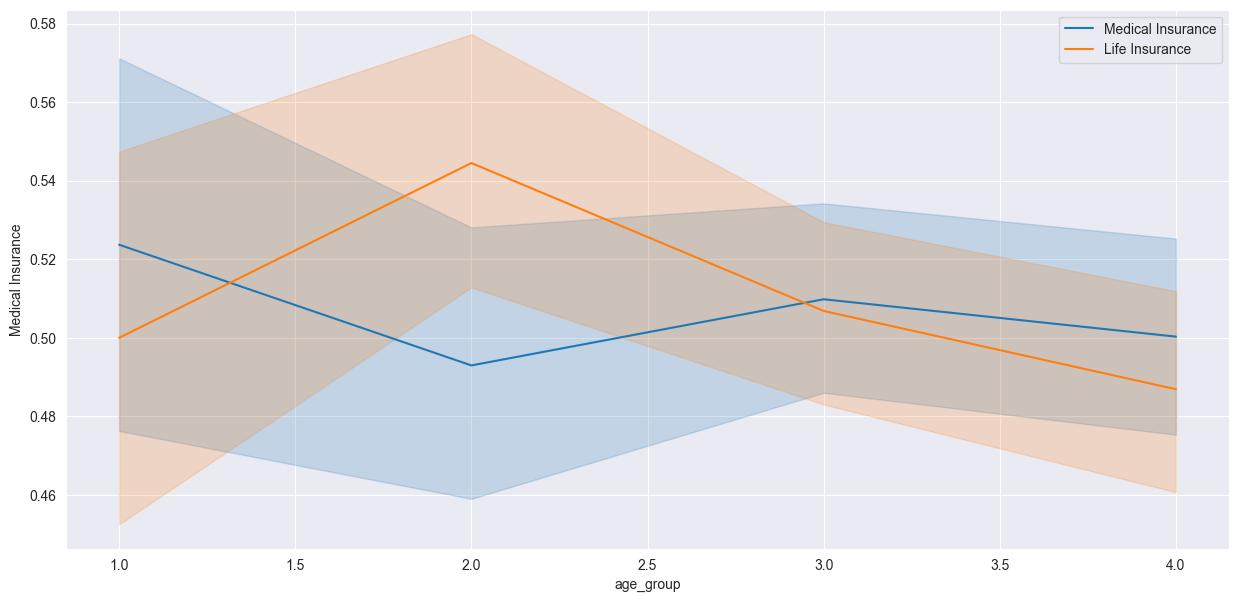

In [230]:
plt.figure(figsize=(15,7))

# line plot for medical insurance
sns.lineplot(employee_df, x=employee_df['age_group'], y=employee_df['Medical Insurance'], label='Medical Insurance')

# line plot for life insurance
sns.lineplot(employee_df, x=employee_df['age_group'], y=employee_df['Life Insurance'], label='Life Insurance')

plt.show()

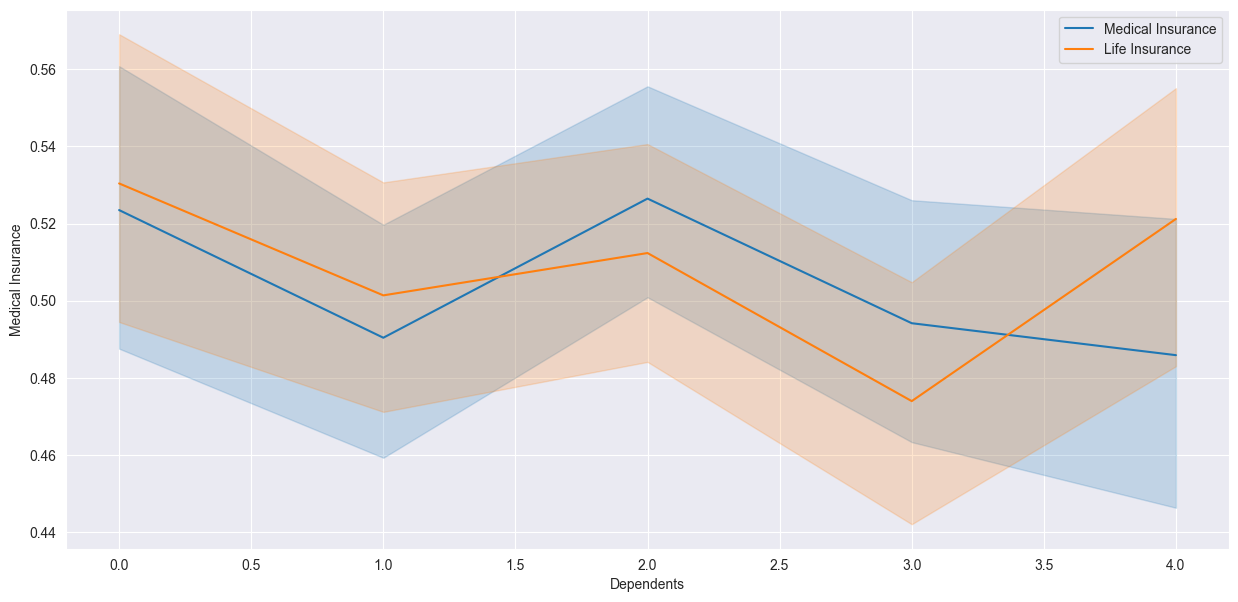

In [231]:
plt.figure(figsize=(15,7))

# line plot for medical insurance
sns.lineplot(employee_df, x=employee_df['Dependents'], y=employee_df['Medical Insurance'], label='Medical Insurance')

# line plot for life insurance
sns.lineplot(employee_df, x=employee_df['Dependents'], y=employee_df['Life Insurance'], label='Life Insurance')

plt.show()

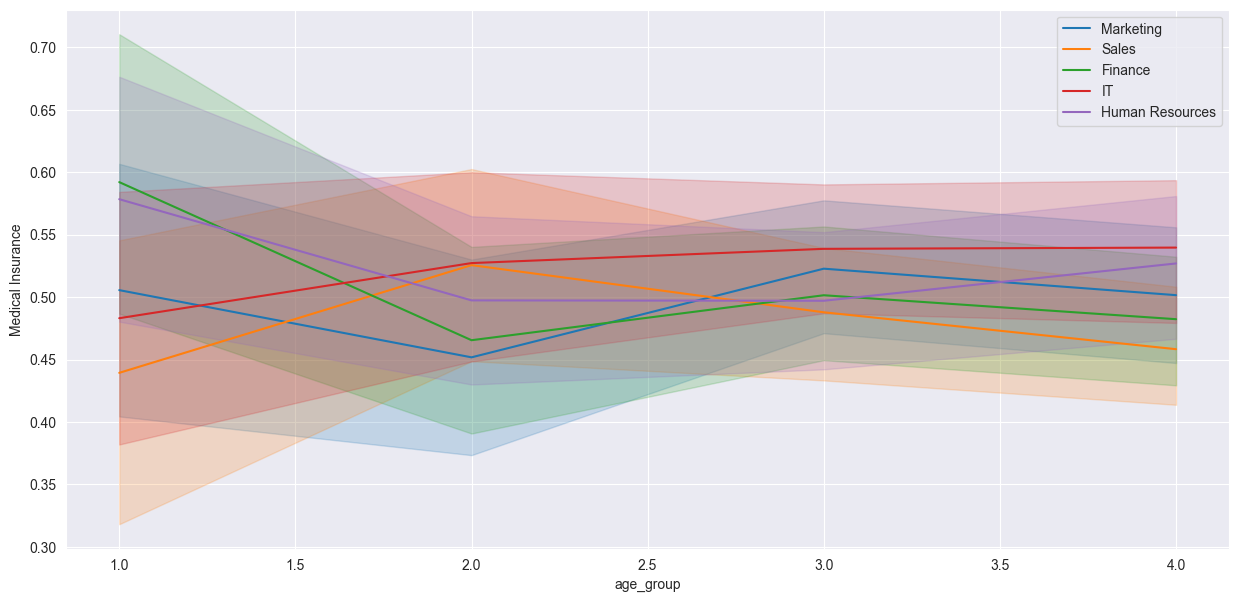

In [232]:
plt.figure(figsize=(15,7))

for dep in list_dep:
    dep_df = employee_df[employee_df['Department'] == dep]
    # line plot for medical insurance
    sns.lineplot(dep_df, x=dep_df['age_group'], y=dep_df['Medical Insurance'], label=dep)
    
    # line plot for life insurance
    # sns.lineplot(dep_df, x=dep_df['age_group'], y=dep_df['Life Insurance'], label='Life Insurance')

plt.show()

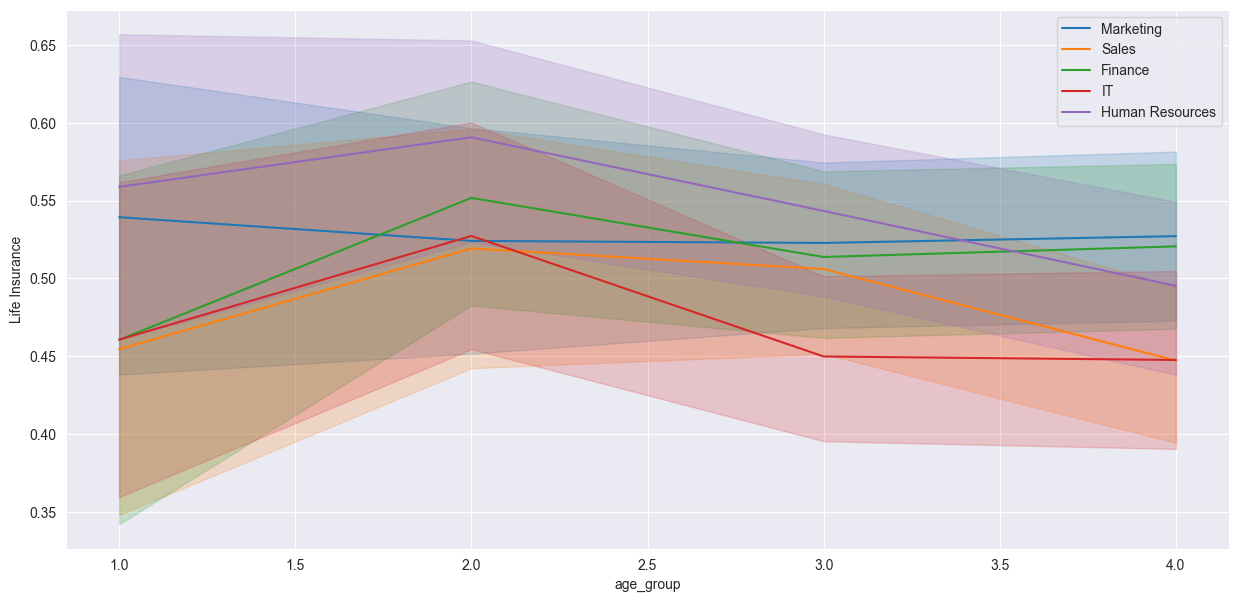

In [233]:
plt.figure(figsize=(15,7))

for dep in list_dep:
    dep_df = employee_df[employee_df['Department'] == dep]
    # line plot for medical insurance
    # sns.lineplot(dep_df, x=dep_df['age_group'], y=dep_df['Medical Insurance'], label=dep)
    
    # line plot for life insurance
    sns.lineplot(dep_df, x=dep_df['age_group'], y=dep_df['Life Insurance'], label=dep)

plt.show()

3


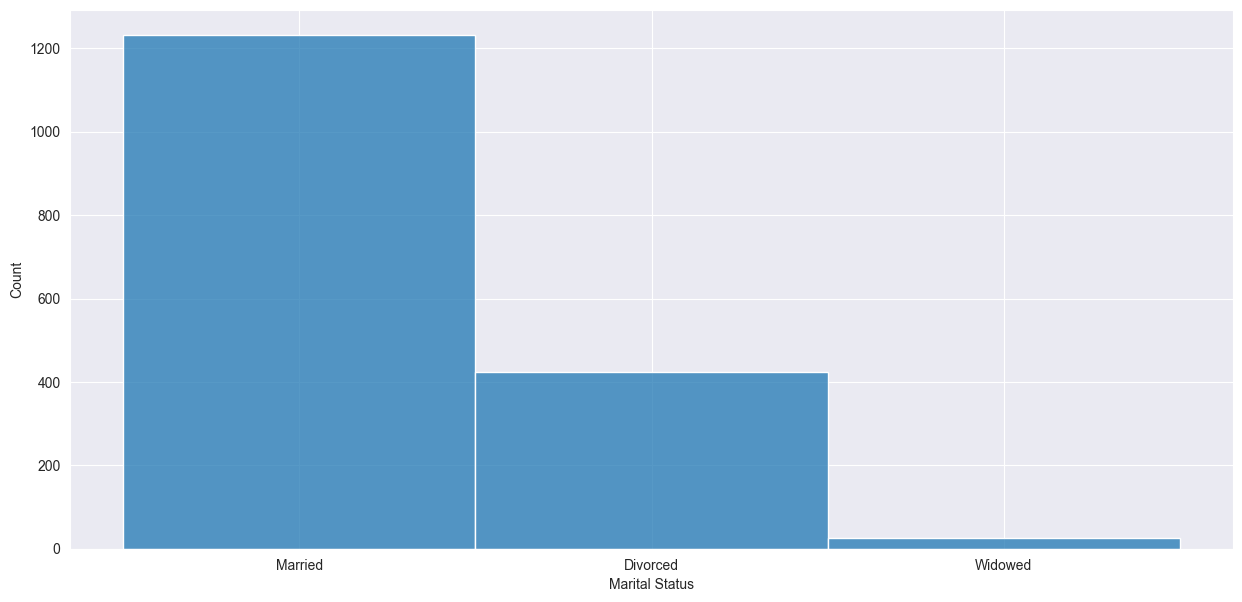

4


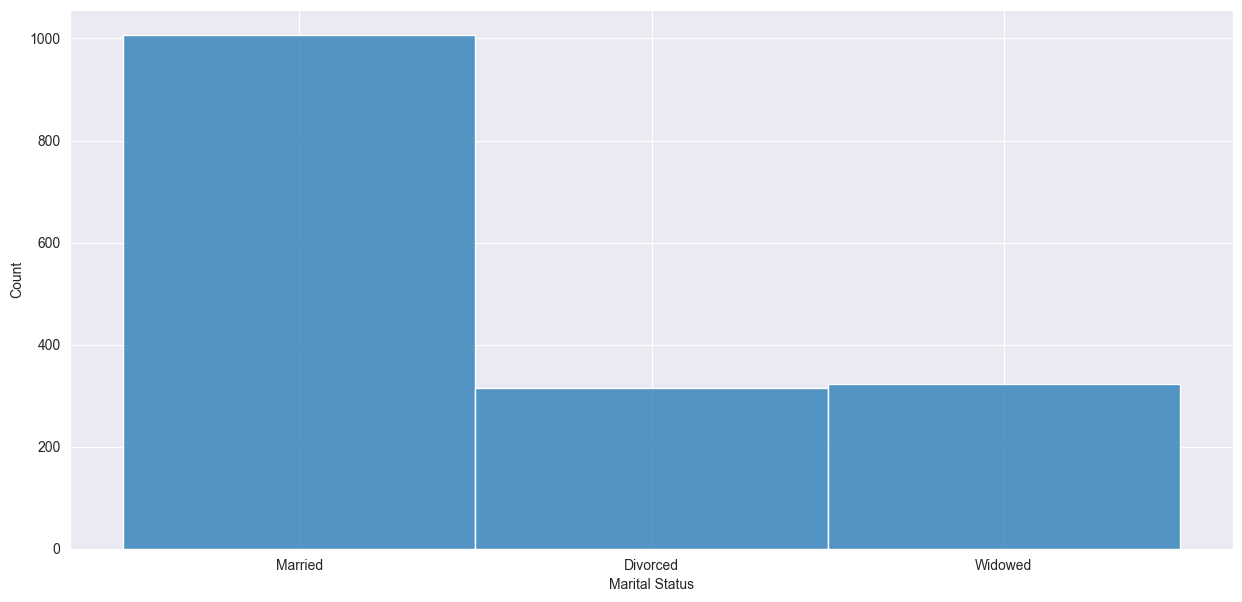

1


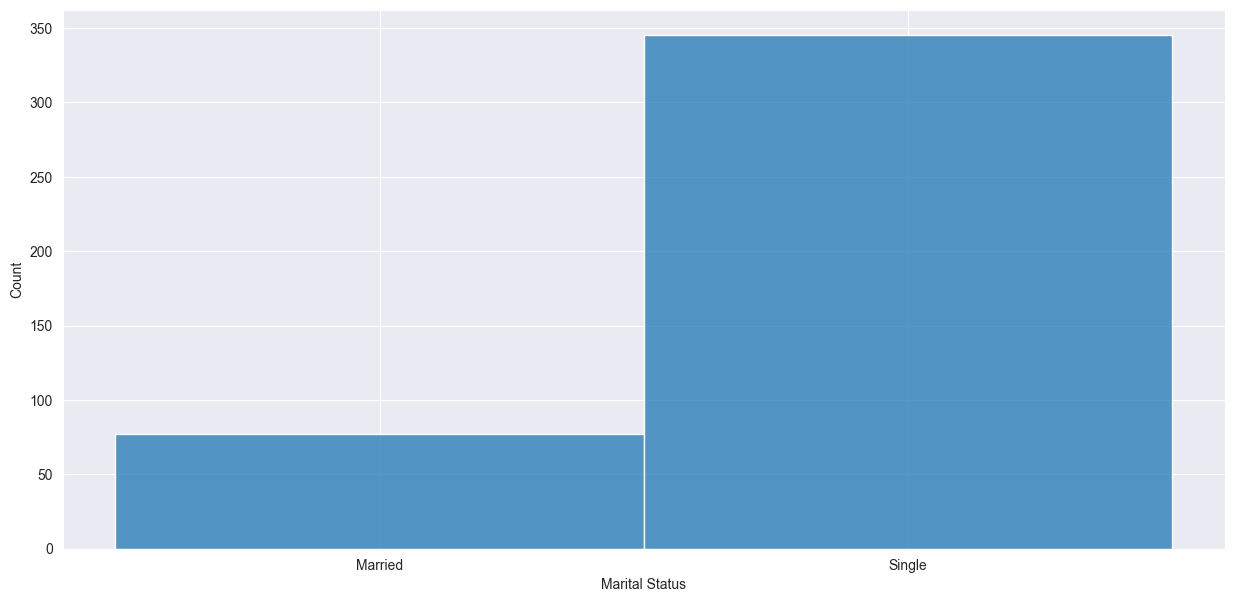

2


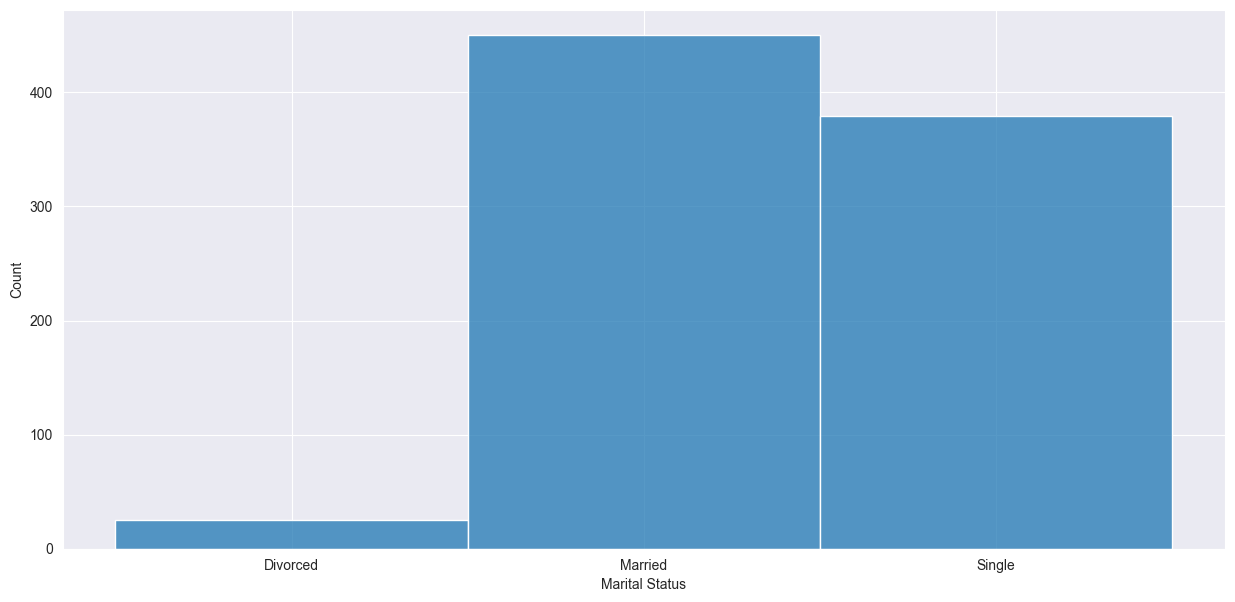

In [234]:
# number of employees by marital status for each position level
pos_level = employee_df['Position Level'].unique()

for pos in pos_level:
    plt.figure(figsize=(15,7))
    pos_df = employee_df[employee_df['Position Level'] == pos]
    # line plot for medical insurance
    sns.histplot(pos_df, x=pos_df['Marital Status'], label=pos)
    
    print(pos)
    plt.show()

Married


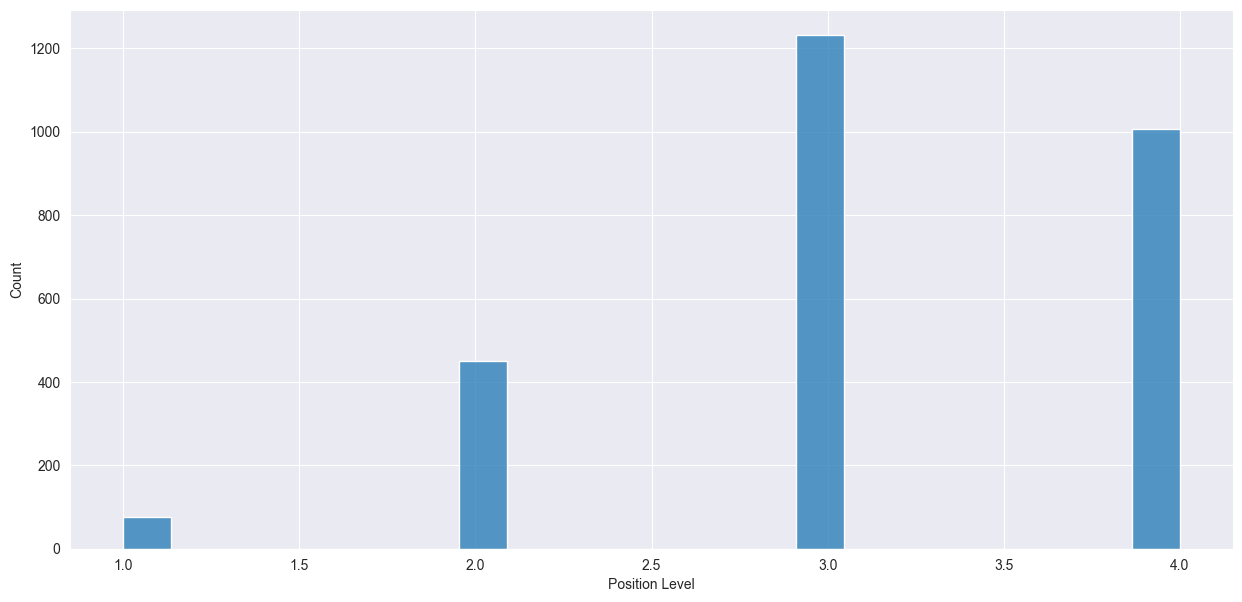

Divorced


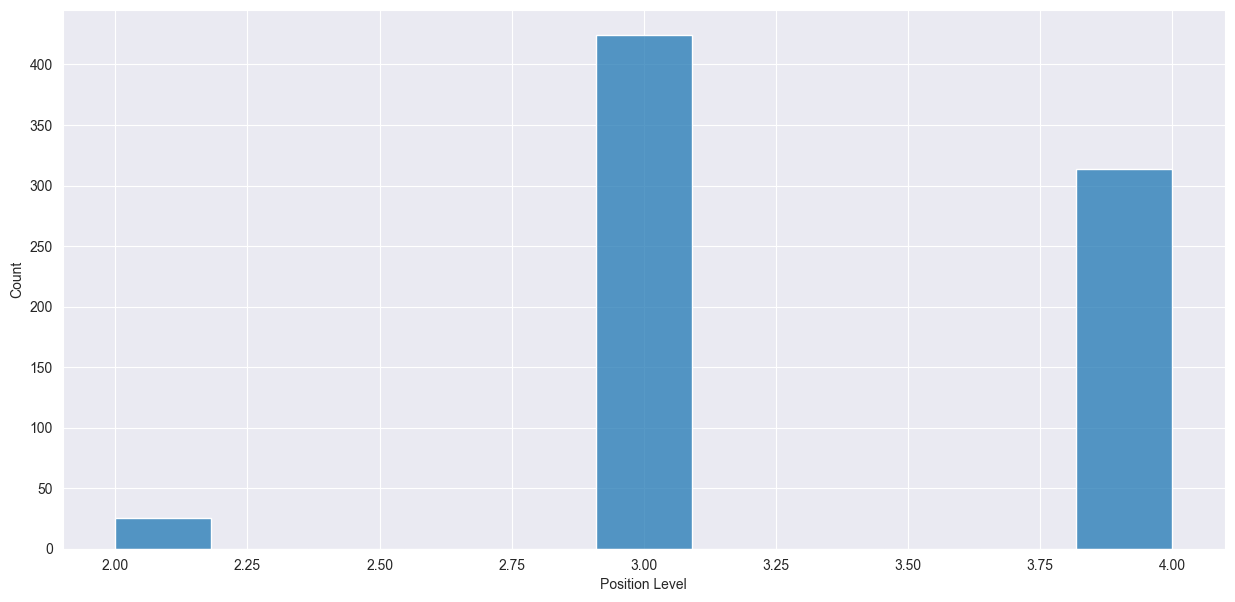

Single


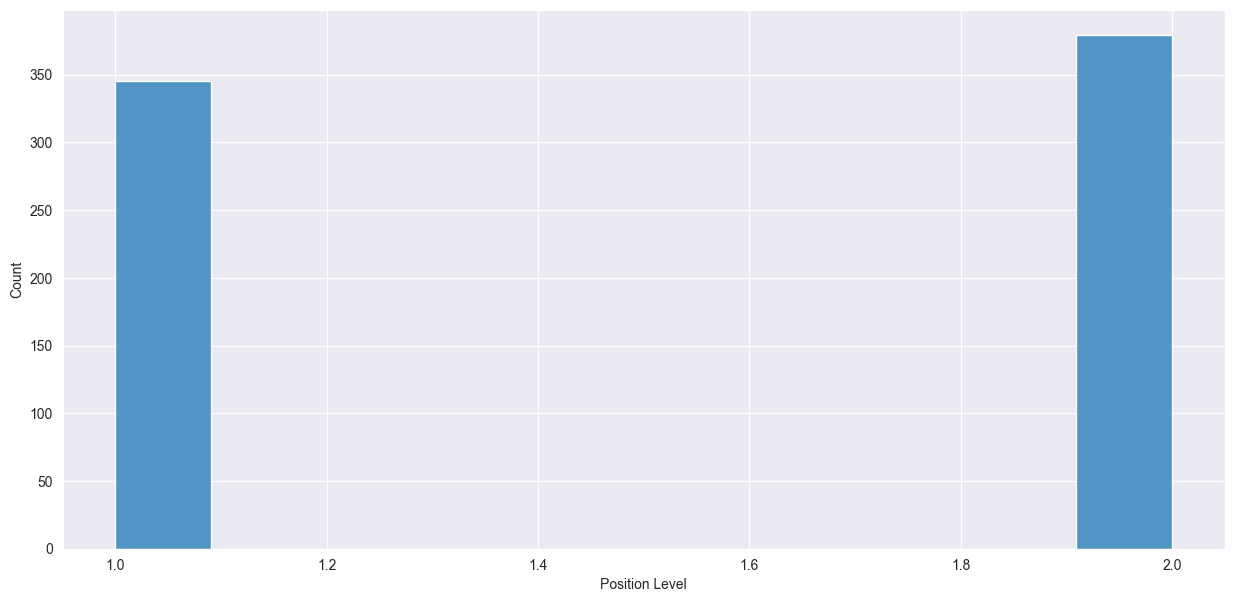

Widowed


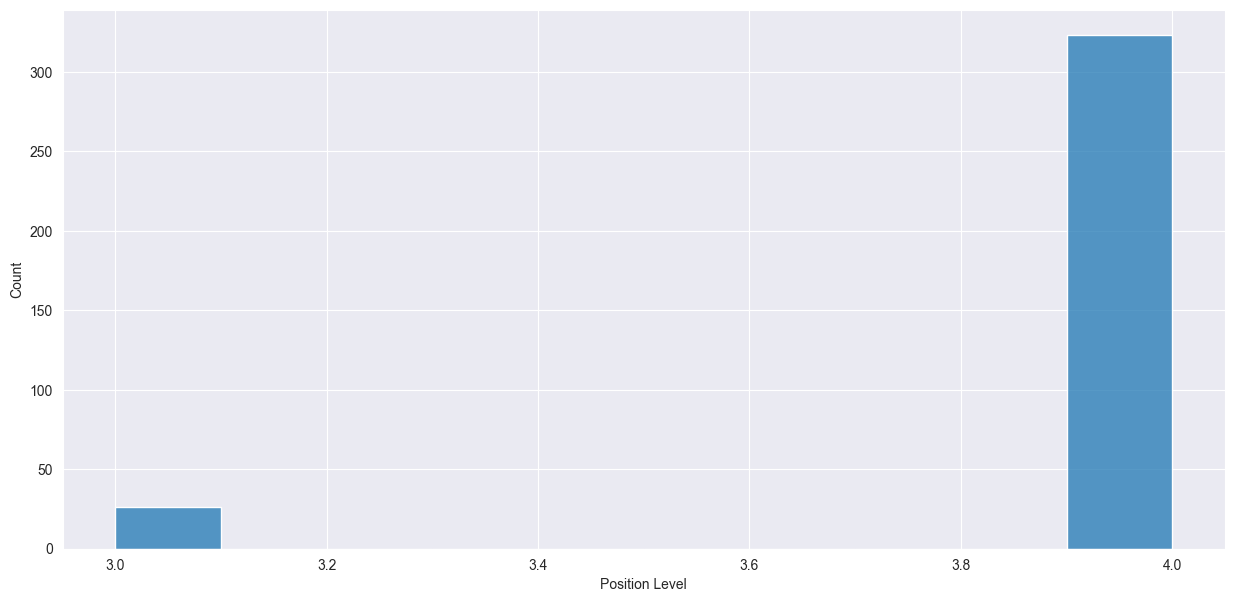

In [235]:
# number of employees by position level for each marital status
mar_stat = employee_df['Marital Status'].unique()

for status in mar_stat:
    plt.figure(figsize=(15,7))
    mar_df = employee_df[employee_df['Marital Status'] == status]

    sns.histplot(mar_df, x=mar_df['Position Level'], label=status)
    
    print(status)
    plt.show()

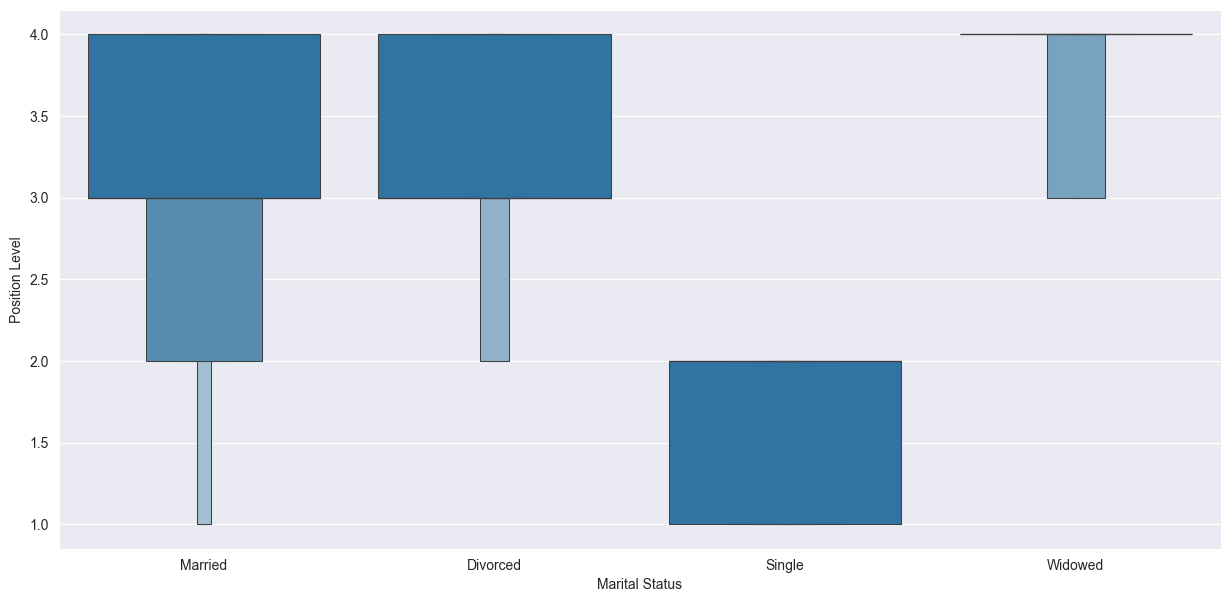

In [236]:
plt.figure(figsize=(15, 7))

sns.boxenplot(employee_df, x=employee_df['Marital Status'], y=employee_df['Position Level'])

plt.show()

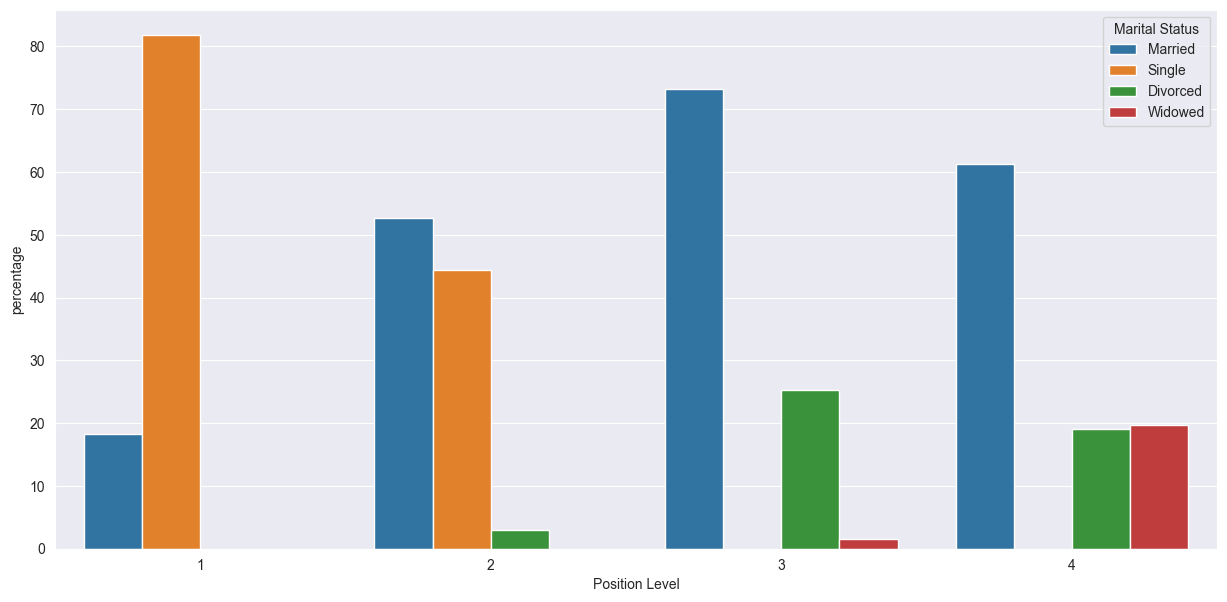

In [237]:
# Step 1: Group by 'Position Level' and 'Marital Status', then count the number of employees in each group
grouped_df = employee_df.groupby(['Position Level', 'Marital Status']).size().reset_index(name='count')

# Step 2: Calculate the total number of employees for each 'Position Level'
total_per_position = employee_df.groupby('Position Level').size().reset_index(name='total')

# Step 3: Merge the total count into the grouped data to calculate percentages
merged_df = pd.merge(grouped_df, total_per_position, on='Position Level')

# Step 4: Calculate percentage of each marital status within each position level
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

plt.figure(figsize=(15,7))
sns.barplot(merged_df, x=merged_df['Position Level'], y=merged_df['percentage'], hue=merged_df['Marital Status'])
plt.show()


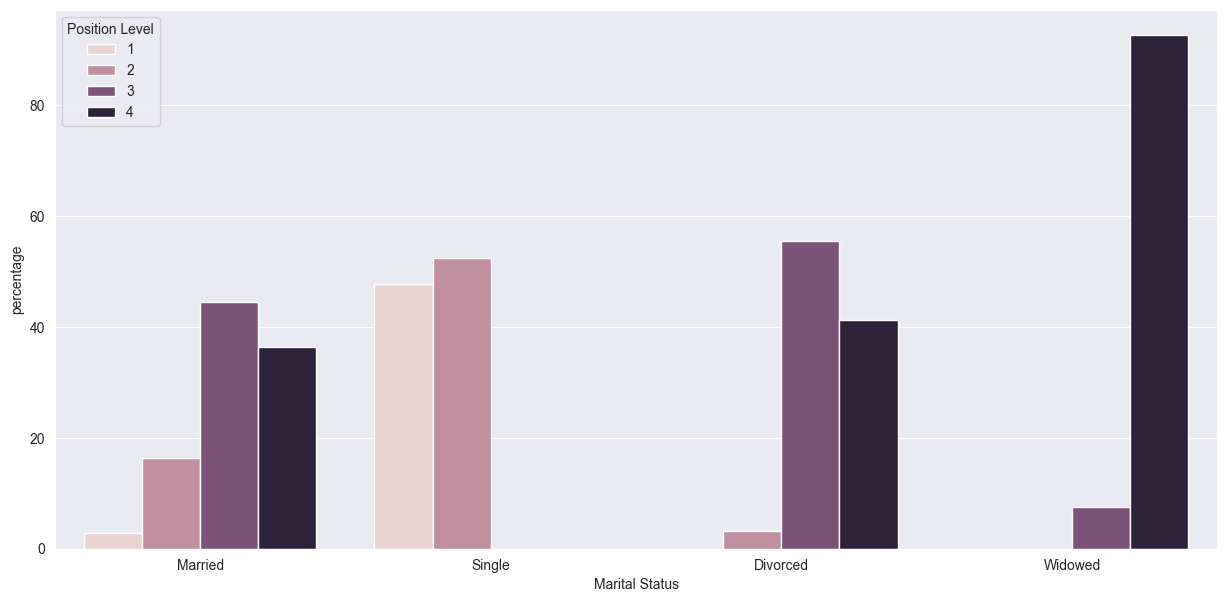

In [238]:
# Step 1: Group by 'Position Level' and 'Marital Status', then count the number of employees in each group
grouped_df = employee_df.groupby(['Position Level', 'Marital Status']).size().reset_index(name='count')

# Step 2: Calculate the total number of employees for each 'Position Level'
total_per_status = employee_df.groupby('Marital Status').size().reset_index(name='total')

# Step 3: Merge the total count into the grouped data to calculate percentages
merged_df = pd.merge(grouped_df, total_per_status, on='Marital Status')

# Step 4: Calculate percentage of each marital status within each position level
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

plt.figure(figsize=(15,7))
sns.barplot(merged_df, x=merged_df['Marital Status'], y=merged_df['percentage'], hue=merged_df['Position Level'])
plt.show()


Marital Status
Divorced    24.377457
Married     25.180897
Single      28.176796
Widowed     28.366762
dtype: float64


<Figure size 1500x700 with 0 Axes>

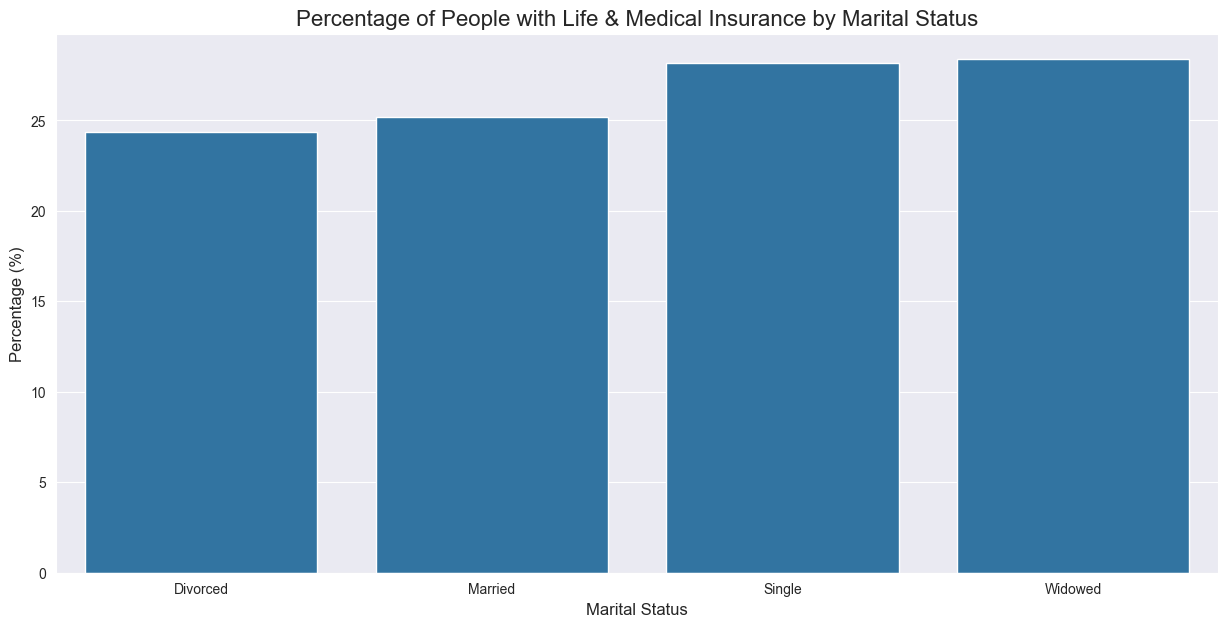

In [239]:
plt.figure(figsize=(15, 7))

ins_df = employee_df[(employee_df['Insurance'] == 'Both')]

# Group by 'Marital Status' and calculate the percentage
grouped = ins_df.groupby('Marital Status').size() / employee_df.groupby('Marital Status').size() * 100
print(grouped)
# Reset index to convert the group result into a DataFrame
percentage_df = grouped.reset_index(name='Percentage')

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Marital Status', y='Percentage', data=percentage_df)

# Add title and labels
plt.title('Percentage of People with Life & Medical Insurance by Marital Status', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

# Show the plot
plt.show()


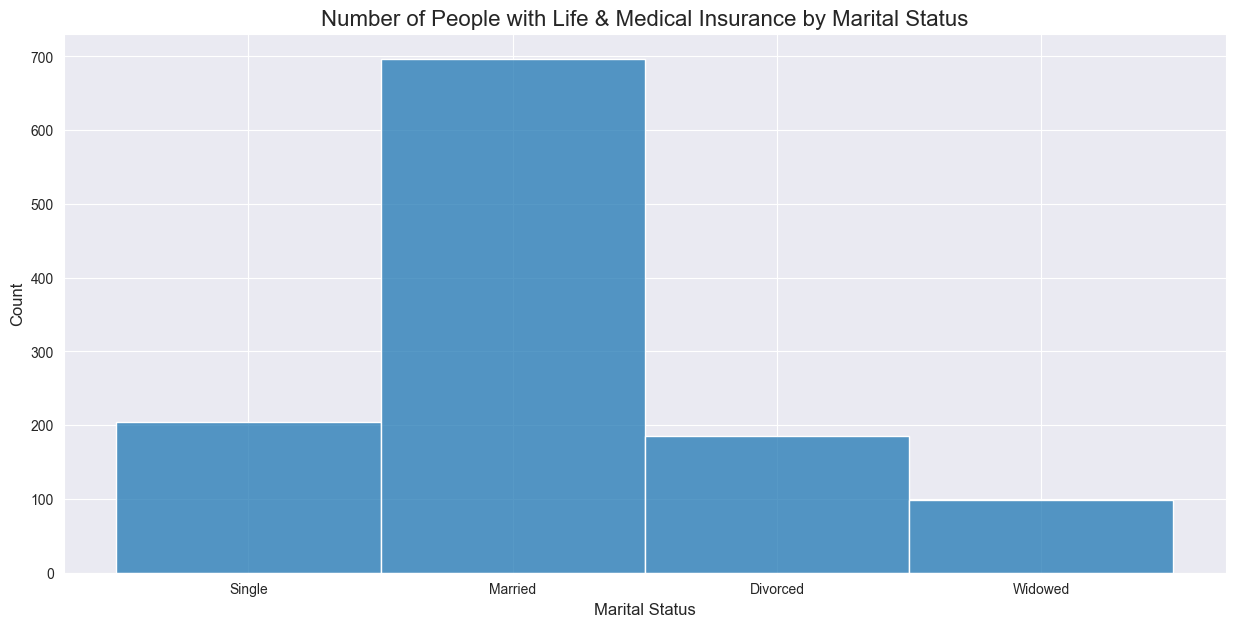

In [240]:
plt.figure(figsize=(15, 7))

sns.histplot(ins_df, x=ins_df['Marital Status'])

plt.title('Number of People with Life & Medical Insurance by Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

plt.show()


Marital Status
Divorced    26.212320
Married     24.891462
Single      24.861878
Widowed     21.489971
dtype: float64


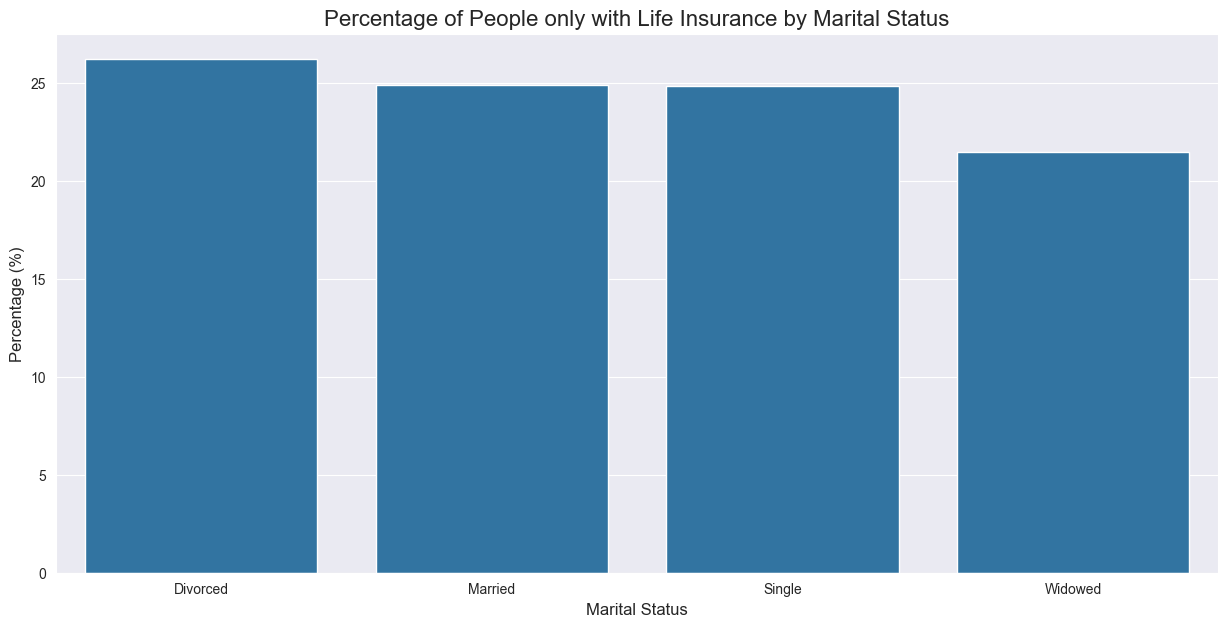

In [241]:
ins_df = employee_df[(employee_df['Insurance'] == 'Life')]

# Group by 'Marital Status' and calculate the percentage
grouped = ins_df.groupby('Marital Status').size() / employee_df.groupby('Marital Status').size() * 100
print(grouped)
# Reset index to convert the group result into a DataFrame
percentage_df = grouped.reset_index(name='Percentage')

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Marital Status', y='Percentage', data=percentage_df)

# Add title and labels
plt.title('Percentage of People only with Life Insurance by Marital Status', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

# Show the plot
plt.show()


Marital Status
Divorced    23.984273
Married     25.434153
Single      24.171271
Widowed     21.489971
dtype: float64


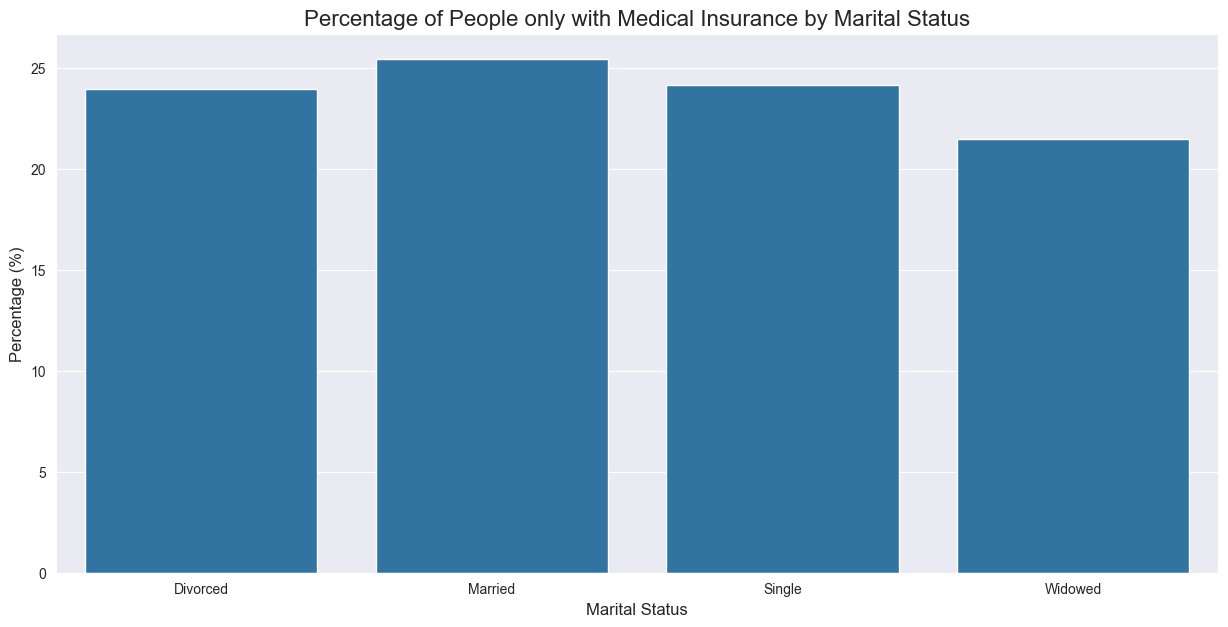

In [242]:
ins_df = employee_df[(employee_df['Insurance'] == 'Medical')]

# Group by 'Marital Status' and calculate the percentage
grouped = ins_df.groupby('Marital Status').size() / employee_df.groupby('Marital Status').size() * 100
print(grouped)
# Reset index to convert the group result into a DataFrame
percentage_df = grouped.reset_index(name='Percentage')

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Marital Status', y='Percentage', data=percentage_df)

# Add title and labels
plt.title('Percentage of People only with Medical Insurance by Marital Status', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

# Show the plot
plt.show()


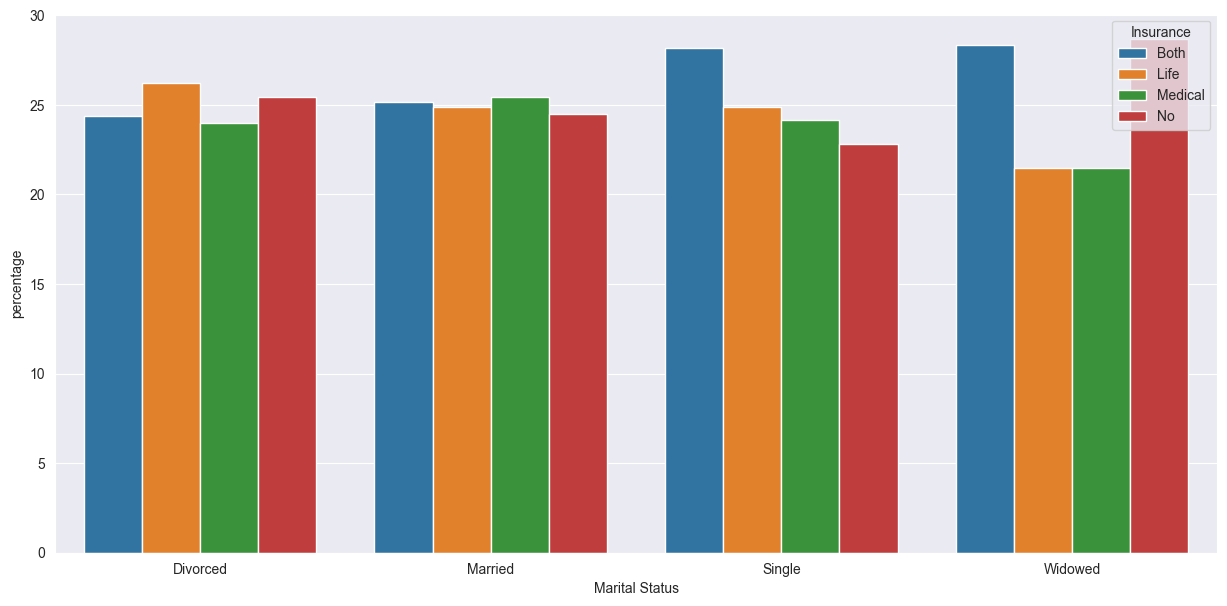

In [243]:
# Step 1: Group by 'Position Level' and 'Marital Status', then count the number of employees in each group
grouped_df = employee_df.groupby(['Insurance', 'Marital Status']).size().reset_index(name='count')

# Step 2: Calculate the total number of employees for each 'Position Level'
total_per_status = employee_df.groupby('Marital Status').size().reset_index(name='total')

# Step 3: Merge the total count into the grouped data to calculate percentages
merged_df = pd.merge(grouped_df, total_per_status, on='Marital Status')

# Step 4: Calculate percentage of each marital status within each position level
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

plt.figure(figsize=(15,7))
sns.barplot(merged_df, x=merged_df['Marital Status'], y=merged_df['percentage'], hue=merged_df['Insurance'])
plt.show()


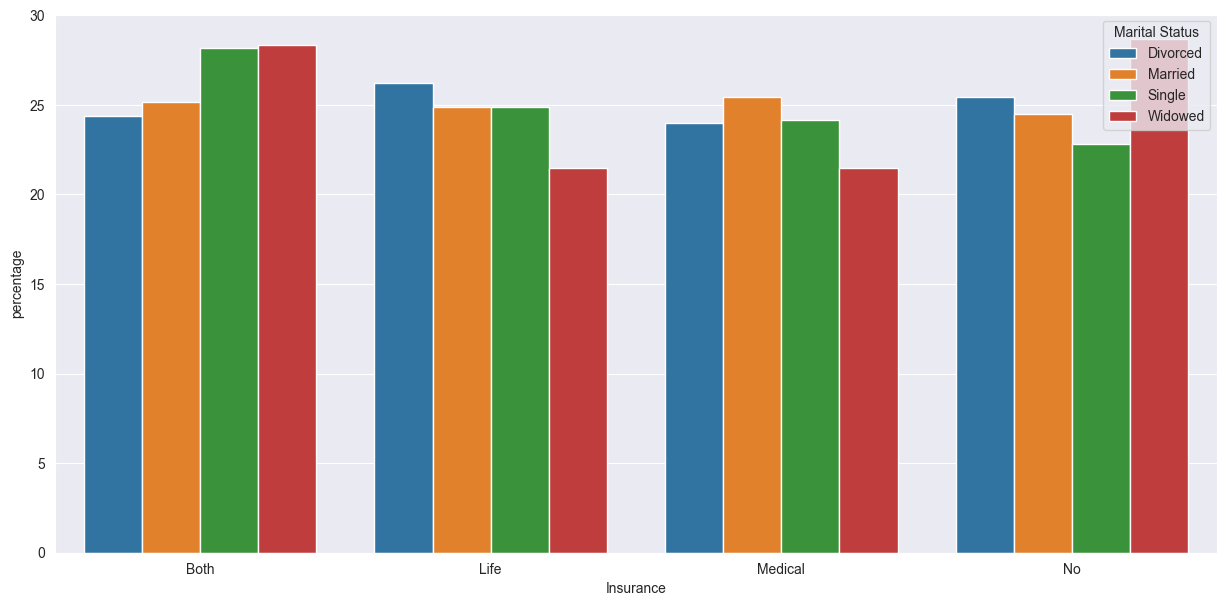

In [244]:
# Step 1: Group by 'Position Level' and 'Marital Status', then count the number of employees in each group
grouped_df = employee_df.groupby(['Insurance', 'Marital Status']).size().reset_index(name='count')

# Step 2: Calculate the total number of employees for each 'Position Level'
total_per_status = employee_df.groupby('Marital Status').size().reset_index(name='total')

# Step 3: Merge the total count into the grouped data to calculate percentages
merged_df = pd.merge(grouped_df, total_per_status, on='Marital Status')

# Step 4: Calculate percentage of each marital status within each position level
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

plt.figure(figsize=(15,7))
sns.barplot(merged_df, x=merged_df['Insurance'], y=merged_df['percentage'], hue=merged_df['Marital Status'])
plt.show()


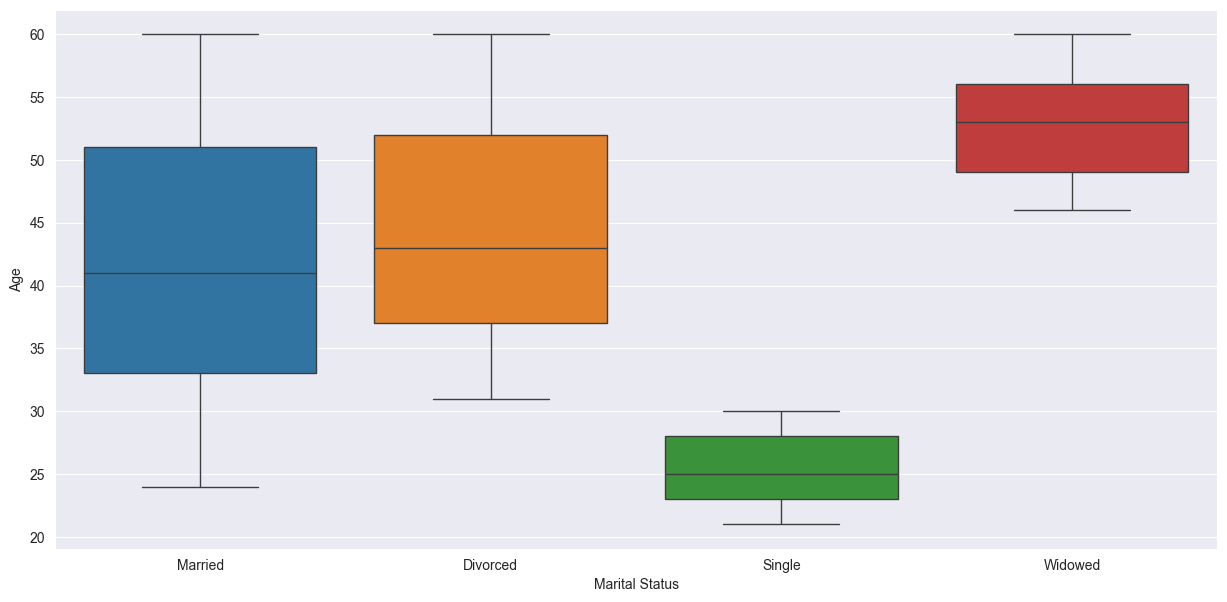

In [245]:
plt.figure(figsize=(15, 7))
sns.boxplot(employee_df, x=employee_df['Marital Status'], y=employee_df['Age'], hue=employee_df['Marital Status'])
plt.show()

Marital Status
Divorced    25.425950
Married     24.493488
Single      22.790055
Widowed     28.653295
dtype: float64


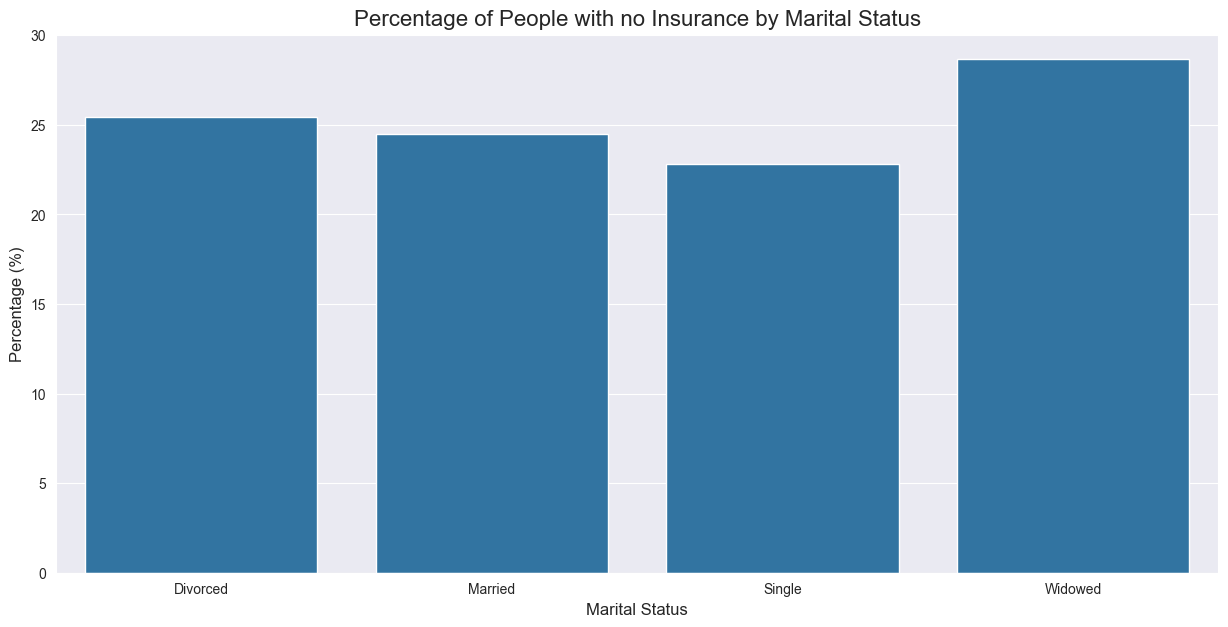

In [246]:
ins_df = employee_df[(employee_df['Life Insurance'] == 0) & (employee_df['Medical Insurance'] == 0)]

# Group by 'Marital Status' and calculate the percentage
grouped = ins_df.groupby('Marital Status').size() / employee_df.groupby('Marital Status').size() * 100
print(grouped)
# Reset index to convert the group result into a DataFrame
percentage_df = grouped.reset_index(name='Percentage')

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Marital Status', y='Percentage', data=percentage_df)

# Add title and labels
plt.title('Percentage of People with no Insurance by Marital Status', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

# Show the plot
plt.show()


In [247]:
ins_df = employee_df

# Step 1: Create a new column to classify people as 'widowed' or 'not_widowed'
ins_df['insurance_status'] = (ins_df['Life Insurance'] == 0) & (ins_df['Medical Insurance'] == 0)
ins_df['insurance_status'] = ins_df['insurance_status'].apply(lambda x: 0 if x == False else 1)

ins_df['widow_status'] = ins_df['Marital Status'].apply(lambda x: 'widowed' if x == 'Widowed' else 'not_widowed')

# Step 2: Split the data into widowed and not_widowed groups
widowed_group = ins_df[ins_df['widow_status'] == 'widowed']['insurance_status']
not_widowed_group = ins_df[ins_df['widow_status'] == 'not_widowed']['insurance_status']

# Step 3: Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(widowed_group, not_widowed_group, alternative='greater', equal_var=False)

# Step 4: Print out results
print(f"T-statistic: {t_stat}, P-Value: {p_value}")

T-statistic: 1.7051086784578275, P-Value: 0.04447421920128462


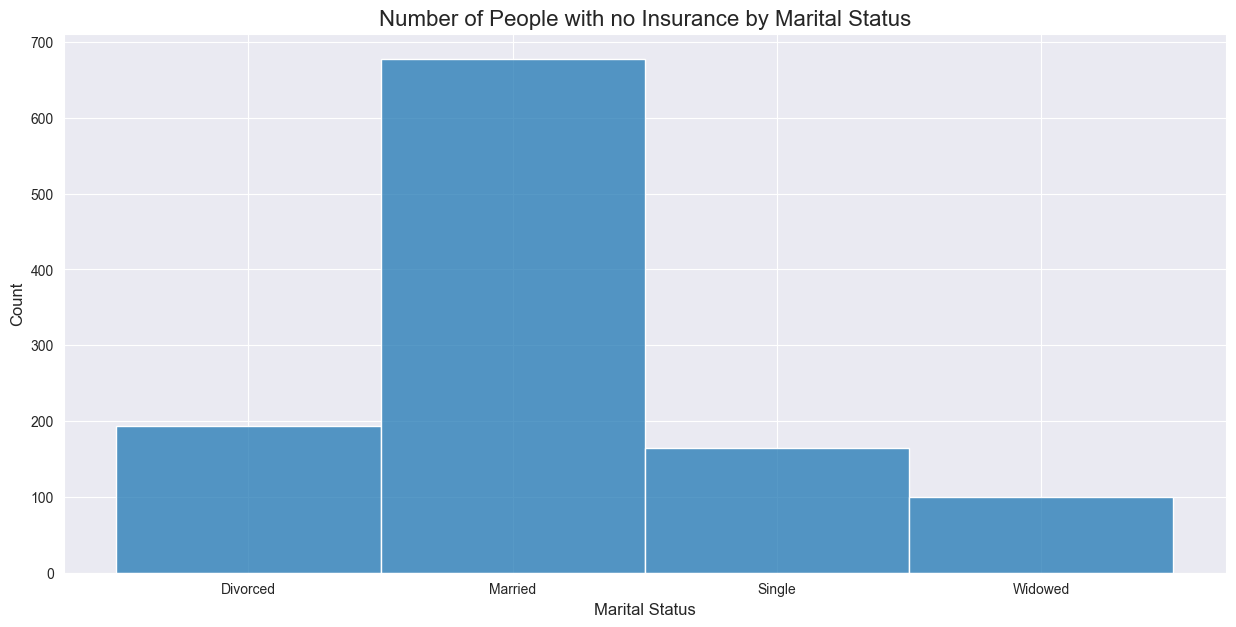

In [248]:
plt.figure(figsize=(15, 7))
ins_df = employee_df[(employee_df['Life Insurance'] == 0) & (employee_df['Medical Insurance'] == 0)]
sns.histplot(ins_df, x=ins_df['Marital Status'])

plt.title('Number of People with no Insurance by Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

plt.show()


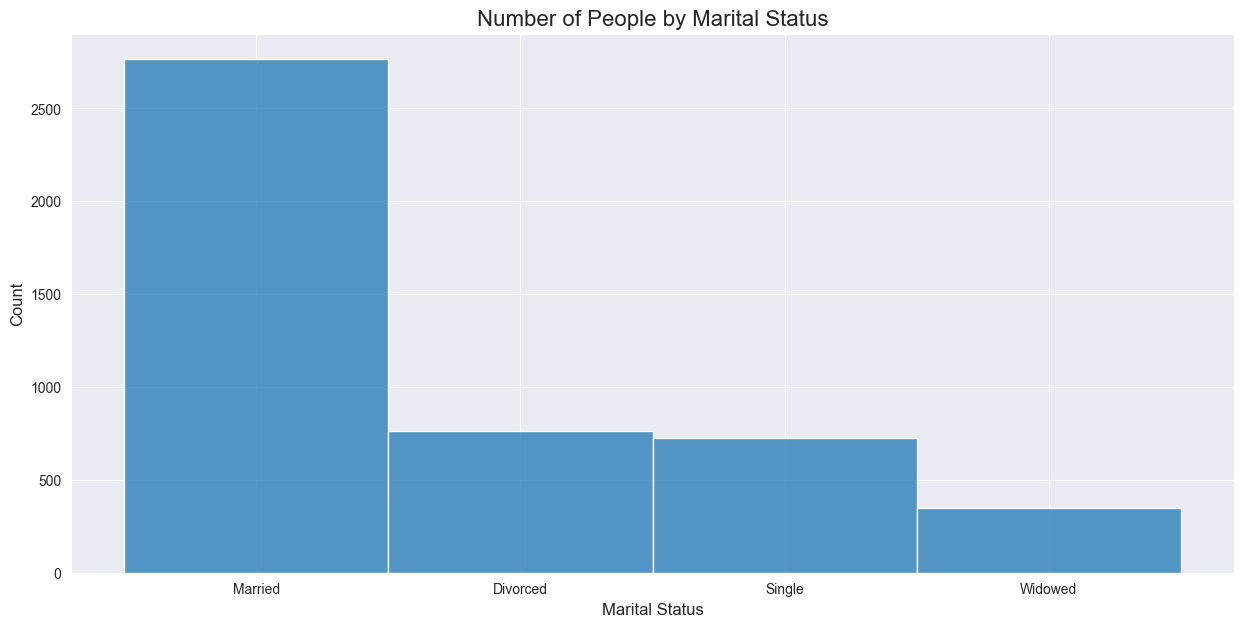

In [249]:
plt.figure(figsize=(15, 7))

sns.histplot(employee_df, x=employee_df['Marital Status'])

plt.title('Number of People by Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)

plt.show()


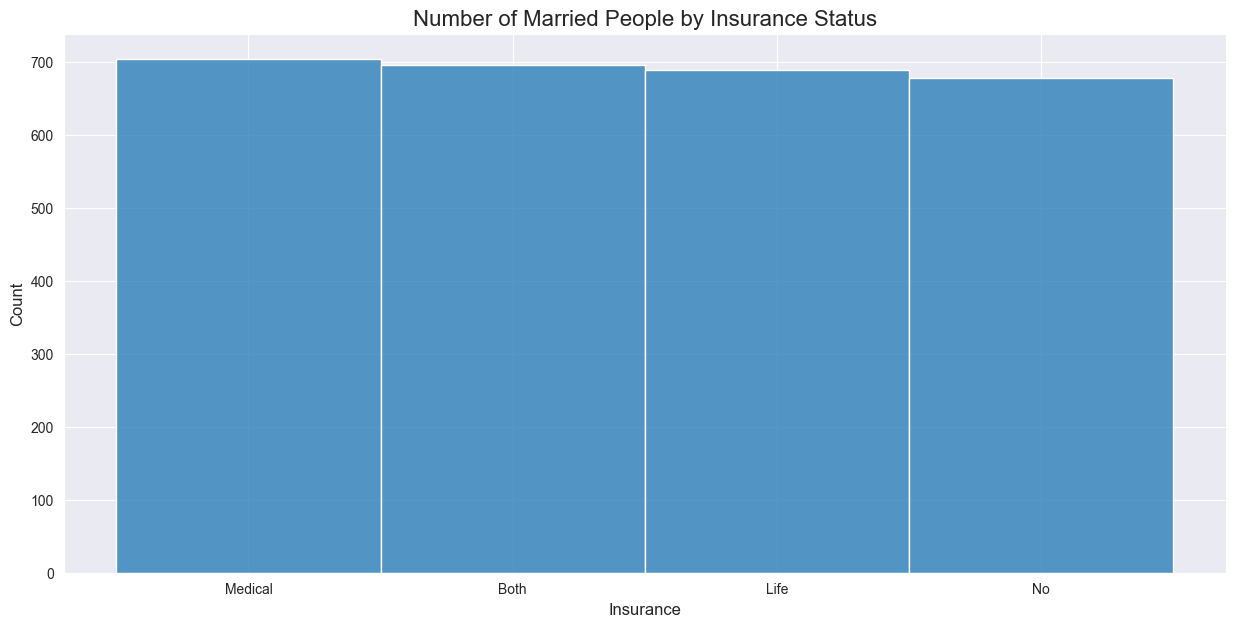

In [250]:
plt.figure(figsize=(15, 7))
mar_df = employee_df[employee_df['Marital Status'] == 'Married']
sns.histplot(mar_df, x=mar_df['Insurance'])

plt.title('Number of Married People by Insurance Status', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Insurance', fontsize=12)

plt.show()


### Personal factor analysis
##### Dependents, Marital status, Experience

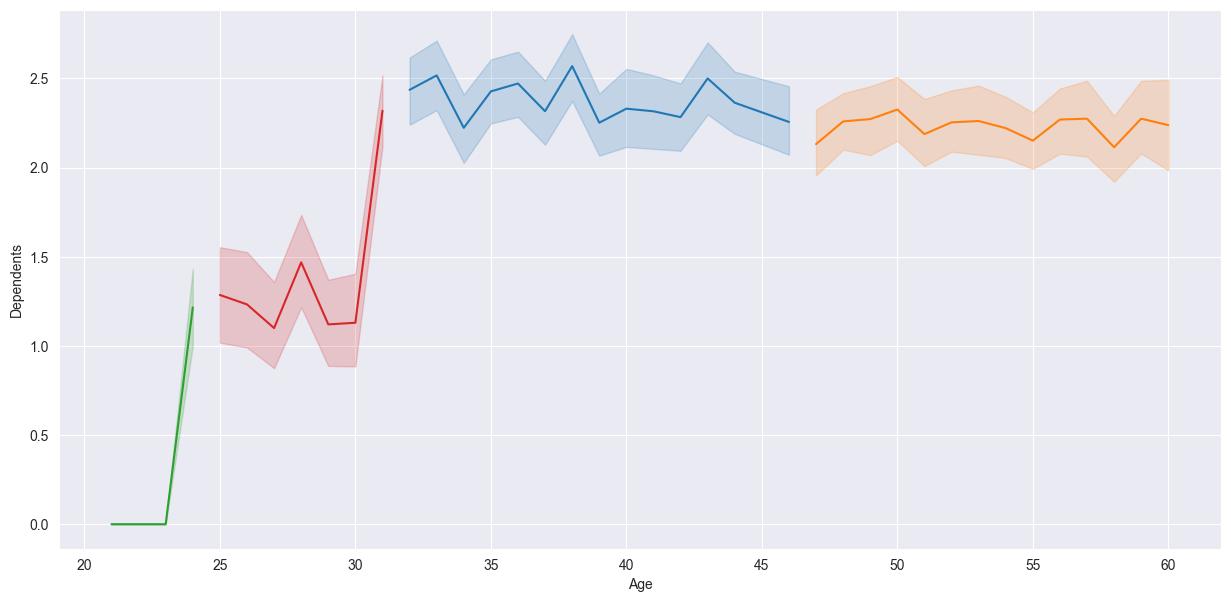

In [251]:
plt.figure(figsize=(15,7))

for i in employee_df['age_group'].unique():
    age_group_df = employee_df[employee_df['age_group'] == i]
    sns.lineplot(age_group_df, x=age_group_df['Age'], y=age_group_df['Dependents'])

plt.show()

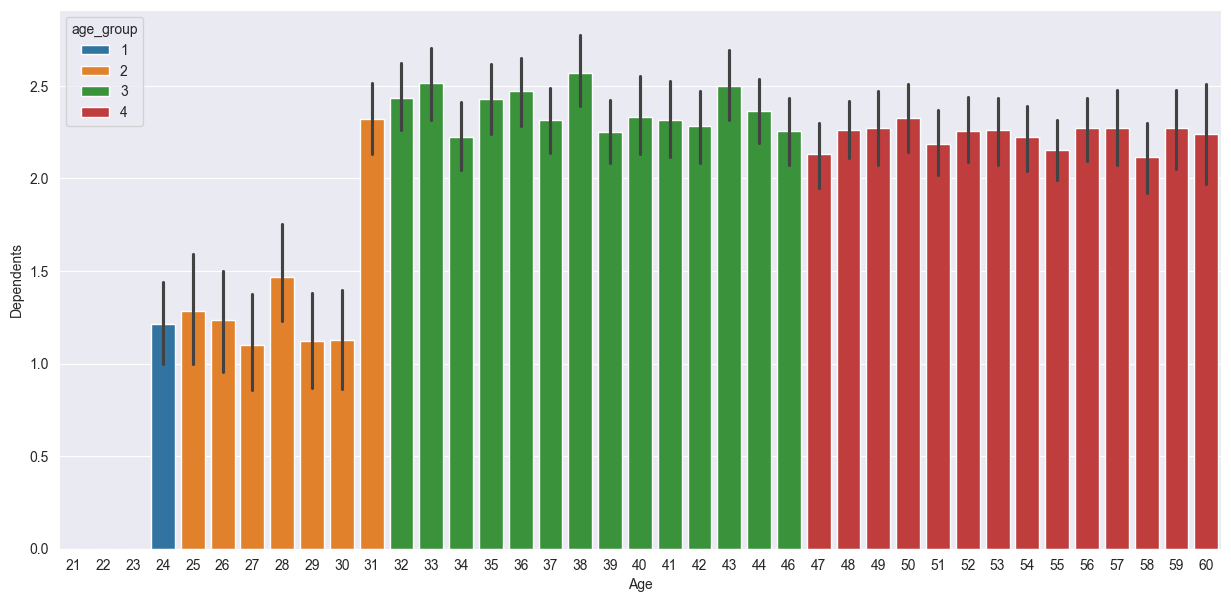

In [252]:
plt.figure(figsize=(15,7))

sns.barplot(employee_df, x=employee_df['Age'], y=employee_df['Dependents'], hue=employee_df['age_group'])
plt.show()

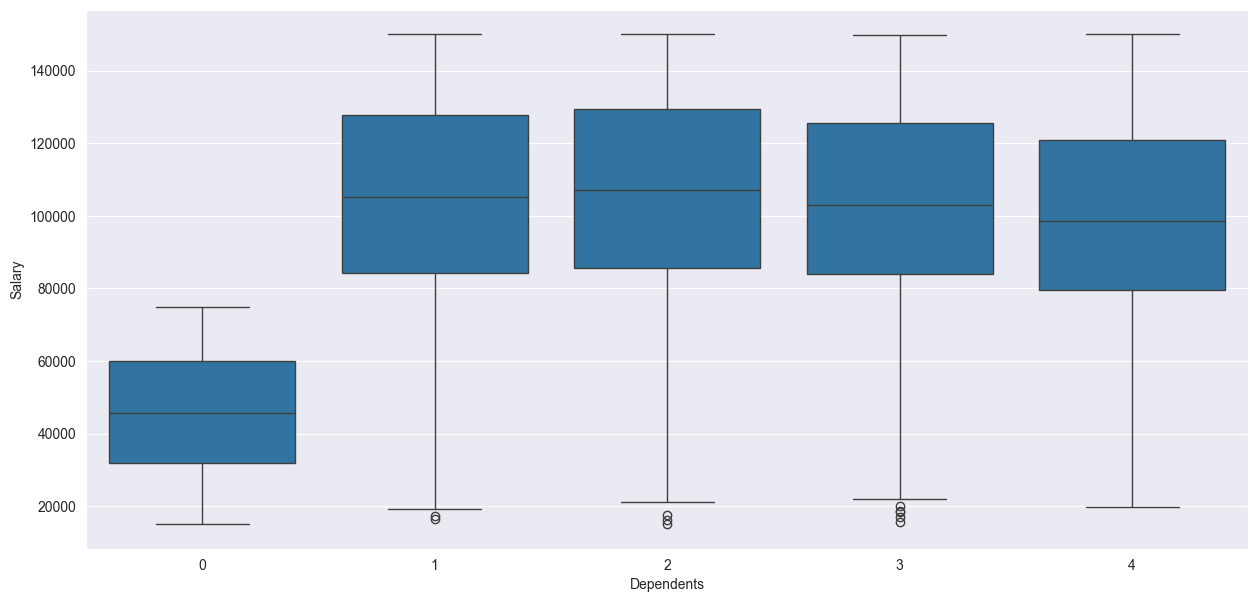

In [253]:
plt.figure(figsize=(15,7))

sns.boxplot(employee_df, x=employee_df['Dependents'], y=employee_df['Salary'])
plt.show()

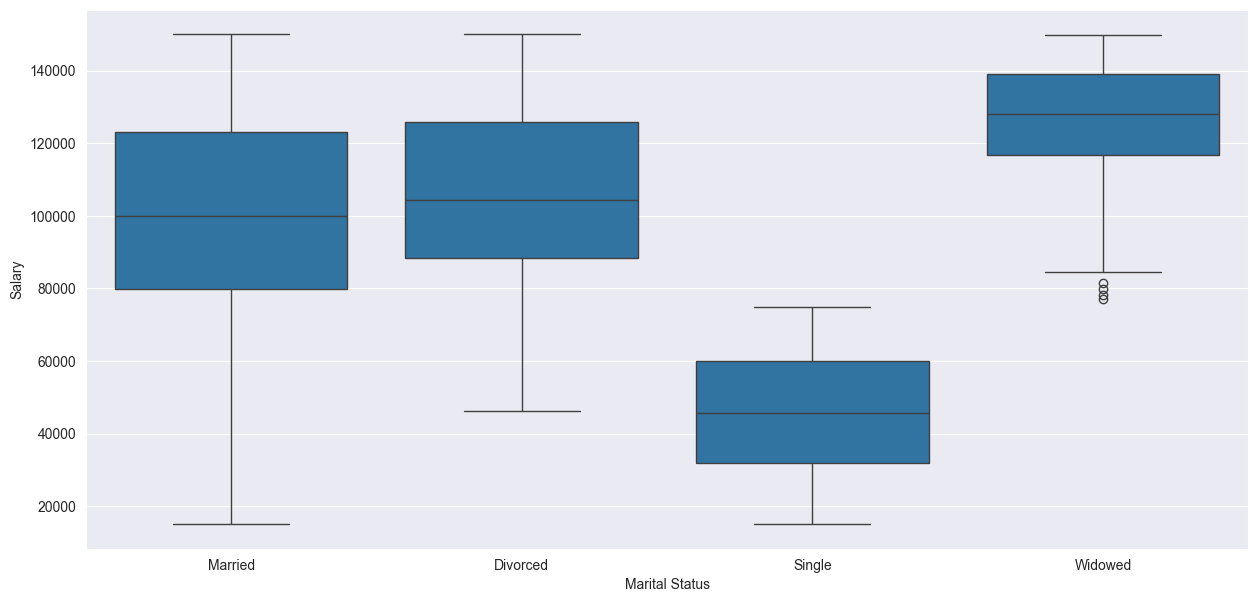

In [254]:
plt.figure(figsize=(15,7))

sns.boxplot(employee_df, x=employee_df['Marital Status'], y=employee_df['Salary'])
plt.show()

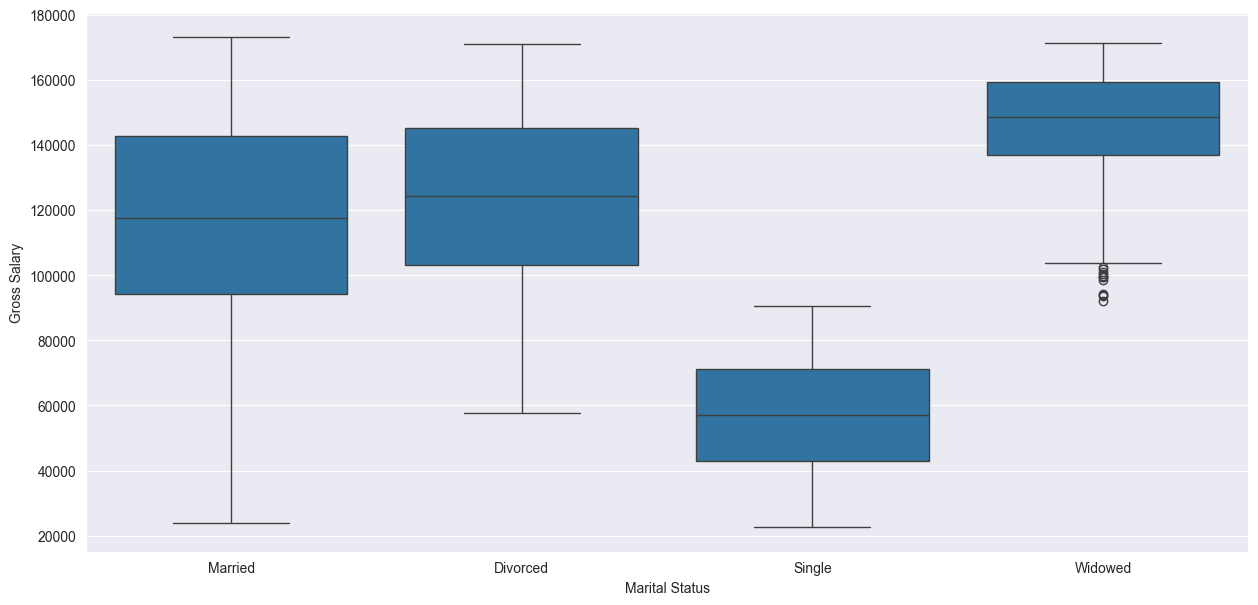

In [255]:
plt.figure(figsize=(15,7))

sns.boxplot(employee_df, x=employee_df['Marital Status'], y=employee_df['Gross Salary'])
plt.show()

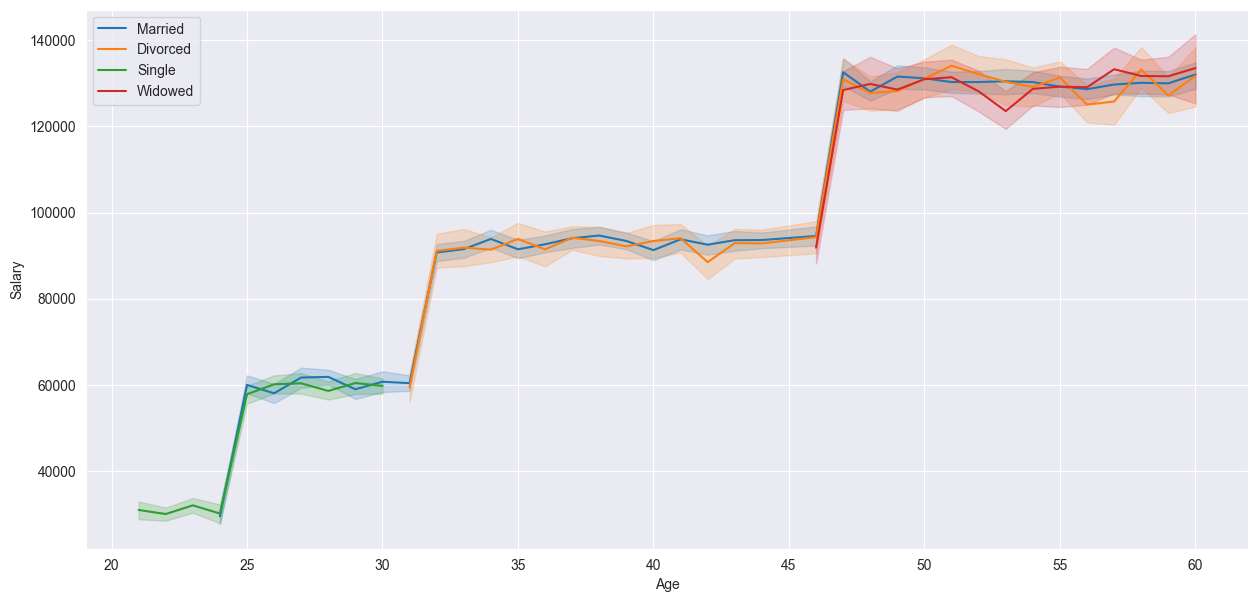

In [256]:
plt.figure(figsize=(15,7))

for i in employee_df['Marital Status'].unique():
    marital_status_df = employee_df[employee_df['Marital Status'] == i]
    sns.lineplot(marital_status_df, x=marital_status_df['Age'], y=marital_status_df['Salary'], label=i)

plt.show()

### Salary analysis

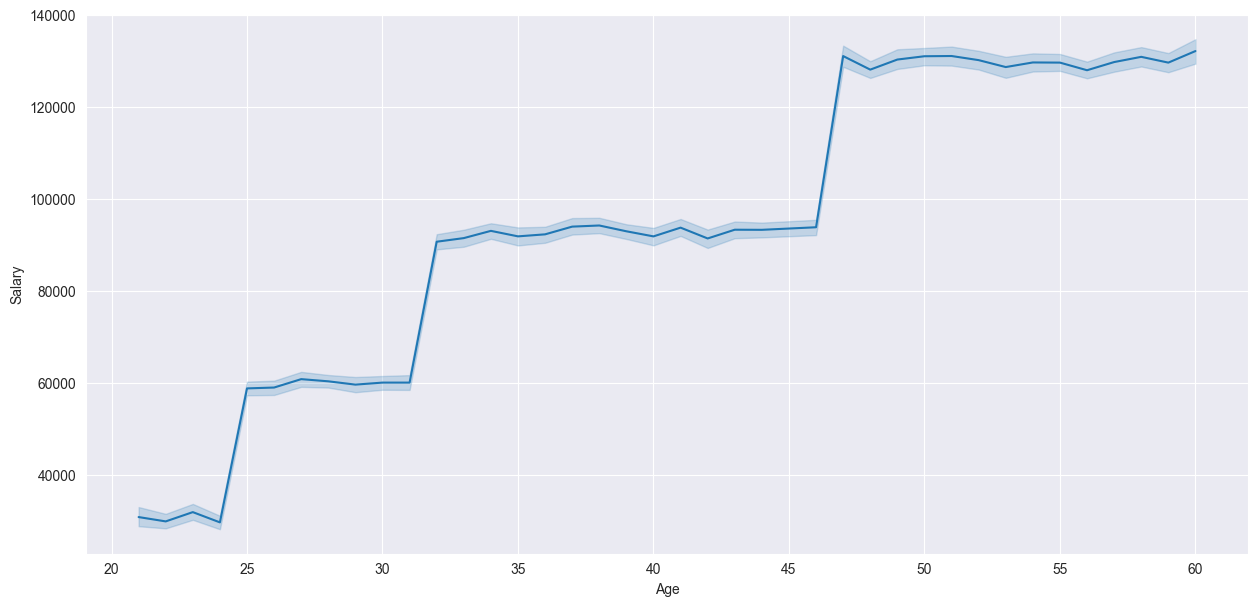

In [257]:
plt.figure(figsize=(15,7))

sns.lineplot(employee_df, x=employee_df['Age'], y=employee_df['Salary'])
plt.show()

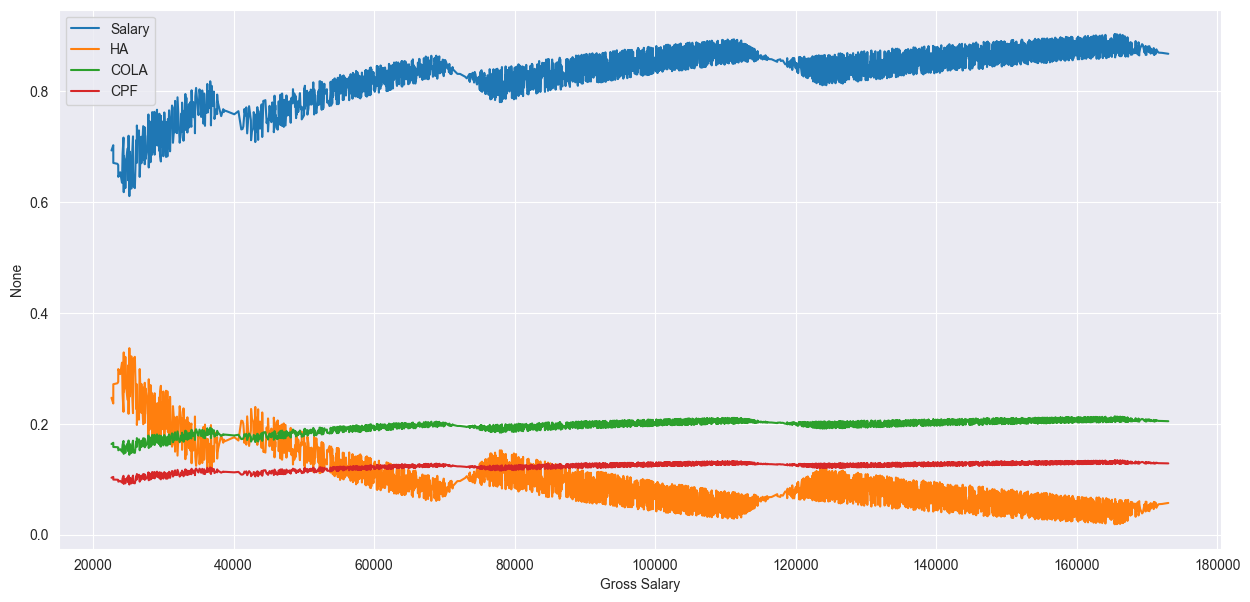

In [258]:
plt.figure(figsize=(15,7))

# line plots to visualize salary components
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['Salary'] / employee_df['Gross Salary']), label='Salary')
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['HA'] / employee_df['Gross Salary']), label='HA')
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['COLA'] / employee_df['Gross Salary']), label='COLA')
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['CPF'] / employee_df['Gross Salary']), label='CPF')


plt.show()

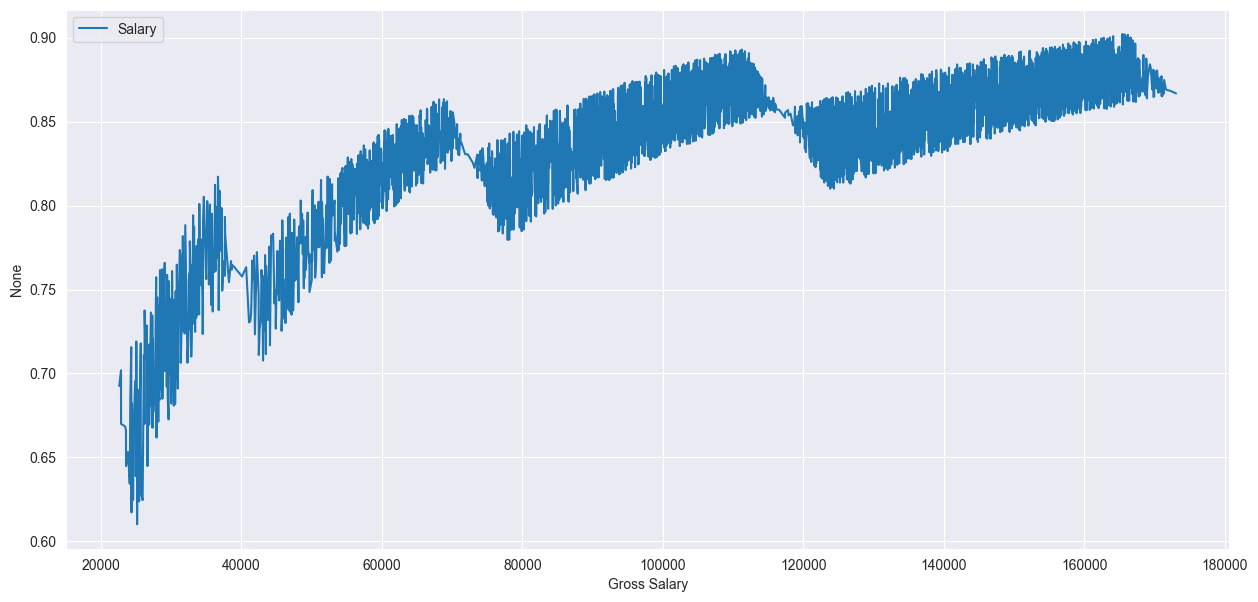

In [259]:
plt.figure(figsize=(15,7))

# line plots to visualize salary components
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['Salary'] / employee_df['Gross Salary']), label='Salary')

plt.show()

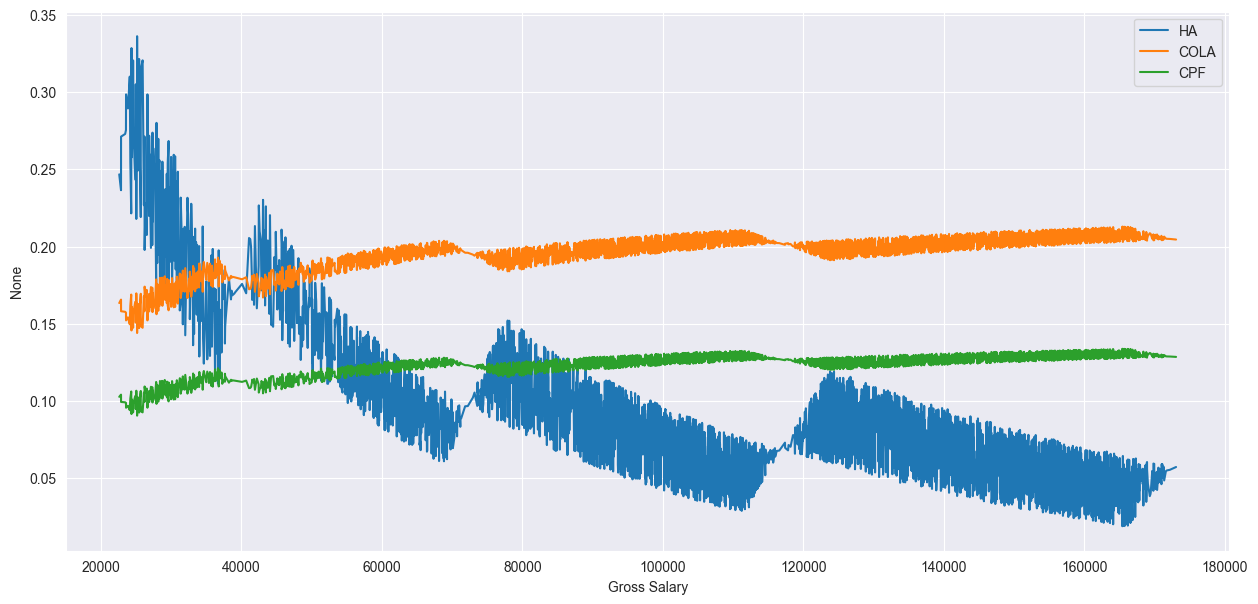

In [260]:
plt.figure(figsize=(15,7))

# line plots to visualize salary components
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['HA'] / employee_df['Gross Salary']), label='HA')
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['COLA'] / employee_df['Gross Salary']), label='COLA')
sns.lineplot(employee_df, x=employee_df['Gross Salary'], y=(employee_df['CPF'] / employee_df['Gross Salary']), label='CPF')


plt.show()

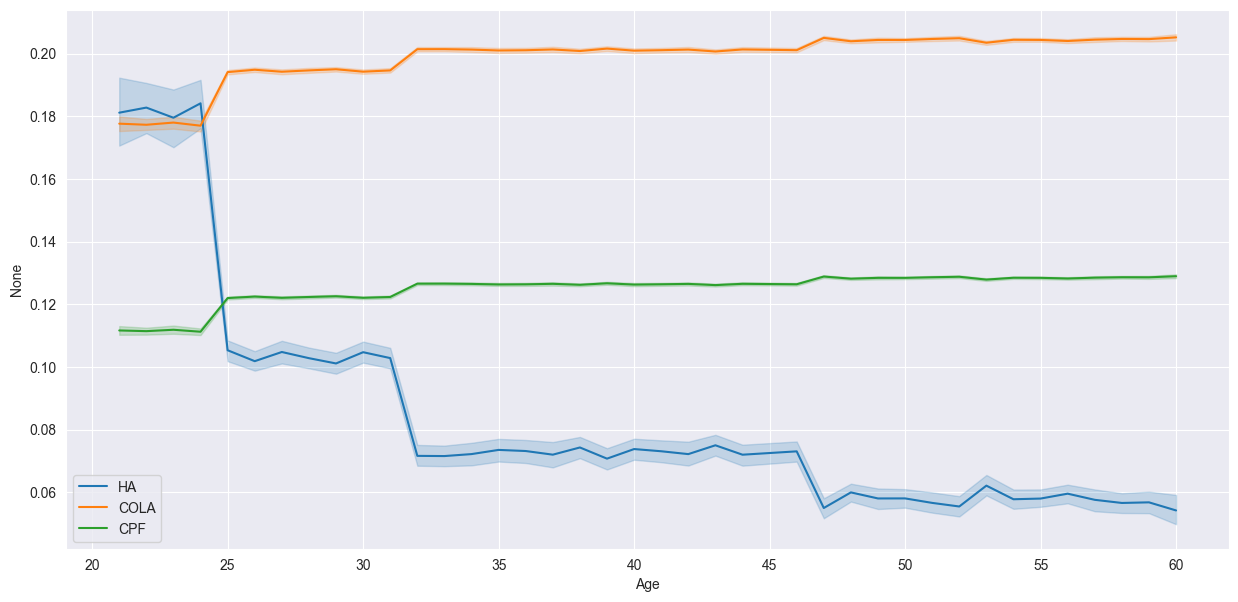

In [261]:
plt.figure(figsize=(15,7))

sns.lineplot(employee_df, x=employee_df['Age'], y=(employee_df['HA'] / employee_df['Gross Salary']), label='HA')
sns.lineplot(employee_df, x=employee_df['Age'], y=(employee_df['COLA'] / employee_df['Gross Salary']), label='COLA')
sns.lineplot(employee_df, x=employee_df['Age'], y=(employee_df['CPF'] / employee_df['Gross Salary']), label='CPF')
plt.show()


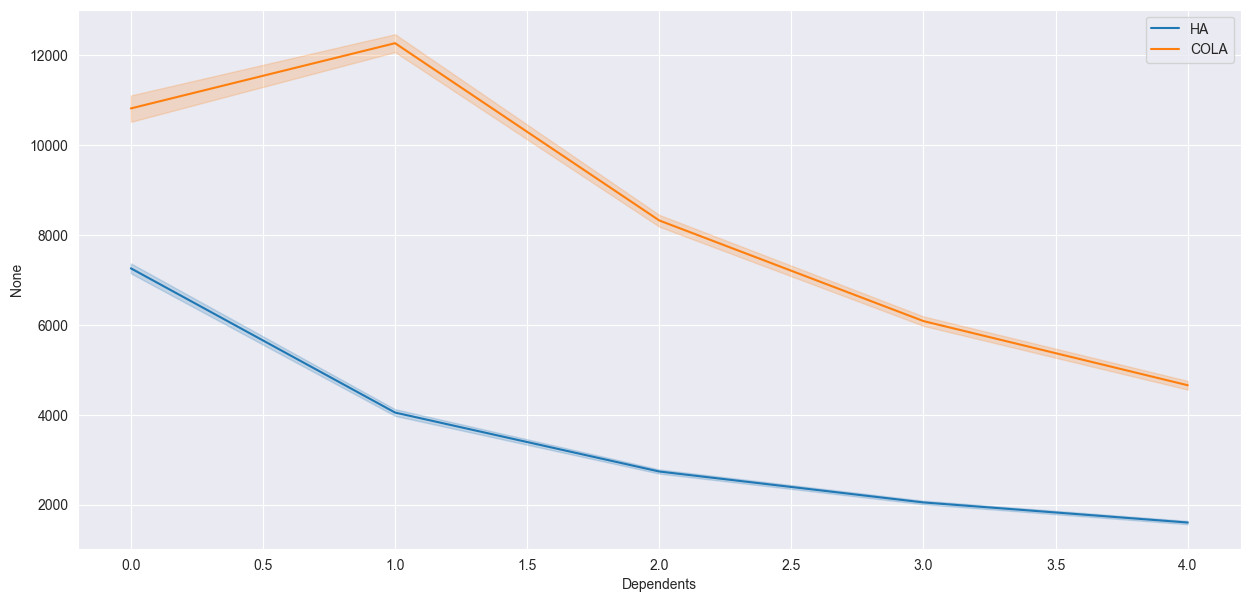

In [262]:
plt.figure(figsize=(15,7))

sns.lineplot(employee_df, x=employee_df['Dependents'], y=(employee_df['HA'] / (employee_df['Dependents'] + 1)), label='HA')
sns.lineplot(employee_df, x=employee_df['Dependents'], y=(employee_df['COLA'] / (employee_df['Dependents'] + 1)), label='COLA')
plt.show()


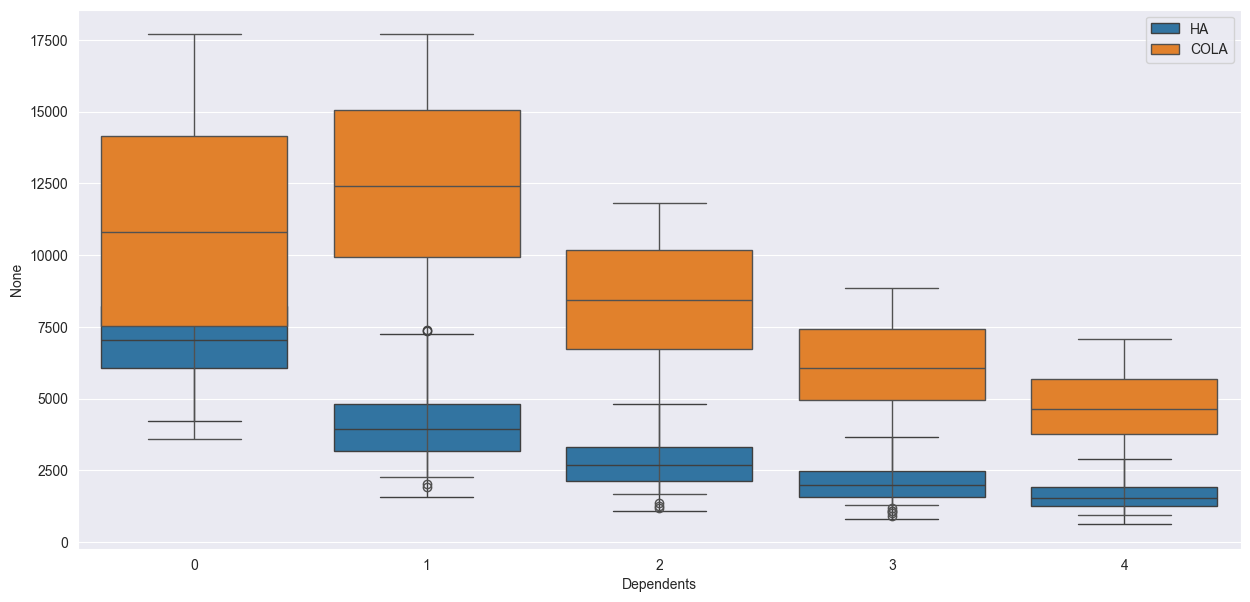

In [263]:
plt.figure(figsize=(15,7))

sns.boxplot(employee_df, x=employee_df['Dependents'], y=(employee_df['HA'] / (employee_df['Dependents'] + 1)), label='HA')
sns.boxplot(employee_df, x=employee_df['Dependents'], y=(employee_df['COLA'] / (employee_df['Dependents'] + 1)), label='COLA')
plt.show()


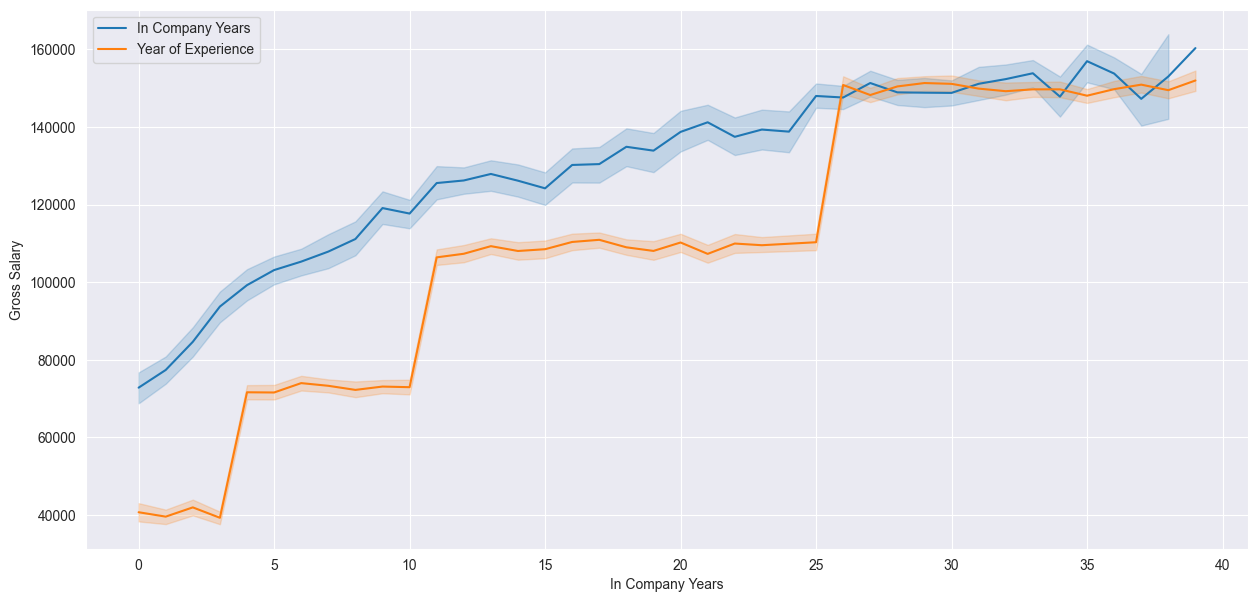

In [264]:
plt.figure(figsize=(15,7))

# line plots to visualize salary components
sns.lineplot(employee_df, x=employee_df['In Company Years'], y=employee_df['Gross Salary'], label='In Company Years')
sns.lineplot(employee_df, x=employee_df['Year of Experience'], y=employee_df['Gross Salary'], label='Year of Experience')


plt.show()

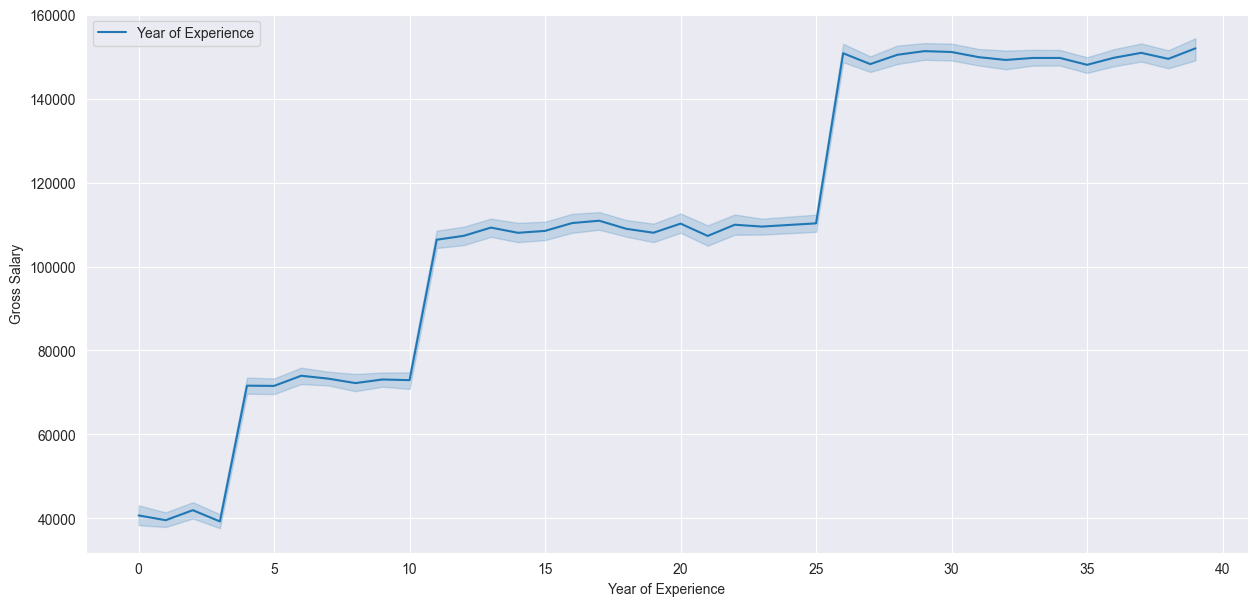

In [265]:
plt.figure(figsize=(15,7))

# line plots to visualize salary components
# sns.lineplot(employee_df, x=employee_df['In Company Years'], y=employee_df['Gross Salary'], label='In Company Years')
sns.lineplot(employee_df, x=employee_df['Year of Experience'], y=employee_df['Gross Salary'], label='Year of Experience')


plt.show()

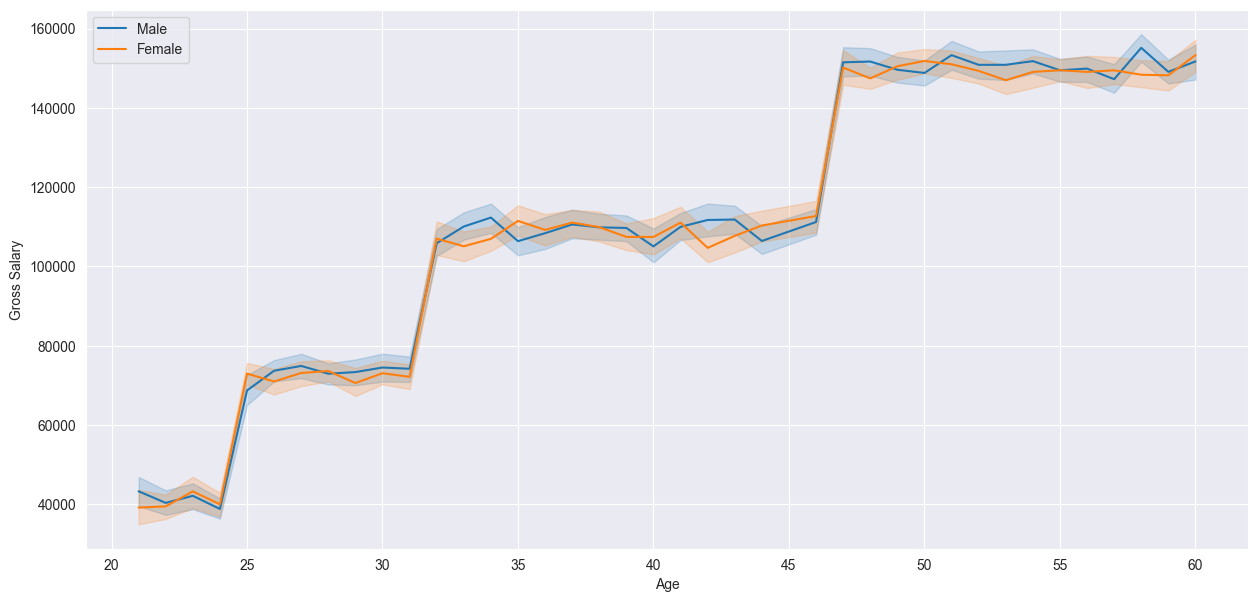

In [266]:
plt.figure(figsize=(15, 7))

male_df = employee_df[employee_df['Gender'] == 'Male']
female_df = employee_df[employee_df['Gender'] == 'Female']
# line plots to visualize salary components
sns.lineplot(male_df, x=male_df['Age'], y=male_df['Gross Salary'], label='Male')
sns.lineplot(female_df, x=female_df['Age'], y=female_df['Gross Salary'], label='Female')

plt.show()

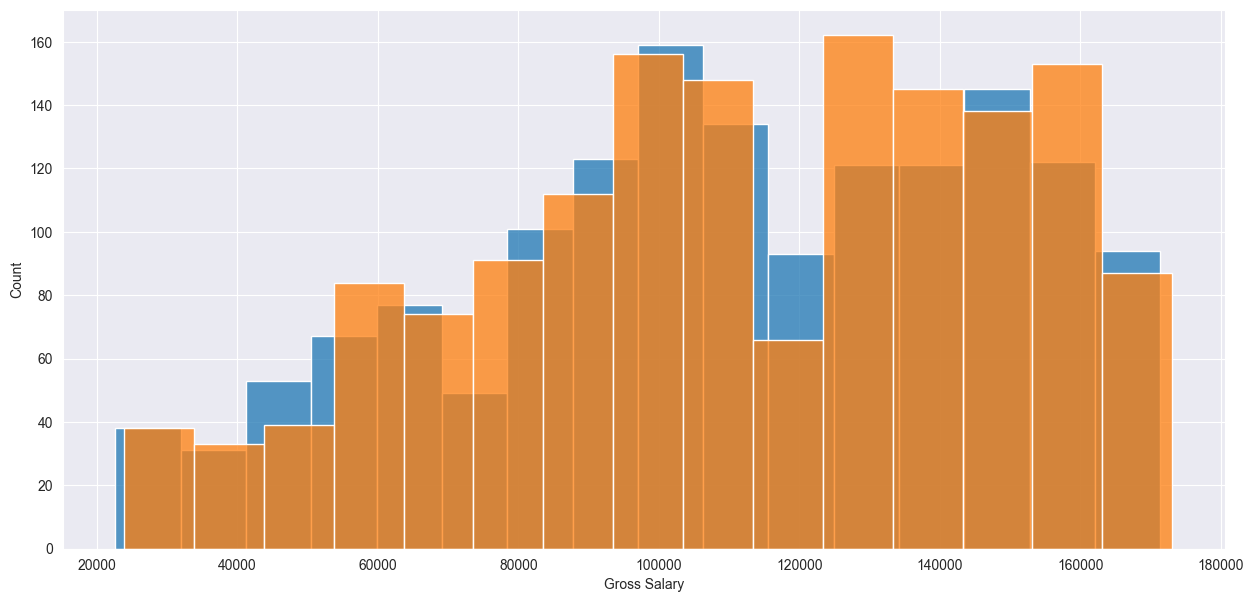

In [267]:
plt.figure(figsize=(15, 7))

# line plots to visualize salary components
sns.histplot(male_df, x=male_df['Gross Salary'], label='Male')
sns.histplot(female_df, x=female_df['Gross Salary'], label='Female')

plt.show()

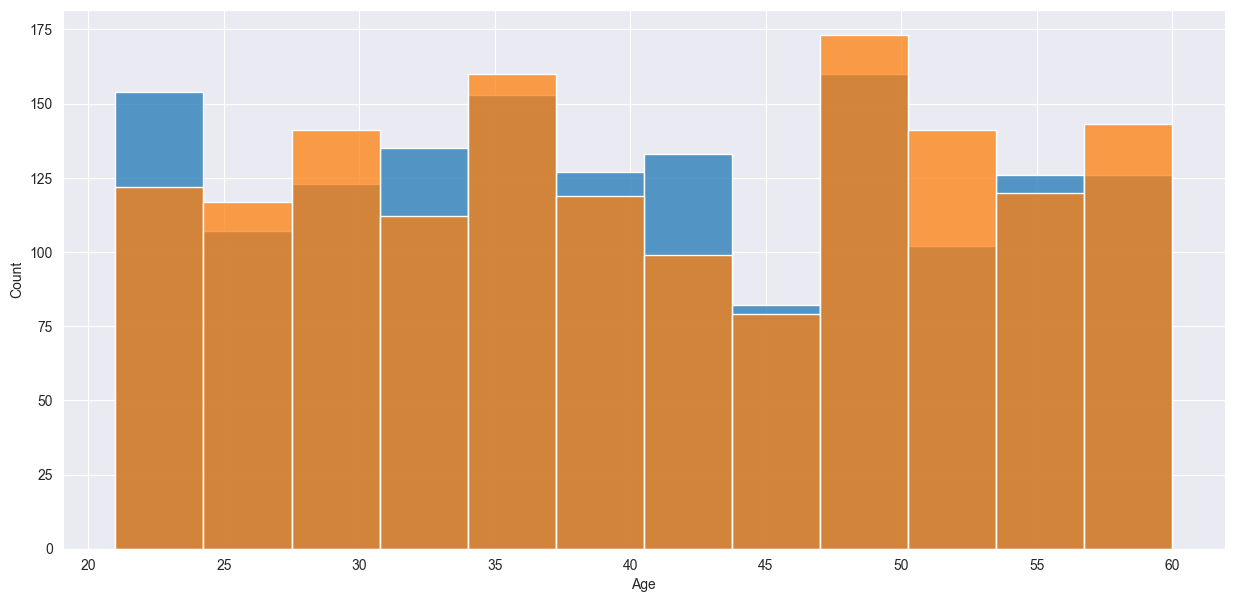

In [268]:
plt.figure(figsize=(15, 7))

# line plots to visualize salary components
sns.histplot(male_df, x=male_df['Age'], label='Male')
sns.histplot(female_df, x=female_df['Age'], label='Female')

plt.show()

In [269]:
male_df.describe()

Salary          Age   Dependents            HA          COLA  \
count    1528.000000  1528.000000  1528.000000   1528.000000   1528.000000   
mean    93606.331420    40.026178     1.964005   7978.298141  22092.005226   
std     33946.675383    11.270007     1.313628   2337.066137   8011.745772   
min     15215.380000    21.000000     0.000000   3127.273000   3590.977762   
25%     69749.025000    30.000000     1.000000   6225.043750  16461.448723   
50%     96265.390000    39.000000     2.000000   7740.849000  22719.568929   
75%    121604.852500    50.000000     3.000000   9531.822250  28699.928692   
max    149935.220000    60.000000     4.000000  14732.648000  35386.171140   

                CPF   Gross Salary  In Company Years  Year of Experience  \
count   1528.000000    1528.000000       1528.000000         1528.000000   
mean   13883.800397  109792.834389          9.843586           19.026178   
std     5035.010539   37449.303872          8.756983           11.270007   
min     2256.762931   22624.827875          0.000000            0.000000   
25%    10345.256847   84731.006925          3.000000            9.000000   
50%    14278.195072  110607.931347          7.000000           18.000000   
75%    18036.573743  141457.691880         15.000000           29.000000   
max    22238.566937  171356.582241         39.000000           39.000000   

       Position Level  long_term_service  Medical Insurance  Life Insurance  \
count     1528.000000        1528.000000        1528.000000     1528.000000   
mean         2.954188           0.107330           0.518325        0.507853   
std          0.958467           0.309633           0.499828        0.500102   
min          1.000000           0.000000           0.000000        0.000000   
25%          2.000000           0.000000           0.000000        0.000000   
50%          3.000000           0.000000           1.000000        1.000000   
75%          4.000000           0.000000           1.000000        1.000000   
max          4.000000           1.000000           1.000000        1.000000   

       insurance_status  
count       1528.000000  
mean           0.238874  
std            0.426535  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [270]:
female_df.describe()

Salary          Age   Dependents            HA          COLA  \
count    1526.000000  1526.000000  1526.000000   1526.000000   1526.000000   
mean    95384.341193    40.742464     1.960026   8022.445304  22511.632836   
std     33515.375151    11.371572     1.277950   2320.190994   7909.954719   
min     15589.770000    21.000000     0.000000   3209.149000   3679.337445   
25%     71449.467500    31.000000     1.000000   6318.190750  16862.769702   
50%     98431.665000    40.000000     2.000000   7821.544000  23230.830912   
75%    123092.520000    51.000000     3.000000   9534.407500  29051.032701   
max    149991.340000    60.000000     4.000000  14640.034000  35399.416010   

                CPF   Gross Salary  In Company Years  Year of Experience  \
count   1526.000000    1526.000000       1526.000000         1526.000000   
mean   14147.516883  111770.902449          9.908912           19.742464   
std     4971.039584   37047.857175          8.887211           11.371572   
min     2312.292893   23864.837552          0.000000            0.000000   
25%    10597.468464   85574.427669          3.000000           10.000000   
50%    14599.499509  112524.572230          7.000000           19.000000   
75%    18257.226324  142827.175969         15.000000           30.000000   
max    22246.890721  173050.731289         38.000000           39.000000   

       Position Level  long_term_service  Medical Insurance  Life Insurance  \
count     1526.000000        1526.000000        1526.000000     1526.000000   
mean         3.027523           0.085845           0.501311        0.498034   
std          0.942562           0.280227           0.500162        0.500160   
min          1.000000           0.000000           0.000000        0.000000   
25%          2.000000           0.000000           0.000000        0.000000   
50%          3.000000           0.000000           1.000000        0.000000   
75%          4.000000           0.000000           1.000000        1.000000   
max          4.000000           1.000000           1.000000        1.000000   

       insurance_status  
count       1526.000000  
mean           0.250328  
std            0.433344  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.750000  
max            1.000000